<a href="https://colab.research.google.com/github/Tonyngatia/Phase-4---Time-Series-Analysis/blob/main/Phase_4_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PHSAE 4 PROJECT - TEAM 3

## Introduction

This is the team 3 phase 3 project notebook.Our group members include :

* Anthony Ngatia
* Jessyca Aperi
* Joy Chepchumba
* Naomi Rotich

In this notebook we shall be anaylsing the **Zillow Housing Dataset using a Time Series MOdel**

## Overview

In these project we shall seek to do the following :

* Load the dataset
* Understand the dataset
* Choose our target variable.
* Prepare the dataset (Example : Cleaning the dataset , checking for multicollinearity)
* Encode our categorical variables
* Make several models
* Evaluate our models
* Use our models for prediction
* Come up with relevant findings.

# **1). Business Understanding**


Real estate investment is a lucrative and dynamic industry that requires careful analysis and decision-making. The fictional real estate investment firm is seeking guidance on identifying the top 5 zip codes for investment opportunities. To address this question, historical data from Zillow Research is utilized.

## **i) Background:**

Real estate investment is a lucrative and dynamic industry that requires careful analysis and decision-making. The fictional real estate investment firm is seeking guidance on identifying the top 5 zip codes for investment opportunities. To address this question, historical data from Zillow Research is utilized. The dataset contains information on various attributes, including RegionID, RegionName, City, State, Metro, SizeRank, CountyName, and value (real estate prices).

## **ii). Main Objective:**

To identify the top 5 zip codes that offer the best investment potential in terms of real estate prices.

### **Specific Objectives:**

* Analyze historical real estate price data across zip codes to understand trends, patterns, and fluctuations in property values over time.

* Identify promising zip codes based on historical data analysis, focusing on consistent growth, stability, and future appreciation potential, to determine the most favorable areas for investment.

* Consider location-specific factors including city, state, and metro alongside historical performance to assess the overall desirability and attractiveness of investment opportunities.

* Consider SizeRank attribute to evaluate market opportunities and risks associated with investing in different zip codes based on relative market size and competitiveness.

# **2)**. **Data Understanding**

The dataset contains information on various attributes, including RegionID, RegionName, City, State, Metro, SizeRank, CountyName, and value (real estate prices). Our dataset is the Zillow Housing Dataset which was sourced from Zillow Research Page.

Column Name Description

* RegionID -This is unique Id for the Regions

* SizeRank -This is the ranking done based on the size of the region

* RegionName - This field contains the zip code of the region.

* RegionType- Type of region is Zip.

* StateName - State

* City - This column provide the specific City Name of Housing Data

* Metro - This provide the name of the metro city around that region

* County Name - This is the county name for that region

* Months Column - These columns contains the prices of region for every month

In order to understand how our dataset looks like lets get a preview of this data by loading it.

### Importing the Zillow Housing Dataset

In [ ]:
#Importing data libraries
import numpy as np
import pandas as pd

#importing visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#importing math libraries
from math import sqrt

#Importing modeling libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error as MSE

import warnings

# Ignore specific warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="prophet")
warnings.filterwarnings("ignore", category=UserWarning, module="prophet")


In [ ]:
#importing the dataset
df = pd.read_csv('/content/zillow_data.csv')
df.head()

RegionID  RegionName      City State              Metro CountyName  \
0     84654       60657   Chicago    IL            Chicago       Cook   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982       77494      Katy    TX            Houston     Harris   
3     84616       60614   Chicago    IL            Chicago       Cook   
4     93144       79936   El Paso    TX            El Paso    El Paso   

   SizeRank   1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  \
0         1  334200.0  335400.0  336500.0  ...  1005500  1007500  1007800   
1         2  235700.0  236900.0  236700.0  ...   308000   310000   312500   
2         3  210400.0  212200.0  212200.0  ...   321000   320600   320200   
3         4  498100.0  500900.0  503100.0  ...  1289800  1287700  1287400   
4         5   77300.0   77300.0   77300.0  ...   119100   119400   120000   

   2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0  1009600  1013300  1018700  1024400  1030700  1033800  1030600  
1   314100   315000   316600   318100   319600   321100   321800  
2   320400   320800   321200   321200   323000   326900   329900  
3  1291500  1296600  1299000  1302700  1306400  1308500  1307000  
4   120300   120300   120300   120300   120500   121000   121500  

[5 rows x 272 columns]

In [ ]:
#Investigating for the shape of the dataset
df.shape

(14723, 272)

The dataset contains 14723 rows and 272 columns

In [ ]:
#Describing the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


The dataset contains data types of; float, integers and strings

## **3). Data Preparation**

### Checking for missing values


In [ ]:
df.isna().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
              ... 
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
Length: 272, dtype: int64

In [ ]:
#Displaying the rows with missing values.
df[df.isnull().any(axis=1)].iloc[:-1]

RegionID  RegionName               City State          Metro  \
20        61625       10011           New York    NY       New York   
36        61796       10456           New York    NY       New York   
105       84613       60611            Chicago    IL        Chicago   
151       69340       27410         Greensboro    NC            NaN   
156       62048       11238           New York    NY       New York   
...         ...         ...                ...   ...            ...   
14706     59046        3215  Waterville Valley    NH      Claremont   
14707     69681       28039       East Spencer    NC      Charlotte   
14708     99401       97733           Crescent    OR  Klamath Falls   
14710     59210        3812           Bartlett    NH            NaN   
14717     62697       12720             Bethel    NY            NaN   

      CountyName  SizeRank   1996-04   1996-05   1996-06  ...   2017-07  \
20      New York        21       NaN       NaN       NaN  ...  12137600   
36         Bronx        37       NaN       NaN       NaN  ...    357900   
105         Cook       106       NaN       NaN       NaN  ...   1475200   
151     Guilford       152  137100.0  136600.0  136000.0  ...    212900   
156        Kings       157       NaN       NaN       NaN  ...   2673300   
...          ...       ...       ...       ...       ...  ...       ...   
14706    Grafton     14707       NaN       NaN       NaN  ...    786000   
14707      Rowan     14708       NaN       NaN       NaN  ...     27300   
14708    Klamath     14709       NaN       NaN       NaN  ...    197700   
14710    Carroll     14711   80900.0   80800.0   80800.0  ...    215500   
14717   Sullivan     14718   62500.0   62600.0   62700.0  ...    122200   

        2017-08   2017-09   2017-10   2017-11   2017-12   2018-01   2018-02  \
20     12112600  12036600  12050100  12016300  11946500  11978100  11849300   
36       357100    356500    357200    362000    368500    374100    379800   
105     1473900   1469500   1472100   1477800   1486000   1497300   1508600   
151      213200    213600    214300    215100    216200    217700    219600   
156     2696700   2716500   2724000   2744300   2768900   2810700   2848100   
...         ...       ...       ...       ...       ...       ...       ...   
14706    780900    774100    767800    778300    796800    808100    811600   
14707     26400     25500     25100     25100     25600     25800     26600   
14708    203700    207900    208100    206400    208700    211800    218100   
14710    217000    219200    221700    223600    224800    226000    226900   
14717    122700    122300    122000    122200    122800    123200    123200   

        2018-03   2018-04  
20     11563000  11478300  
36       388100    394400  
105     1508100   1493200  
151      221000    221500  
156     2869600   2885300  
...         ...       ...  
14706    806500    796600  
14707     27700     28300  
14708    228400    238500  
14710    227700    228000  
14717    120700    117700  

[1827 rows x 272 columns]

### Dealing with Missing Values

We used Linear Interpolation to handle the numerical missing values

In [ ]:
# Checking for missing values in each column
missing_columns = df.columns[df.isnull().any()].tolist()

print(missing_columns)

['Metro', '1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09', '1996-10', '1996-11', '1996-12', '1997-01', '1997-02', '1997-03', '1997-04', '1997-05', '1997-06', '1997-07', '1997-08', '1997-09', '1997-10', '1997-11', '1997-12', '1998-01', '1998-02', '1998-03', '1998-04', '1998-05', '1998-06', '1998-07', '1998-08', '1998-09', '1998-10', '1998-11', '1998-12', '1999-01', '1999-02', '1999-03', '1999-04', '1999-05', '1999-06', '1999-07', '1999-08', '1999-09', '1999-10', '1999-11', '1999-12', '2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06', '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09', '2002-10', '2002-11', '2002-12', '2003-01', '2003-02', '2003-03', '2003-04', '2003-05', '2003-06', '2003-07', '2003-08', '2003-09', 

In [ ]:
# Iterate over the columns with missing values
for col in missing_columns:
    # Perform interpolation using linear method
    df[col] = df[col].interpolate(method='linear')

# Print the updated dataset with interpolated values
print(df)


       RegionID  RegionName                 City State              Metro  \
0         84654       60657              Chicago    IL            Chicago   
1         90668       75070             McKinney    TX  Dallas-Fort Worth   
2         91982       77494                 Katy    TX            Houston   
3         84616       60614              Chicago    IL            Chicago   
4         93144       79936              El Paso    TX            El Paso   
...         ...         ...                  ...   ...                ...   
14718     58333        1338             Ashfield    MA    Greenfield Town   
14719     59107        3293            Woodstock    NH          Claremont   
14720     75672       40404                Berea    KY           Richmond   
14721     93733       81225  Mount Crested Butte    CO                NaN   
14722     95851       89155             Mesquite    NV          Las Vegas   

      CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-07  \
0

In [ ]:
df = df.drop('Metro', axis = 1)

In [ ]:
#Confirming the missing values are not present
df[df.isnull().any(axis=1)].iloc[:-1]

Empty DataFrame
Columns: [RegionID, RegionName, City, State, CountyName, SizeRank, 1996-04, 1996-05, 1996-06, 1996-07, 1996-08, 1996-09, 1996-10, 1996-11, 1996-12, 1997-01, 1997-02, 1997-03, 1997-04, 1997-05, 1997-06, 1997-07, 1997-08, 1997-09, 1997-10, 1997-11, 1997-12, 1998-01, 1998-02, 1998-03, 1998-04, 1998-05, 1998-06, 1998-07, 1998-08, 1998-09, 1998-10, 1998-11, 1998-12, 1999-01, 1999-02, 1999-03, 1999-04, 1999-05, 1999-06, 1999-07, 1999-08, 1999-09, 1999-10, 1999-11, 1999-12, 2000-01, 2000-02, 2000-03, 2000-04, 2000-05, 2000-06, 2000-07, 2000-08, 2000-09, 2000-10, 2000-11, 2000-12, 2001-01, 2001-02, 2001-03, 2001-04, 2001-05, 2001-06, 2001-07, 2001-08, 2001-09, 2001-10, 2001-11, 2001-12, 2002-01, 2002-02, 2002-03, 2002-04, 2002-05, 2002-06, 2002-07, 2002-08, 2002-09, 2002-10, 2002-11, 2002-12, 2003-01, 2003-02, 2003-03, 2003-04, 2003-05, 2003-06, 2003-07, 2003-08, 2003-09, 2003-10, 2003-11, 2003-12, 2004-01, ...]
Index: []

[0 rows x 271 columns]

Reshaping our dataset from wide to long format

In [ ]:
#Converting our dataframe time column from float to datetime format

def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """

    return pd.to_datetime(df_new.columns.values[1:], format='%Y-%m')

In [ ]:
# Reshaping our dataset from Wide to Long Format

def melt_data(data):
    melted = pd.melt(data, id_vars=['RegionID', 'RegionName', 'City', 'State', 'SizeRank', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby(['RegionID', 'RegionName', 'City', 'State', 'SizeRank', 'CountyName', 'time']).aggregate({'value': 'mean'}).reset_index()



In [ ]:
#Printing the first five rows of the long format dataset.
df1 = melt_data(df)
df1.head()

RegionID  RegionName    City State  SizeRank CountyName       time  \
0     58196        1001  Agawam    MA      5851    Hampden 1996-04-01   
1     58196        1001  Agawam    MA      5851    Hampden 1996-05-01   
2     58196        1001  Agawam    MA      5851    Hampden 1996-06-01   
3     58196        1001  Agawam    MA      5851    Hampden 1996-07-01   
4     58196        1001  Agawam    MA      5851    Hampden 1996-08-01   

      value  
0  113100.0  
1  112800.0  
2  112600.0  
3  112300.0  
4  112100.0

In [ ]:
#Descriptive Statistics for the Long format dataset
df1.describe()

RegionID    RegionName      SizeRank         value
count  3.901595e+06  3.901595e+06  3.901595e+06  3.901595e+06
mean   8.107501e+04  4.822235e+04  7.362000e+03  2.060636e+05
std    3.193304e+04  2.935833e+04  4.250165e+03  2.368017e+05
min    5.819600e+04  1.001000e+03  1.000000e+00  1.130000e+04
25%    6.717400e+04  2.210100e+04  3.681000e+03  9.770000e+04
50%    7.800700e+04  4.610600e+04  7.362000e+03  1.469000e+05
75%    9.092100e+04  7.520600e+04  1.104300e+04  2.354000e+05
max    7.538440e+05  9.990100e+04  1.472300e+04  1.931490e+07

In [ ]:
# Checking for missing values in the long format dataframe
df1.isna().sum()

RegionID      0
RegionName    0
City          0
State         0
SizeRank      0
CountyName    0
time          0
value         0
dtype: int64

In [ ]:
#checking for duplicates in the Long Format Dataframe
df1.duplicated().sum()


0

# 4). Exploratory Data Analysis

Grouping the data by months

In [ ]:
#Setting the time column as the index
df1.set_index('time', inplace = True)

In [ ]:
#Resampling using monthly buckets
monthlyvalue = df1.resample('MS')
month_mean = monthlyvalue.mean()
month_mean.tail()

RegionID    RegionName  SizeRank          value
time                                                           
2017-12-01  81075.010052  48222.348706    7362.0  281095.320247
2018-01-01  81075.010052  48222.348706    7362.0  282657.060382
2018-02-01  81075.010052  48222.348706    7362.0  284368.688447
2018-03-01  81075.010052  48222.348706    7362.0  286511.376757
2018-04-01  81075.010052  48222.348706    7362.0  288039.944305

Visualising the Dataframe

Grouping per Month and plottting

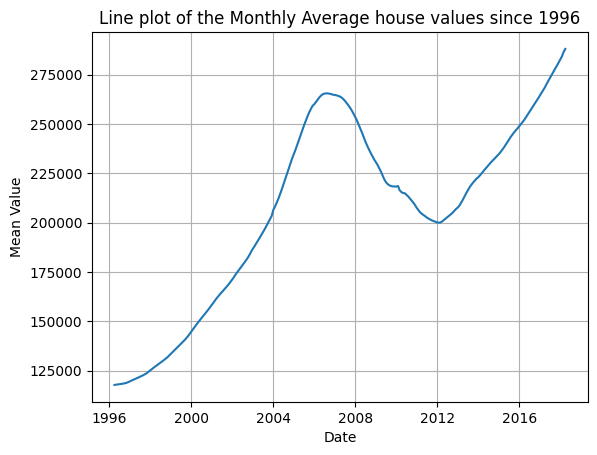

In [ ]:
# Plotting the monthly housing average
plt.figure()
plt.plot(month_mean.index, month_mean['value'])
plt.title('Line plot of the Monthly Average house values since 1996')
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.grid(True)
plt.show()


Grouping per Year and plottting

In [ ]:
#Setting the year as the index
df1['Year'] = df1.index.year


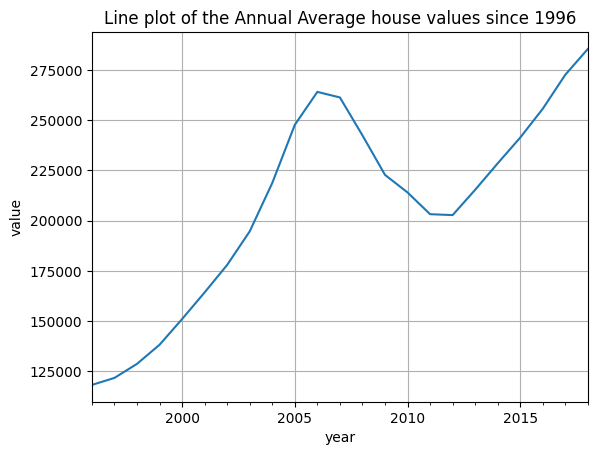

In [ ]:
#Plotting the Housing annual average
df1_yearly = df1['value'].resample('A').mean()
df1_yearly.plot();
plt.title('Line plot of the Annual Average house values since 1996')
plt.xlabel('year')
plt.ylabel('value')
plt.grid()

Grouping per Quarter and plotting

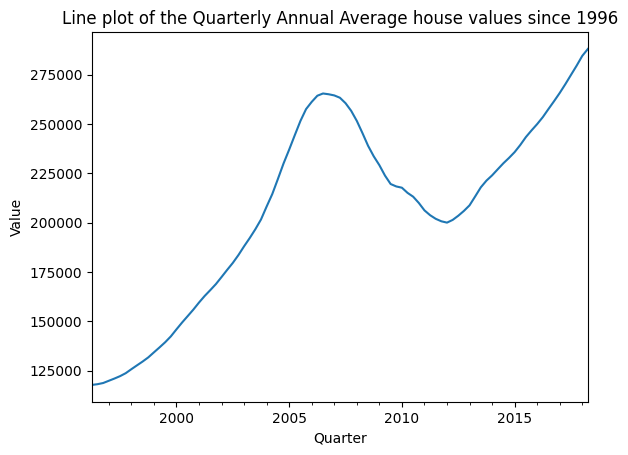

In [ ]:
#Plotting the Quarterly annual housing average
df1_quarterly = df1['value'].resample('Q').mean()
df1_quarterly.plot();
plt.title('Line plot of the Quarterly Annual Average house values since 1996')
plt.xlabel('Quarter')
plt.ylabel('Value')
plt.show()

Grouping per Decade and plotting

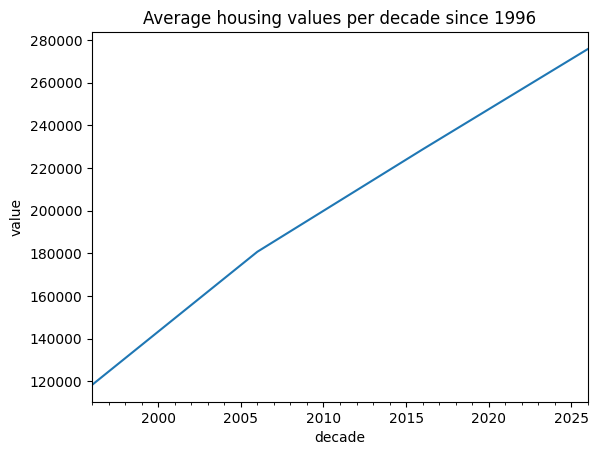

In [ ]:
#Plotting the Average housing values per decade
df1_decade = df1['value'].resample('10Y').mean()
df1_decade.plot();
plt.title('Average housing values per decade since 1996')
plt.xlabel('decade')
plt.ylabel('value')
plt.show()

We proceeded to group our dataframe with the Region Name and Value columns only inorder to determine the Region Names with the highest mean_values.

In [ ]:
# Group the data by the 'RegionName' and 'Year' columns and calculate the mean value:
grouped_data = df1.groupby(['RegionName'])['value'].mean()
grouped_data.head()

RegionName
1001    174509.811321
1002    273152.452830
1005    172650.943396
1007    217938.113208
1008    175319.622642
Name: value, dtype: float64

In [ ]:
#Resetting the index
grouped_new_df = grouped_data.reset_index()
grouped_new_df.columns = ['RegionName', 'mean_value']
grouped_new_df.head()

RegionName     mean_value
0        1001  174509.811321
1        1002  273152.452830
2        1005  172650.943396
3        1007  217938.113208
4        1008  175319.622642

In [ ]:
#Sorting the grouped dataframe using the mean_value, in descending order
grouped_new = grouped_new_df.sort_values(by = 'mean_value', ascending = False)
grouped_new.head()

RegionName    mean_value
1405        10021  8.438275e+06
1403        10011  5.444482e+06
1406        10128  5.085436e+06
1404        10014  4.507875e+06
13590       94027  3.487129e+06

In [ ]:
# slicing the top 10 values
top_10_df = grouped_new.sort_values('mean_value', ascending = False).head(10)
top_10_df

RegionName    mean_value
1405        10021  8.438275e+06
1403        10011  5.444482e+06
1406        10128  5.085436e+06
1404        10014  4.507875e+06
13590       94027  3.487129e+06
12180       81611  3.147124e+06
12902       90210  2.789977e+06
5528        33480  2.634498e+06
13621       94123  2.630977e+06
13615       94115  2.399030e+06

The output above contains a list of the top 10 Region Names according to the mean_value

We proceeded to visualise this result below with a horizontal bar graph.

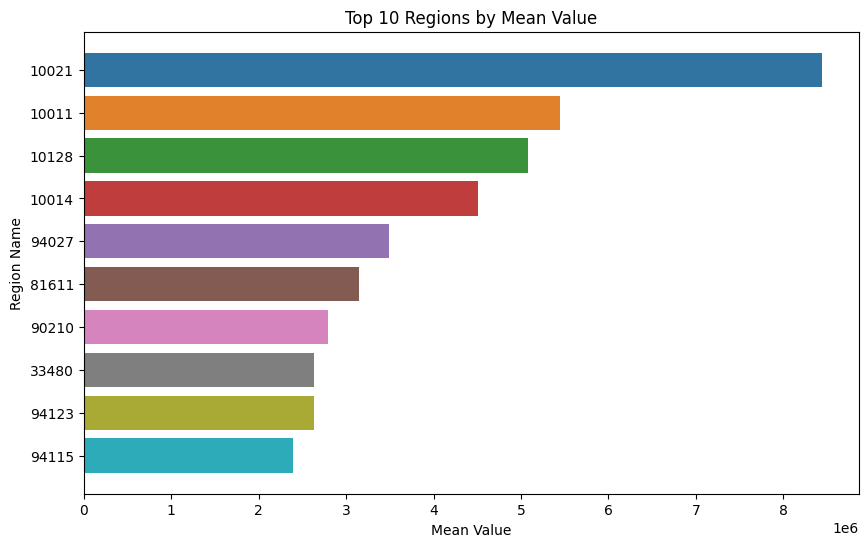

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x= 'mean_value', y='RegionName', data=top_10_df, orient='h',  order=top_10_df['RegionName'])
plt.xlabel('Mean Value')
plt.ylabel('Region Name')
plt.title('Top 10 Regions by Mean Value')
plt.autoscale(enable=True)
plt.show()


We chose our metric of investment as Return of Investment (ROI). Defined using the formula below:

                 ROI = Net Investment Gain/Cost of Investment x 100

Considering the investment firm is new in the market, we opted to model our dataset using the last 3 years.

In [ ]:
# Subsetting the data to include only the years 2015 to 2018
start_date = '2015-04-01'
end_date = '2018-04-01'
subset_df = df1.loc[start_date:end_date]

# Print the subsetted DataFrame
print(subset_df)

            RegionID  RegionName         City State  SizeRank  CountyName  \
time                                                                        
2015-04-01     58196        1001       Agawam    MA      5851     Hampden   
2015-05-01     58196        1001       Agawam    MA      5851     Hampden   
2015-06-01     58196        1001       Agawam    MA      5851     Hampden   
2015-07-01     58196        1001       Agawam    MA      5851     Hampden   
2015-08-01     58196        1001       Agawam    MA      5851     Hampden   
...              ...         ...          ...   ...       ...         ...   
2017-12-01    753844       29486  Summerville    SC      3188  Dorchester   
2018-01-01    753844       29486  Summerville    SC      3188  Dorchester   
2018-02-01    753844       29486  Summerville    SC      3188  Dorchester   
2018-03-01    753844       29486  Summerville    SC      3188  Dorchester   
2018-04-01    753844       29486  Summerville    SC      3188  Dorchester   

In [ ]:
# Grouping the melted dataframe by 'RegionName' and 'Year' and calculating the mean
grouped_df =pd.DataFrame(subset_df.groupby(['RegionName', 'Year',])['value'].mean())
grouped_df.columns = ['mean_value']
grouped_df.head(10)

mean_value
RegionName Year               
1001       2015  192322.222222
           2016  199033.333333
           2017  212866.666667
           2018  222425.000000
1002       2015  316555.555556
           2016  316950.000000
           2017  333133.333333
           2018  348950.000000
1005       2015  176522.222222
           2016  191550.000000

Grouping the dataset and Calculating the ROI

In [ ]:
# Group the melted dataframe by 'RegionName' and calculate the mean value for the entire timeframe
grouped_df = subset_df.groupby('RegionName')['value'].mean().reset_index()
grouped_df.columns = ['RegionName', 'mean_value']

# Calculate ROI by taking percent change of the mean 'value' column
grouped_df['ROI3'] = grouped_df['mean_value'].pct_change(periods=3) * 100

# Drop the first row since it will have NaN value for ROI
grouped_df = grouped_df.dropna()

# Sort the DataFrame by ROI in descending order
grouped_df = grouped_df.sort_values('ROI3', ascending=False)

# Print the resulting DataFrame with ROI value
print(grouped_df.head(10))

       RegionName    mean_value         ROI3
1405        10021  1.844019e+07  5782.191013
1403        10011  1.162878e+07  5578.042150
5038        31561  2.391924e+06  3637.381757
1404        10014  9.444808e+06  2915.375522
12180       81611  4.106662e+06  1667.189644
5703        34102  2.665270e+06  1255.234588
1774        11975  2.934378e+06  1234.414906
12181       81615  2.622397e+06  1019.635130
12809       89413  2.030743e+06   956.295953
14060       96141  6.153486e+05   949.453791


We selected the top 10 RegionNames based on the ROI value as listed below;

* 10021
* 10011
* 31561
* 10014
* 81611
* 34102
* 11975
* 81615
* 89413
* 96141

In [ ]:
# Select the top 10 rows
top_10_df = grouped_df.head(10)


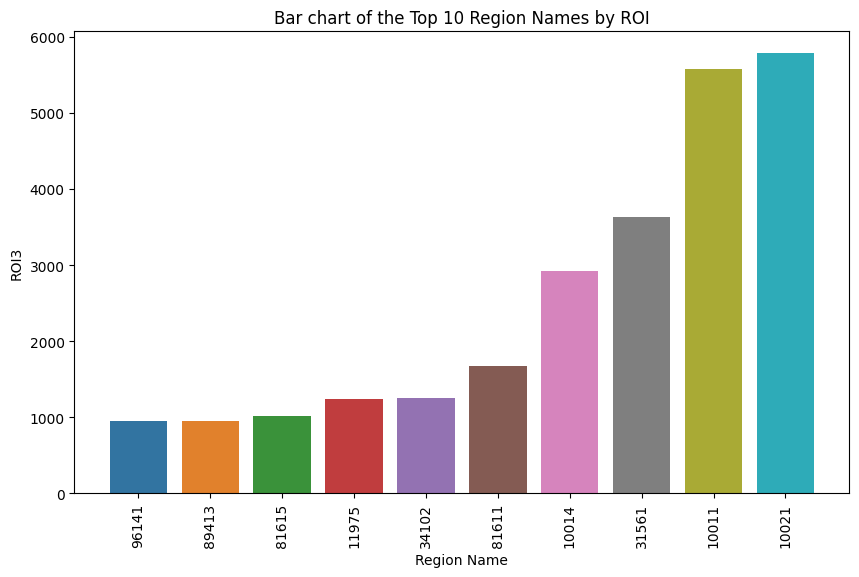

In [ ]:
# plotting Region names with the highest ROI
# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_df['RegionName'], y= top_10_df['ROI3'],order=top_10_df.sort_values('ROI3')['RegionName'] )
plt.xlabel('Region Name')
plt.ylabel('ROI3')
plt.title('Bar chart of the Top 10 Region Names by ROI')
plt.xticks(rotation=90)
plt.autoscale(enable=True)
plt.show()

Displaying the location of the top 10 Region Names

In [ ]:
#Get Location Names
best10_zipcodes = list(top_10_df.RegionName.values)
for i in best10_zipcodes:
    city = df1[df1['RegionName']==i].City.values[0]
    state = df1[df1['RegionName']==i].State.values[0]
    print(f'Zipcode : {i} \nLocation: {city}, {state}\n')

Zipcode : 10021 
Location: New York, NY

Zipcode : 10011 
Location: New York, NY

Zipcode : 31561 
Location: Sea Island, GA

Zipcode : 10014 
Location: New York, NY

Zipcode : 81611 
Location: Aspen, CO

Zipcode : 34102 
Location: Naples, FL

Zipcode : 11975 
Location: Wainscott, NY

Zipcode : 81615 
Location: Snowmass Village, CO

Zipcode : 89413 
Location: Glenbrook, NV

Zipcode : 96141 
Location: Homewood, CA



In [ ]:
#Creating a lost of the top 10 Region Names
region_name_list = top_10_df['RegionName'].unique().tolist()
region_name_list

[10021, 10011, 31561, 10014, 81611, 34102, 11975, 81615, 89413, 96141]

In [ ]:
# Create a list of region names you want to filter
region_names =[10021, 10011, 31561, 10014, 81611,34102, 11975, 81615, 89413, 96141]

# Filter the original DataFrame based on the region names
filtered_df = subset_df[subset_df['RegionName'].isin(region_names)]

# Create a new DataFrame with only the 'RegionName' and 'value' columns
new_df = filtered_df.loc[:, ['RegionName', 'value']]

# Print the new DataFrame
print(new_df.tail(10))
print(len(new_df))
print(new_df['RegionName'].unique())

            RegionName     value
time                            
2017-07-01       96141  671300.0
2017-08-01       96141  671500.0
2017-09-01       96141  666500.0
2017-10-01       96141  667100.0
2017-11-01       96141  671800.0
2017-12-01       96141  675000.0
2018-01-01       96141  675000.0
2018-02-01       96141  677500.0
2018-03-01       96141  684400.0
2018-04-01       96141  689700.0
370
[10011 10014 10021 11975 31561 34102 81611 81615 89413 96141]


In [ ]:
#Creating a new df for the yearly sampled values and setting the index as time
new_df['Year'] = new_df.index.year
new_df.head()

RegionName       value  Year
time                                    
2015-04-01       10011  10572500.0  2015
2015-05-01       10011  10569500.0  2015
2015-06-01       10011  10674900.0  2015
2015-07-01       10011  10848100.0  2015
2015-08-01       10011  11131200.0  2015

In [ ]:
# Drop the year column
new_df.drop('Year',axis=1,inplace=True)
new_df.head()

RegionName       value
time                              
2015-04-01       10011  10572500.0
2015-05-01       10011  10569500.0
2015-06-01       10011  10674900.0
2015-07-01       10011  10848100.0
2015-08-01       10011  11131200.0

Calculating the Descriptive Statistics for the top 10 Region Names in the yearly sampled dataset




In [ ]:
for region_name1 in new_df['RegionName'].unique():
    region_data = new_df[new_df['RegionName'] == region_name1]

    print(f'Value descriptive statistics for region name {region_name1}:')
    print(region_data['value'].describe())
    print()

Value descriptive statistics for region name 10011:
count    3.700000e+01
mean     1.162878e+07
std      4.438828e+05
min      1.056950e+07
25%      1.137880e+07
50%      1.173390e+07
75%      1.199880e+07
max      1.213760e+07
Name: value, dtype: float64

Value descriptive statistics for region name 10014:
count    3.700000e+01
mean     9.444808e+06
std      3.304039e+05
min      8.876100e+06
25%      9.135300e+06
50%      9.458600e+06
75%      9.701500e+06
max      9.958800e+06
Name: value, dtype: float64

Value descriptive statistics for region name 10021:
count    3.700000e+01
mean     1.844019e+07
std      6.335105e+05
min      1.664400e+07
25%      1.830710e+07
50%      1.852730e+07
75%      1.885970e+07
max      1.931490e+07
Name: value, dtype: float64

Value descriptive statistics for region name 11975:
count    3.700000e+01
mean     2.934378e+06
std      3.292249e+05
min      2.343300e+06
25%      2.692000e+06
50%      2.938700e+06
75%      3.207900e+06
max      3.473300e+06
N

### Checking for trend

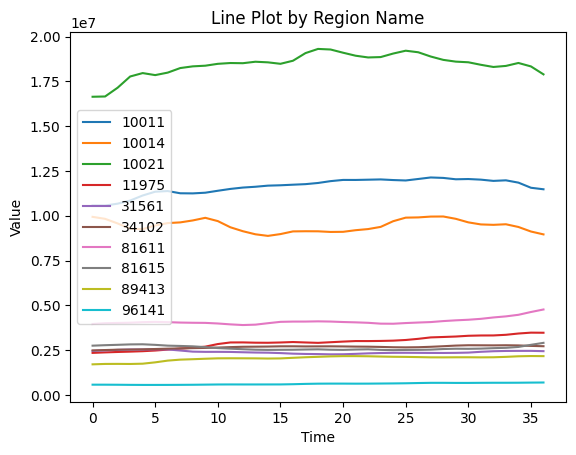

In [ ]:
#checking for trends in the dataset
for region_name, region_data in new_df.groupby('RegionName'):
  values = region_data['value'].values.flatten()  # Flatten the values to create a 1-dimensional array
  plt.plot(values, label=region_name)  # Plot the values with region name as label


plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Line Plot by Region Name')
plt.legend()
plt.show()

Visualising using line plots for each of the Region Names in the top 10

In [ ]:
# Group the dataframe by 'RegionName'
grouped_df1 = new_df.groupby('RegionName')

# Create a dictionary to store the separate dataframes for each region name
region_dataframes = {}

# Iterate over each group and create a separate dataframe for each region name
for region_name, region_group in grouped_df1:
    region_dataframes[region_name] = region_group.copy()

# Access the separate dataframes for each region name
for region_name, region_df in region_dataframes.items():
    print(f"Dataframe for Region Name: {region_name}")
    print(region_df.head())
    print()


Dataframe for Region Name: 10011
            RegionName       value
time                              
2015-04-01       10011  10572500.0
2015-05-01       10011  10569500.0
2015-06-01       10011  10674900.0
2015-07-01       10011  10848100.0
2015-08-01       10011  11131200.0

Dataframe for Region Name: 10014
            RegionName      value
time                             
2015-04-01       10014  9938600.0
2015-05-01       10014  9827500.0
2015-06-01       10014  9571200.0
2015-07-01       10014  9278700.0
2015-08-01       10014  9252000.0

Dataframe for Region Name: 10021
            RegionName       value
time                              
2015-04-01       10021  16644000.0
2015-05-01       10021  16659500.0
2015-06-01       10021  17149200.0
2015-07-01       10021  17775200.0
2015-08-01       10021  17965800.0

Dataframe for Region Name: 11975
            RegionName      value
time                             
2015-04-01       11975  2343300.0
2015-05-01       11975  2371200.0
2

Since we want to plot the line plots of time against value, we proceeded to drop the RegionNames

In [ ]:
# Drop the column in each dataframe
# Iterate over each dataframe in the dictionary and drop the 'RegionName' column
for region_name, region_df in region_dataframes.items():
    region_df.drop('RegionName', axis=1, inplace=True)

# Access the modified dataframes
for region_name, region_df in region_dataframes.items():
    print(f"Dataframe for Region Name: {region_name}")
    print(region_df.head())
    print()

Dataframe for Region Name: 10011
                 value
time                  
2015-04-01  10572500.0
2015-05-01  10569500.0
2015-06-01  10674900.0
2015-07-01  10848100.0
2015-08-01  11131200.0

Dataframe for Region Name: 10014
                value
time                 
2015-04-01  9938600.0
2015-05-01  9827500.0
2015-06-01  9571200.0
2015-07-01  9278700.0
2015-08-01  9252000.0

Dataframe for Region Name: 10021
                 value
time                  
2015-04-01  16644000.0
2015-05-01  16659500.0
2015-06-01  17149200.0
2015-07-01  17775200.0
2015-08-01  17965800.0

Dataframe for Region Name: 11975
                value
time                 
2015-04-01  2343300.0
2015-05-01  2371200.0
2015-06-01  2394400.0
2015-07-01  2413700.0
2015-08-01  2437600.0

Dataframe for Region Name: 31561
                value
time                 
2015-04-01  2453900.0
2015-05-01  2482800.0
2015-06-01  2511200.0
2015-07-01  2530500.0
2015-08-01  2531200.0

Dataframe for Region Name: 34102
             

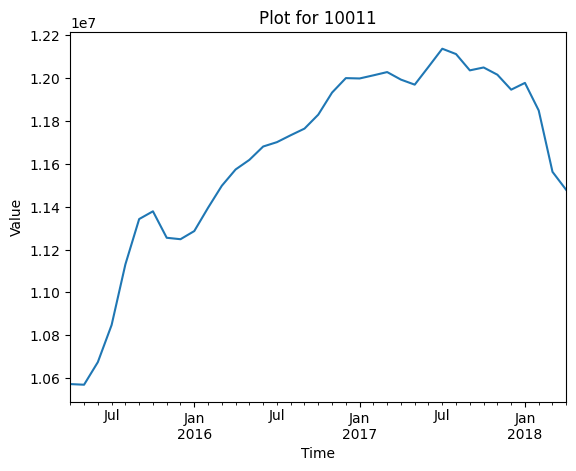

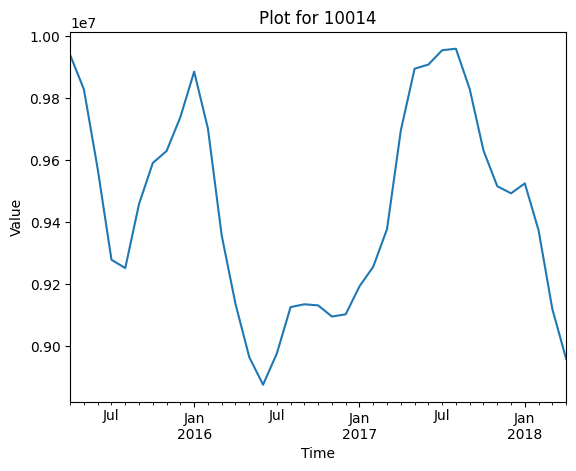

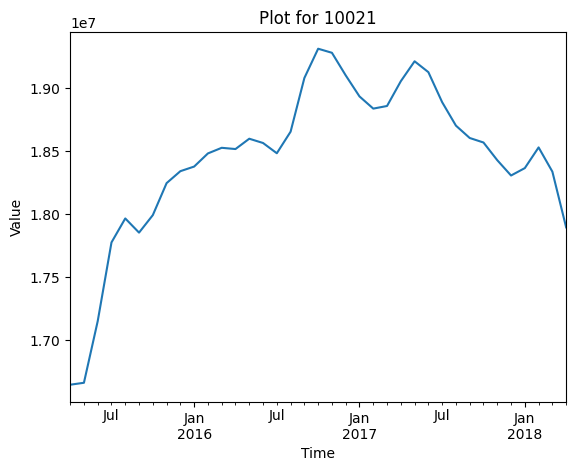

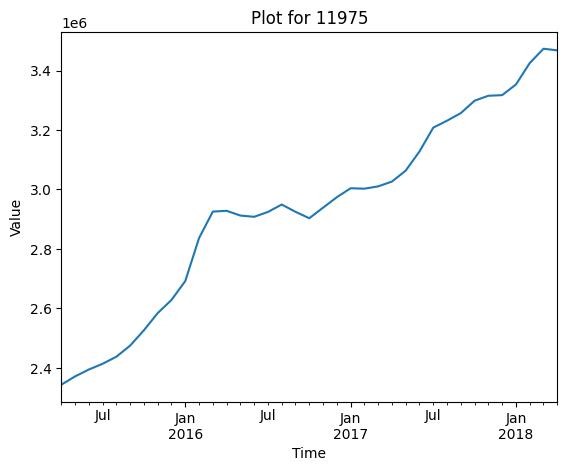

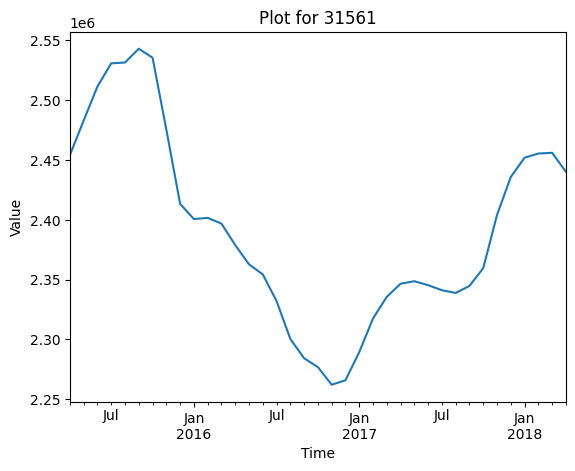

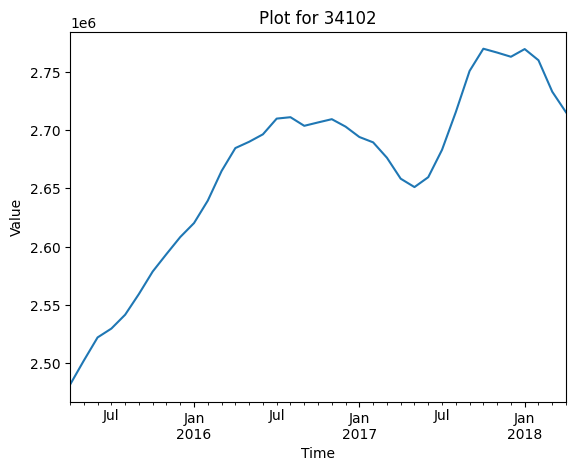

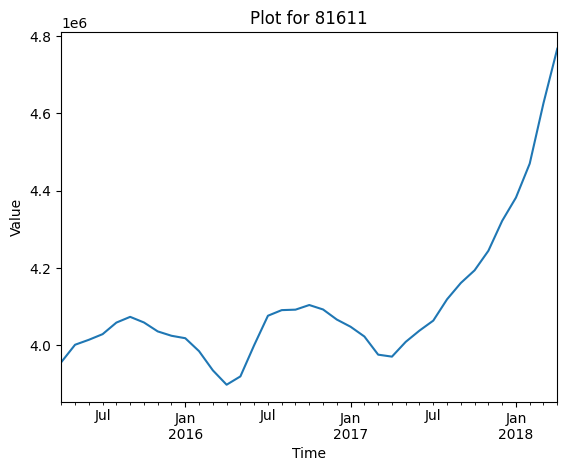

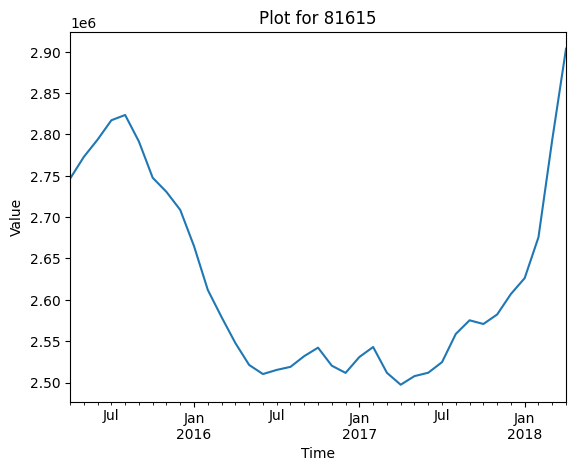

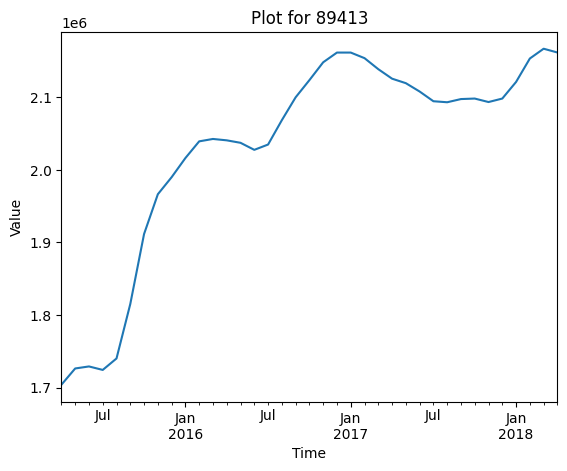

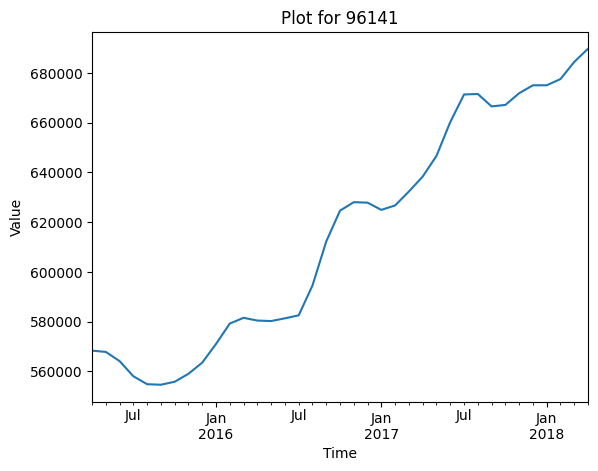

In [ ]:
#Iterating over the list of RegionNames and plotting for each

for key, df in region_dataframes.items():
    # Plot the 'value' column for the current dataframe
    df['value'].plot()
    plt.title(f'Plot for {key}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()

### Performing Rolling Statistics

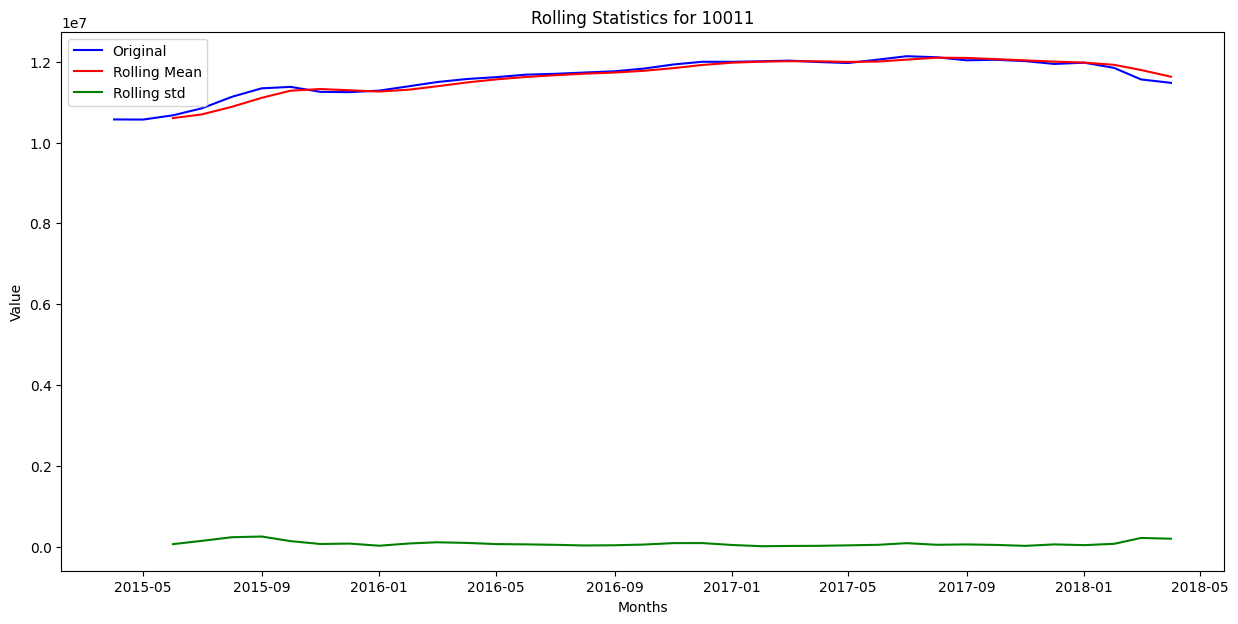

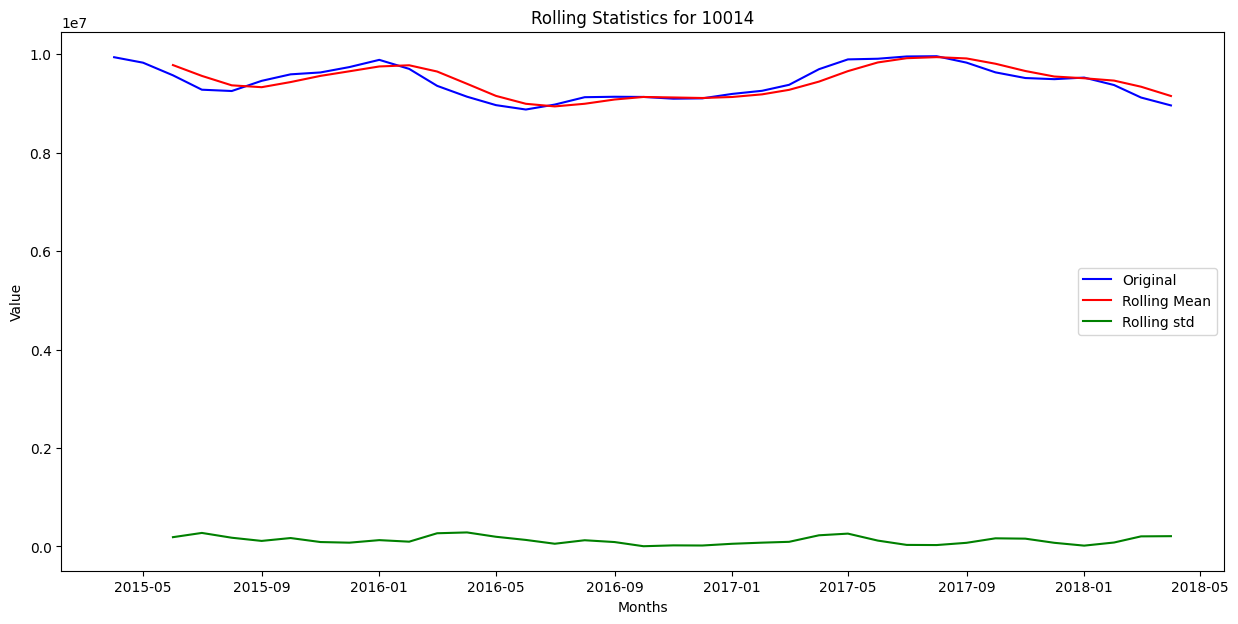

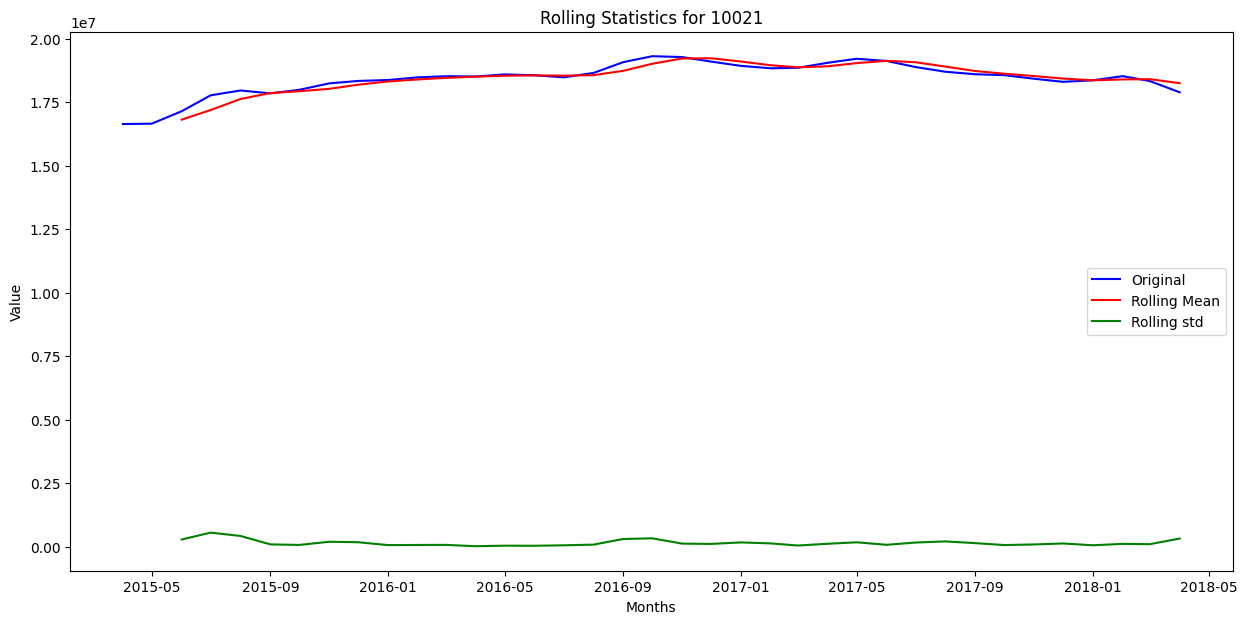

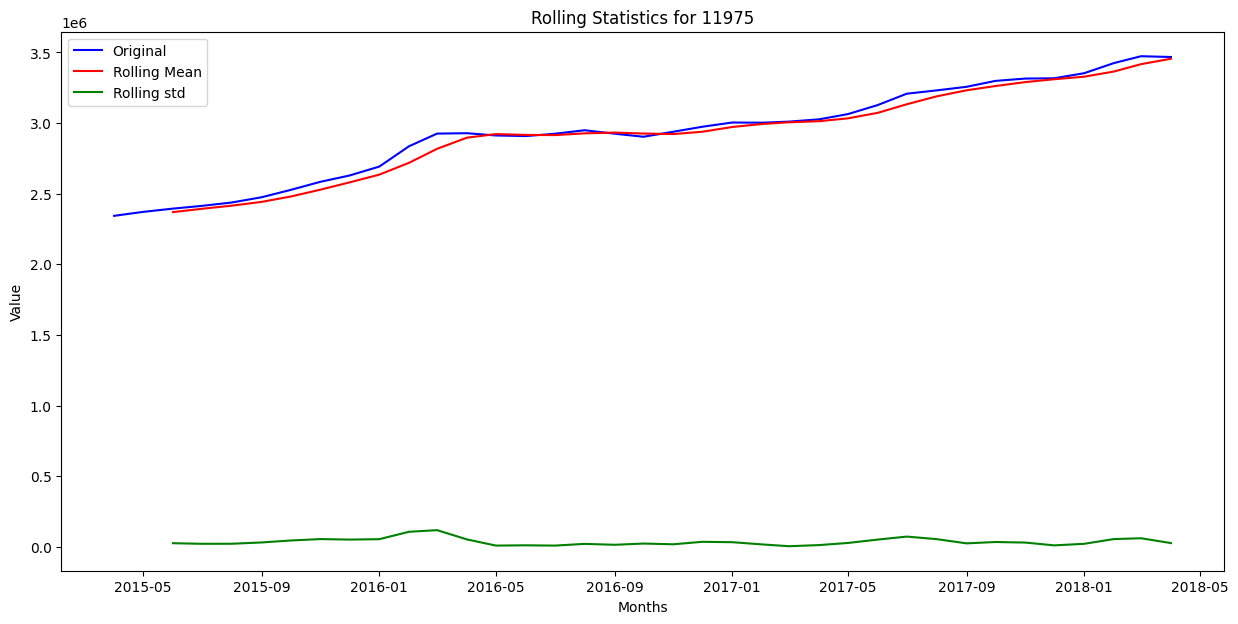

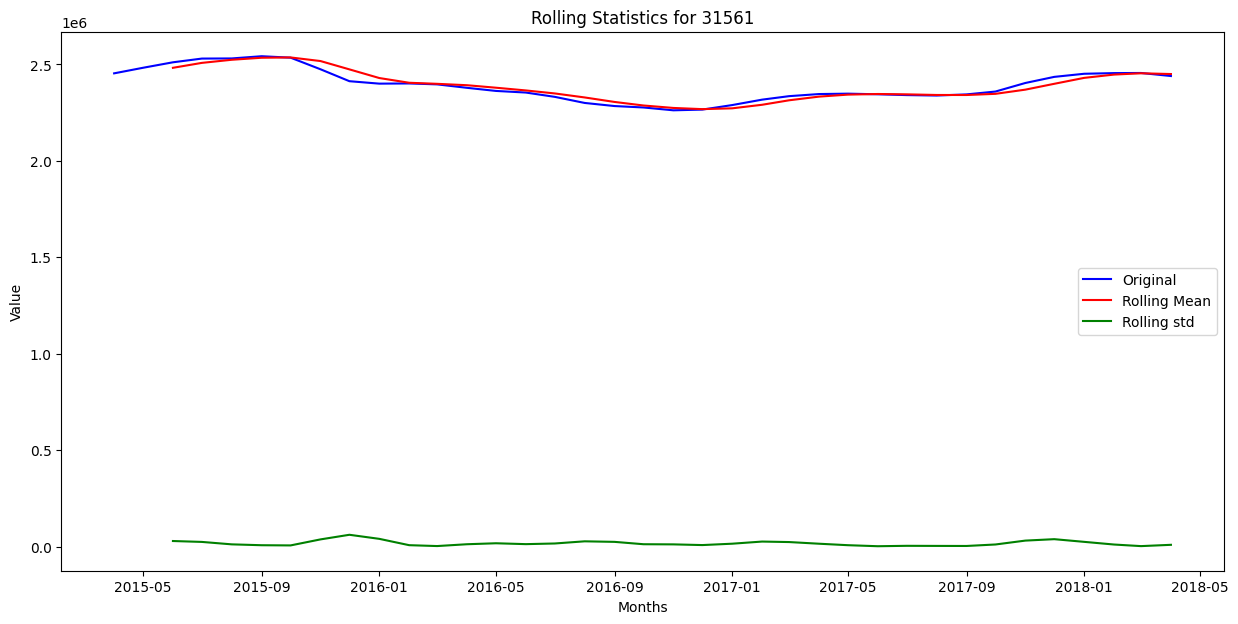

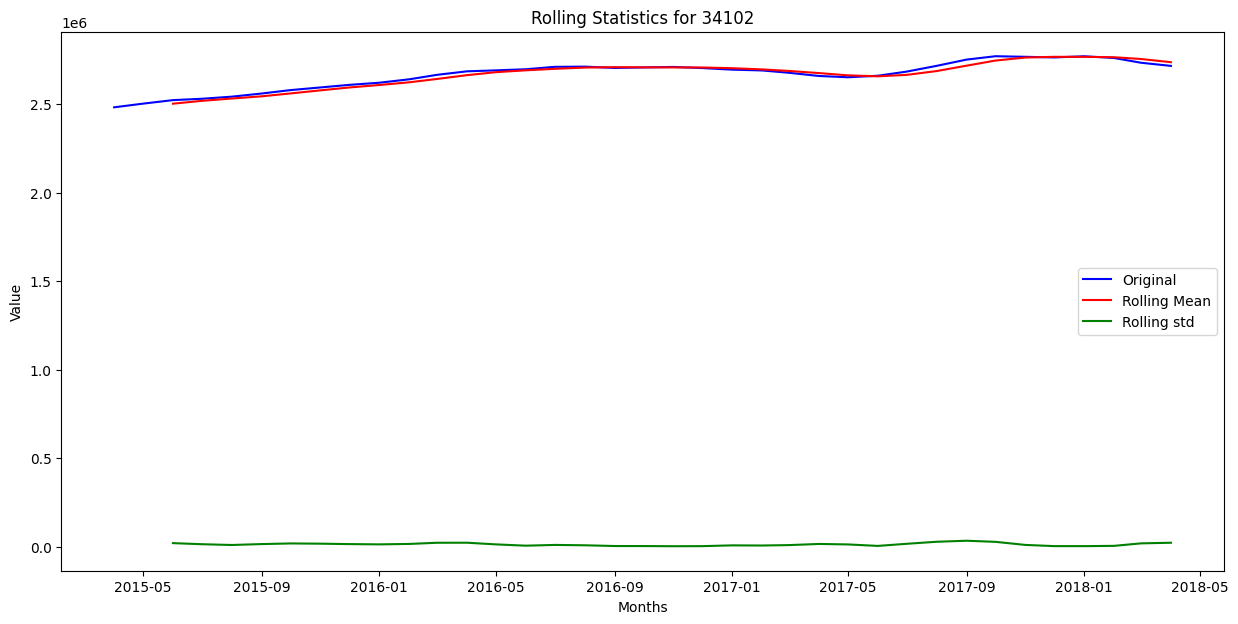

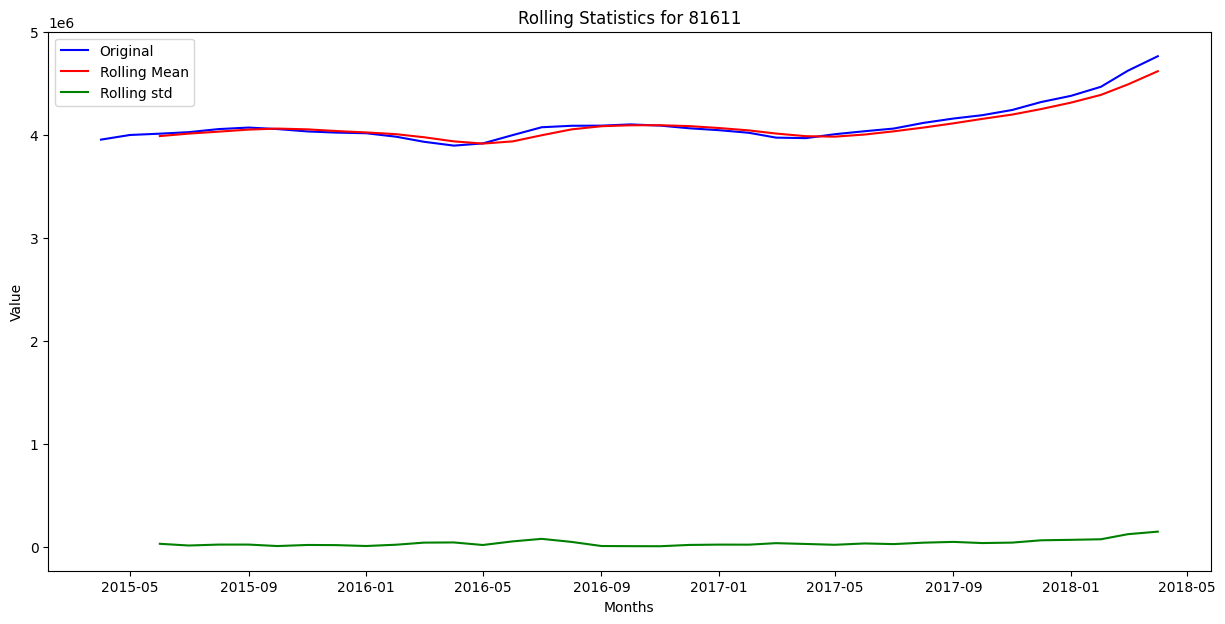

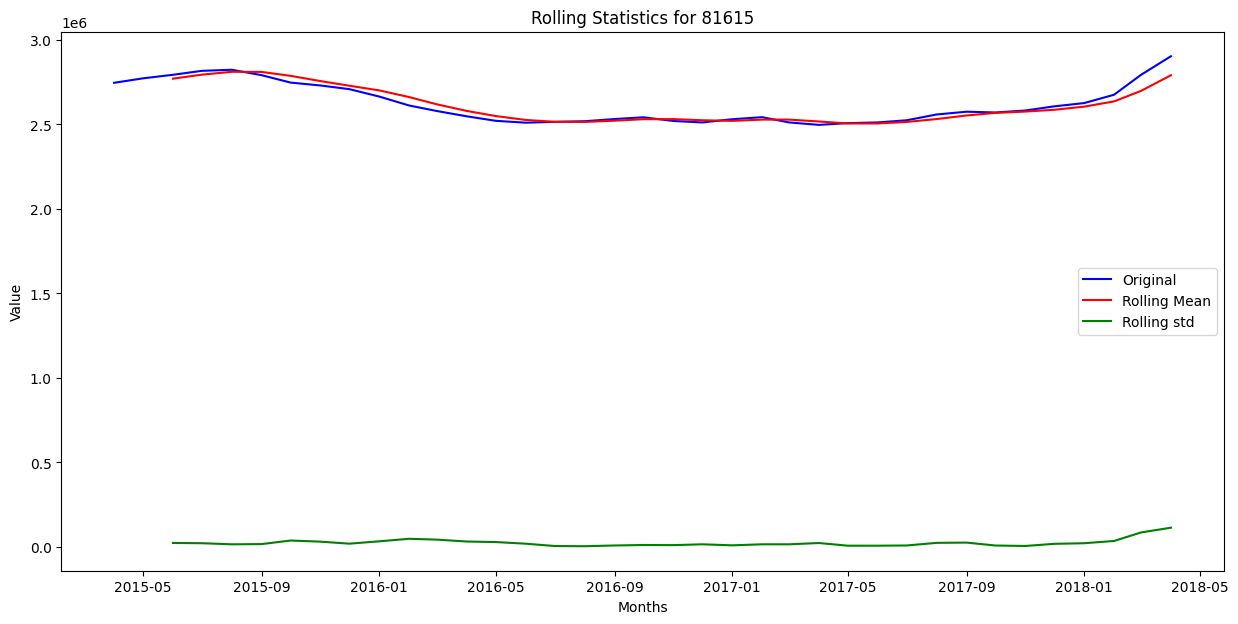

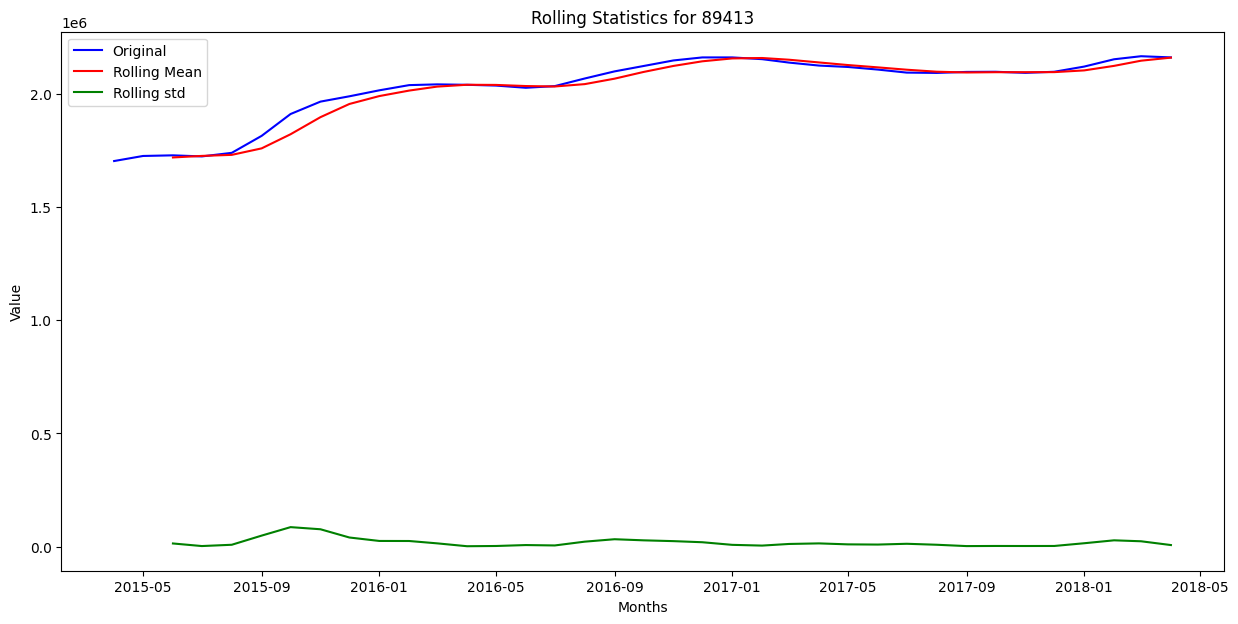

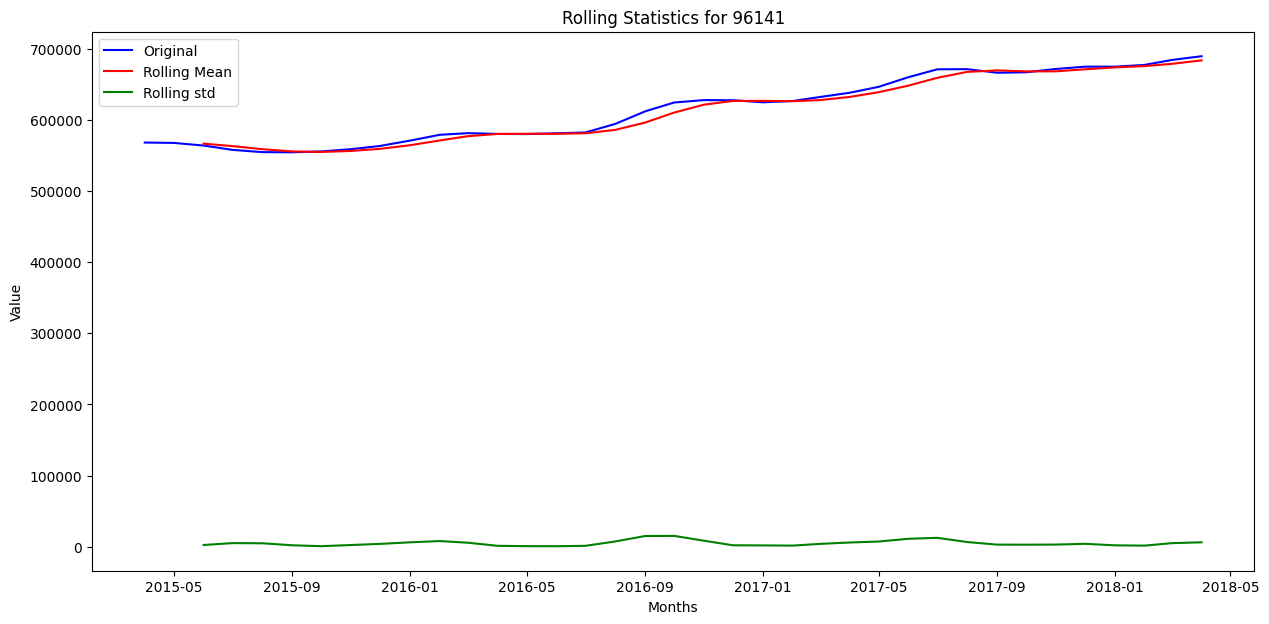

In [ ]:
# Define the window size for rolling calculations
window_size = 3

for key, df in region_dataframes.items():
    # Calculate the rolling mean and standard deviation for the 'value' column
    rolling_mean = df['value'].rolling(window=window_size).mean()
    rolling_std = df['value'].rolling(window=window_size).std()

    # Plot the original values, rolling mean, and rolling standard deviation
    fig = plt.figure(figsize=(15, 7))
    plt.plot(df['value'], c='blue', label='Original')
    plt.plot(rolling_mean, c='red', label='Rolling Mean')
    plt.plot(rolling_std, c='green', label='Rolling std')
    plt.xlabel('Months')
    plt.ylabel('Value')
    plt.title(f"Rolling Statistics for {key}")
    plt.legend()
    plt.show()



Performing Dickey Fuller Test to verify the plots above

In [ ]:
#Dickey-Fuller test to verify your visual result.
from statsmodels.tsa.stattools import adfuller

for key, df in region_dataframes.items():
    # Perform Dickey-Fuller test
    print(f'Results of Dickey-Fuller Test for {key}:')
    dftest = adfuller(df['value'])

    # Extract and display test results
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for k, v in dftest[4].items():
        dfoutput[f'Critical Value ({k})'] = v
    print(dfoutput)
    print('\n')

Results of Dickey-Fuller Test for 10011:
Test Statistic                  0.837760
p-value                         0.992222
#Lags Used                     10.000000
Number of Observations Used    26.000000
Critical Value (1%)            -3.711212
Critical Value (5%)            -2.981247
Critical Value (10%)           -2.630095
dtype: float64


Results of Dickey-Fuller Test for 10014:
Test Statistic                 -3.831754
p-value                         0.002599
#Lags Used                      8.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64


Results of Dickey-Fuller Test for 10021:
Test Statistic                 -0.322143
p-value                         0.922309
#Lags Used                      8.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)   

Interpreting the results:

* 10011 - The test statistic (0.837760) is greater than all the critical values, therefore we fail to reject the null hypothesis of non-stationarity. The data does not provide sufficient evidence to suggest that the time series is stationary.

* 10014 - The test statistic (-3.831754) is lower than the critical values, and the p-value (0.002599) is less than 0.05, therefore we reject the null hypothesis of non-stationarity. The data provides sufficient evidence to suggest that the time series is stationary.

* 10021 - The test statistic (-0.322143) is greater than the critical values, and the p-value (0.922309) is greater than 0.05, we fail to reject the null hypothesis of non-stationarity. The data does not provide sufficient evidence to suggest that the time series is stationary.

* 11975 - The test statistic (-1.169849) is greater than the critical values, and the p-value (0.686430) is greater than 0.05, we fail to reject the null hypothesis of non-stationarity. The data does not provide sufficient evidence to suggest that the time series is stationary.

* 31561 - Since the test statistic (-2.571365) is greater than the critical values, and the p-value (0.099061) is greater than 0.05, we fail to reject the null hypothesis of non-stationarity. The data does not provide sufficient evidence to suggest that the time series is stationary.

* 34102 - Since the test statistic (-2.339657) is greater than the critical values, and the p-value (0.159496) is greater than 0.05, we fail to reject the null hypothesis of non-stationarity. The data does not provide sufficient evidence to suggest that the time series is stationary.

* 81611 - Since the test statistic (2.577411) is greater than the critical values, and the p-value (0.999071) is greater than 0.05, we fail to reject the null hypothesis of non-stationarity. The data does not provide sufficient evidence to suggest that the time series is stationary.

* 81615 - Since the test statistic (-0.671517) is greater than the critical values, and the p-value (0.853990) is greater than 0.05, we fail to reject the null hypothesis of non-stationarity. The data does not provide sufficient evidence to suggest that the time series is stationary.

* 89416 - Since the test statistic (-2.852473) is greater than the critical values, and the p-value (0.051160) is greater than 0.05, we fail to reject the null hypothesis of non-stationarity. The data does not provide sufficient evidence to suggest that the time series is stationary.

* 96141 - Since the test statistic (-2.464834) is greater than the critical values, and the p-value (0.124267) is greater than 0.05, we fail to reject the null hypothesis of non-stationarity. The data does not provide sufficient evidence to suggest that the time series is stationary.



Based on the above interpretation, all other Zipnames contain non-stationarity apart from 10014. We proceed to perform detrending.

Checking for Stationarity

In [ ]:
# Defining the check_stationarity function
def stationarity_check(TS):

    # Import adfuller
    from statsmodels.tsa.stattools import adfuller

    # Calculate rolling statistics
    roll_mean = TS.rolling(window=5, center=False).mean()
    roll_std = TS.rolling(window=5, center=False).std()

    # Perform the Dickey Fuller test
    dftest = adfuller(TS)
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value',
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

    return None

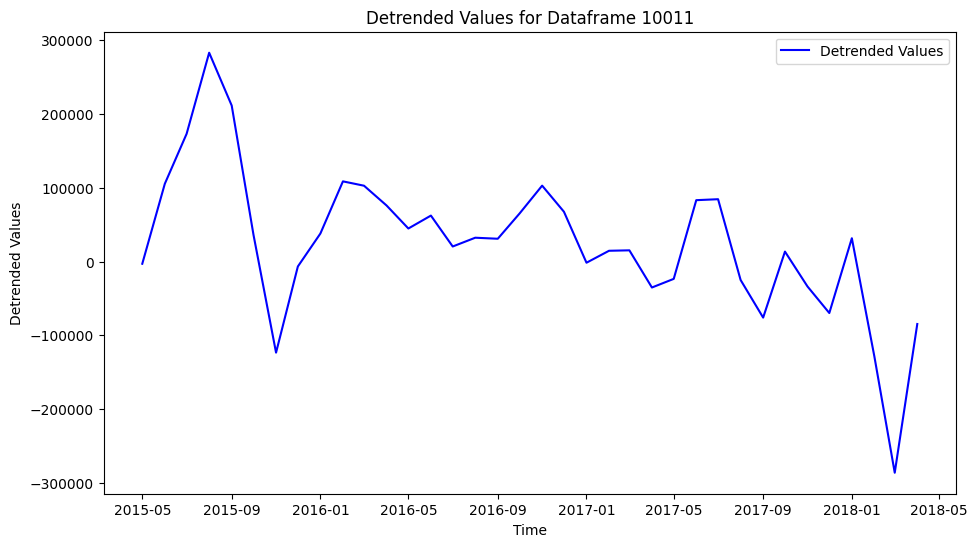

Stationarity Check for Dataframe 10011:


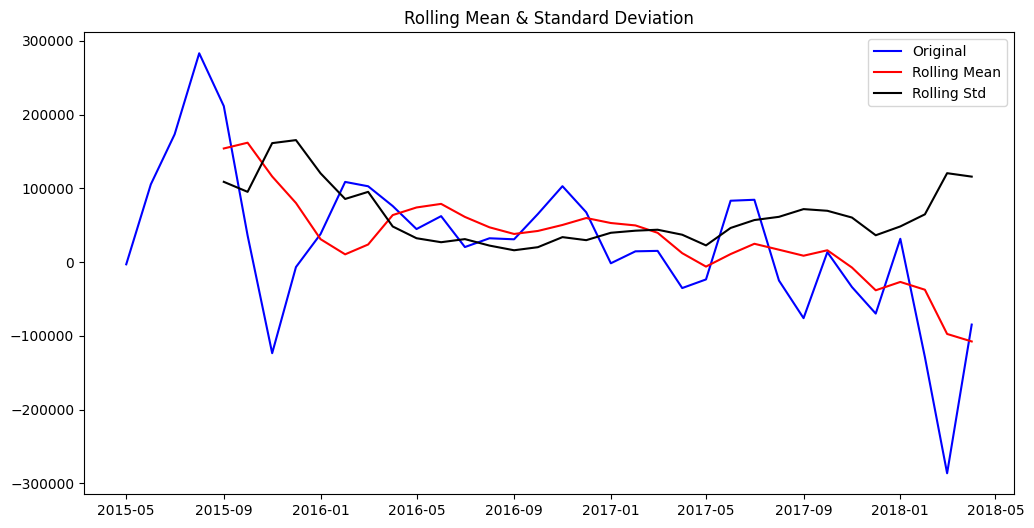

Results of Dickey-Fuller Test: 

Test Statistic                  2.625870
p-value                         0.999079
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64



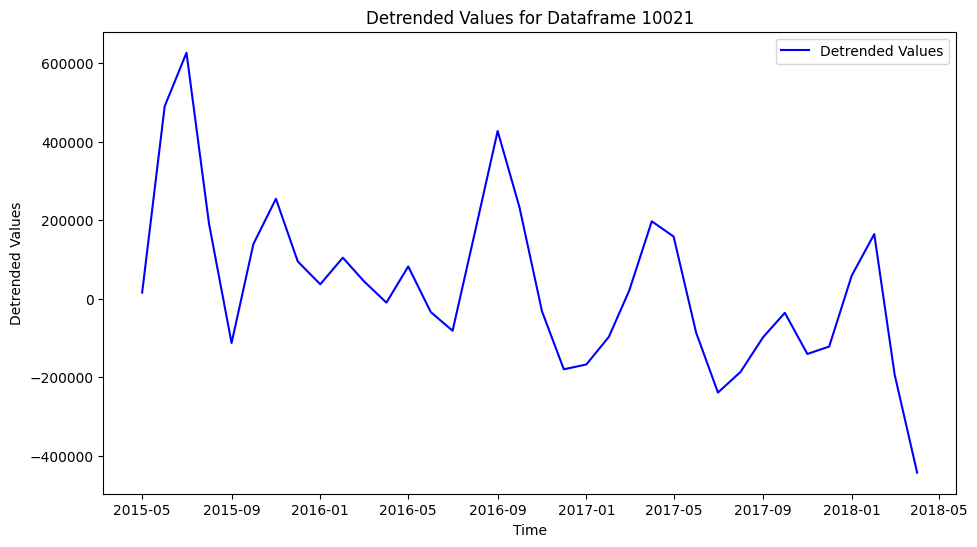

Stationarity Check for Dataframe 10021:


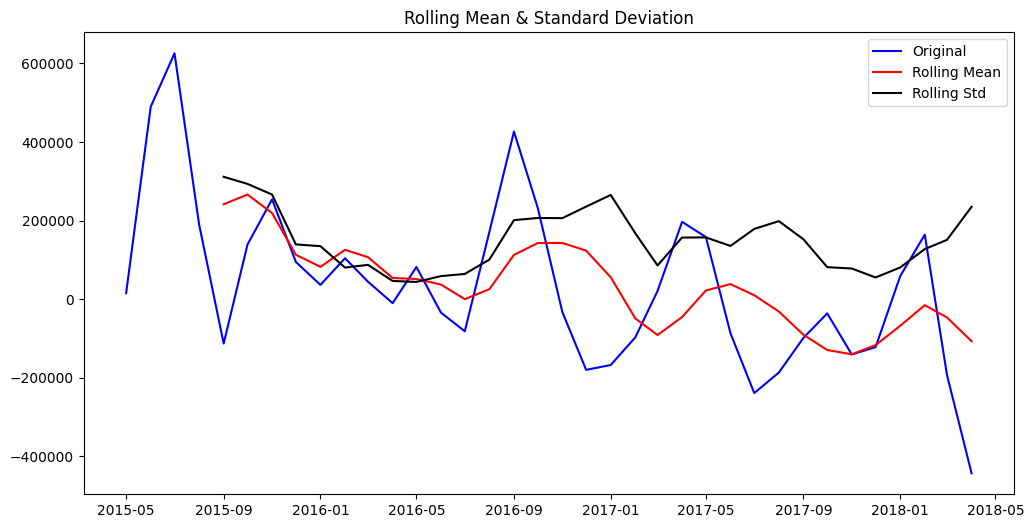

Results of Dickey-Fuller Test: 

Test Statistic                 -1.093233
p-value                         0.717763
#Lags Used                      7.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64



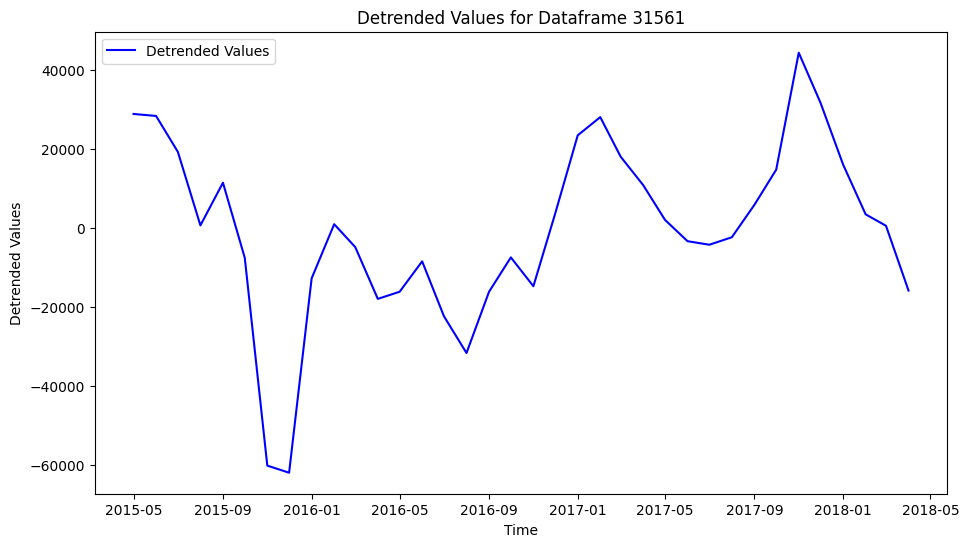

Stationarity Check for Dataframe 31561:


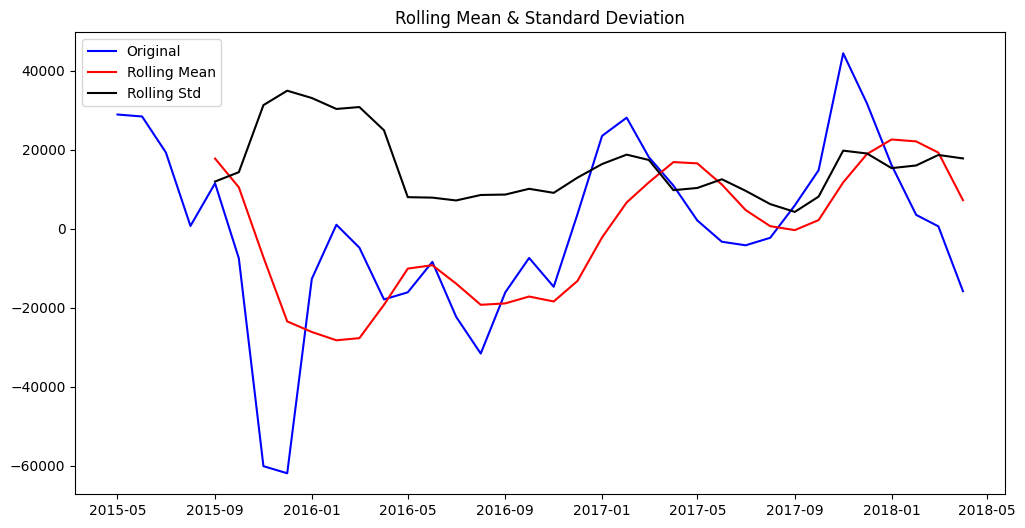

Results of Dickey-Fuller Test: 

Test Statistic                 -3.532639
p-value                         0.007187
#Lags Used                      1.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64



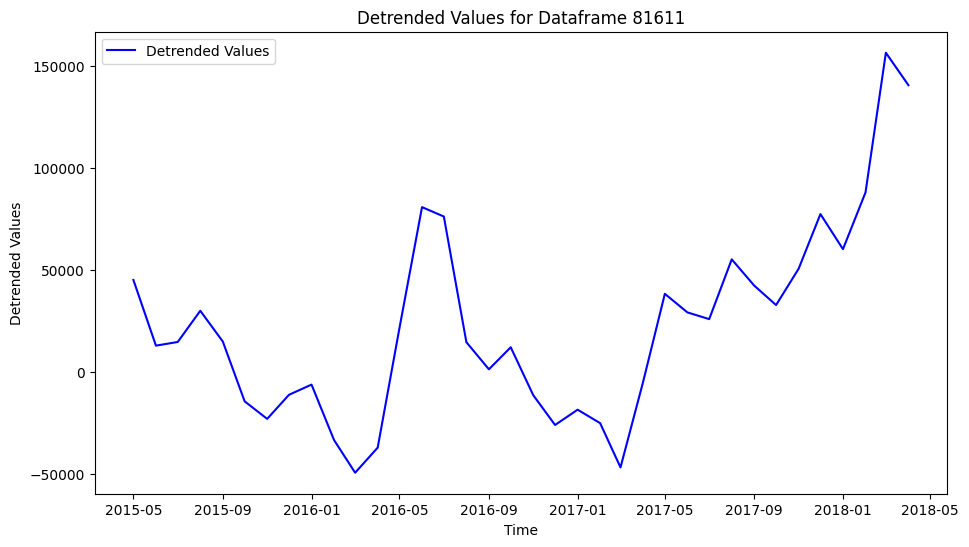

Stationarity Check for Dataframe 81611:


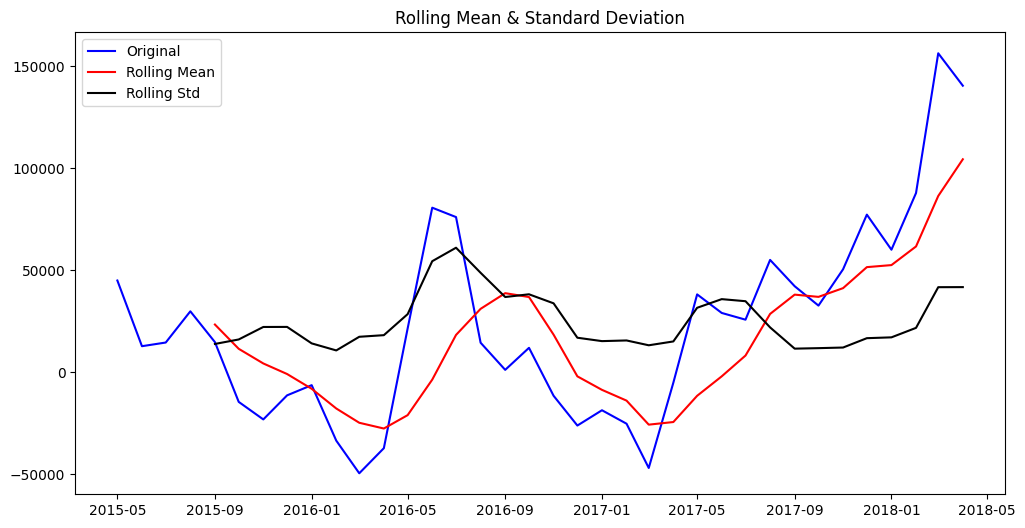

Results of Dickey-Fuller Test: 

Test Statistic                  0.235991
p-value                         0.974209
#Lags Used                      8.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64



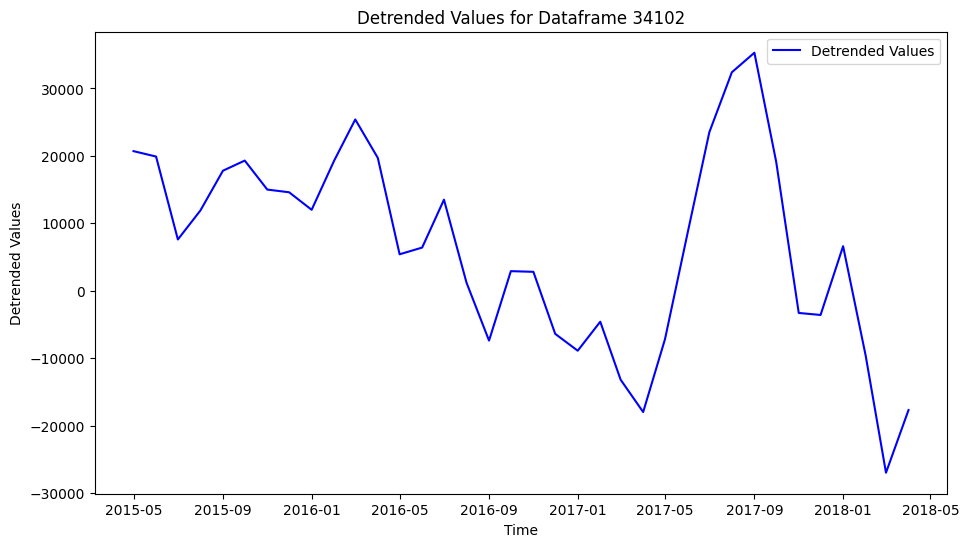

Stationarity Check for Dataframe 34102:


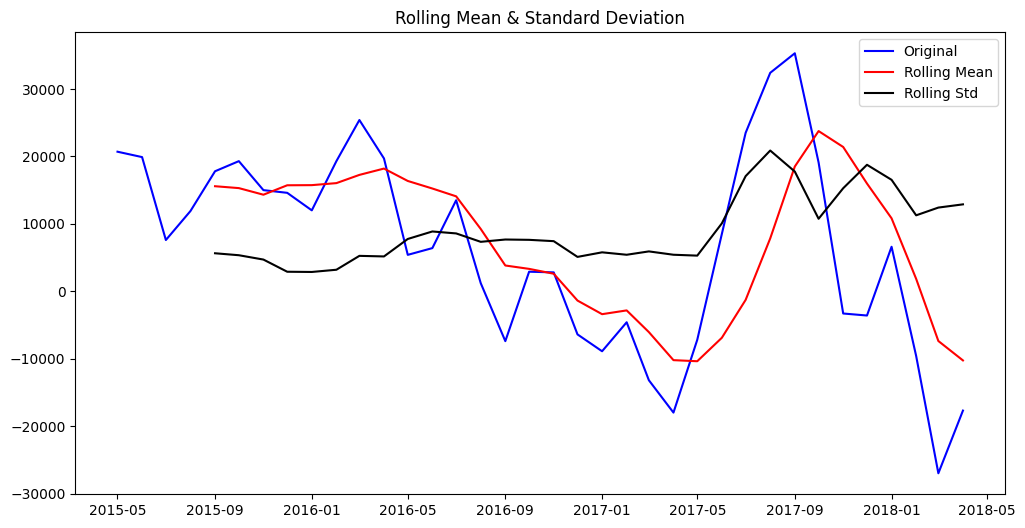

Results of Dickey-Fuller Test: 

Test Statistic                 -2.949263
p-value                         0.039912
#Lags Used                      3.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64



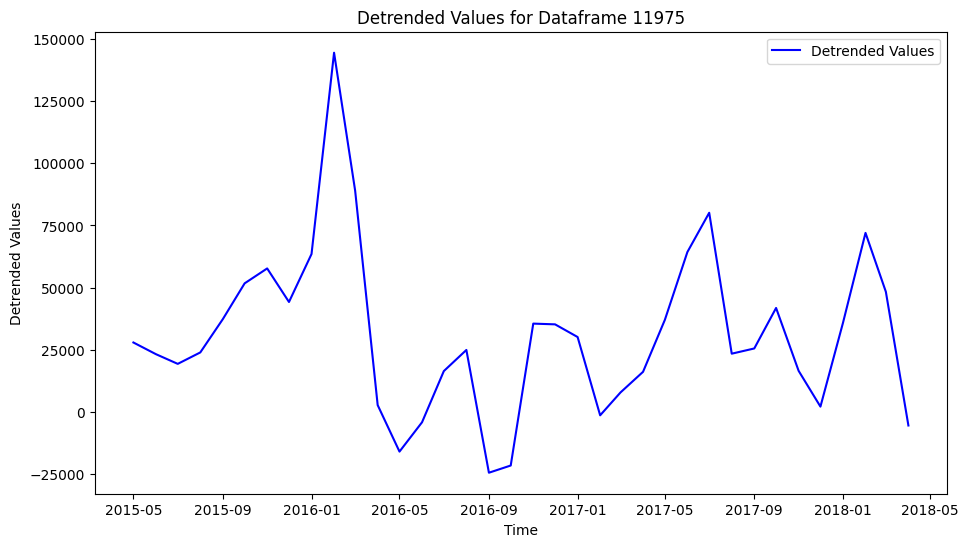

Stationarity Check for Dataframe 11975:


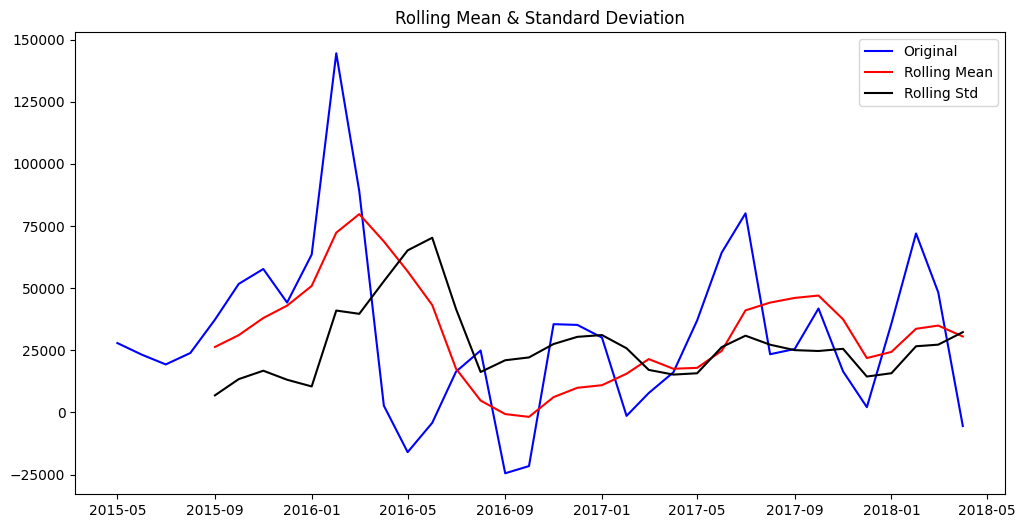

Results of Dickey-Fuller Test: 

Test Statistic                 -4.431406
p-value                         0.000261
#Lags Used                      1.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64



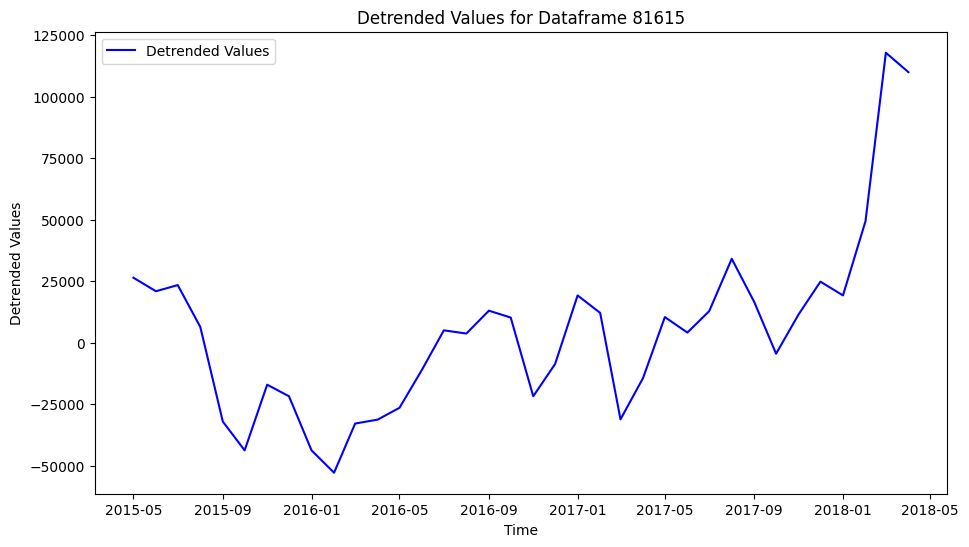

Stationarity Check for Dataframe 81615:


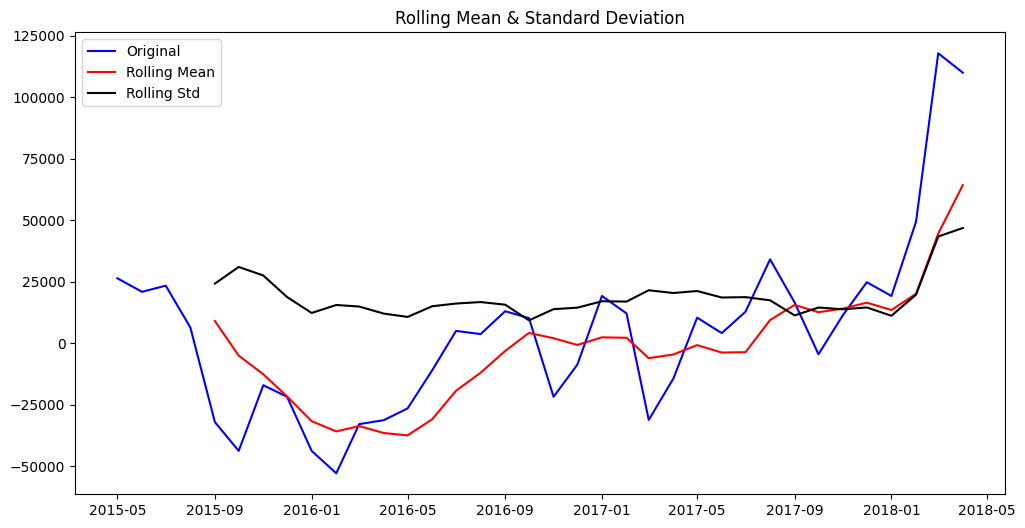

Results of Dickey-Fuller Test: 

Test Statistic                  0.605864
p-value                         0.987759
#Lags Used                      5.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64



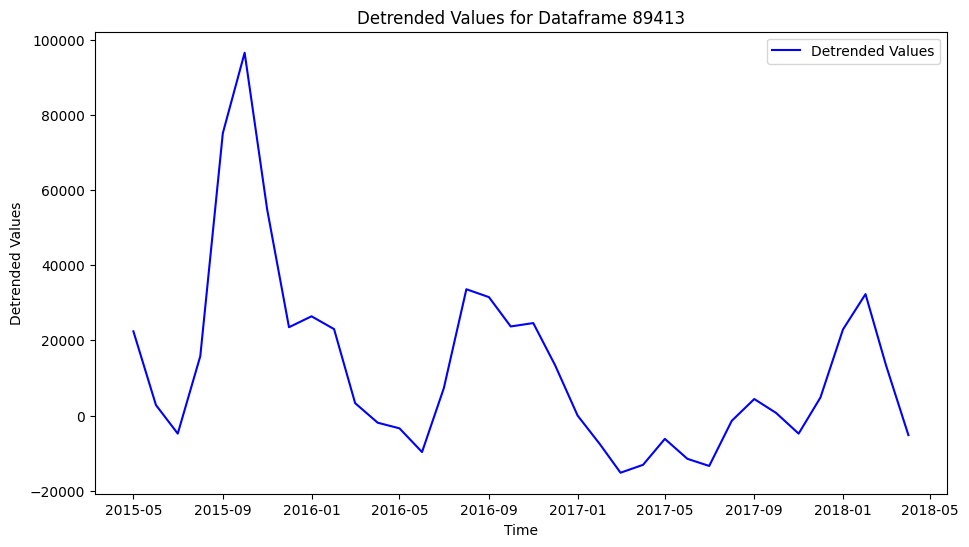

Stationarity Check for Dataframe 89413:


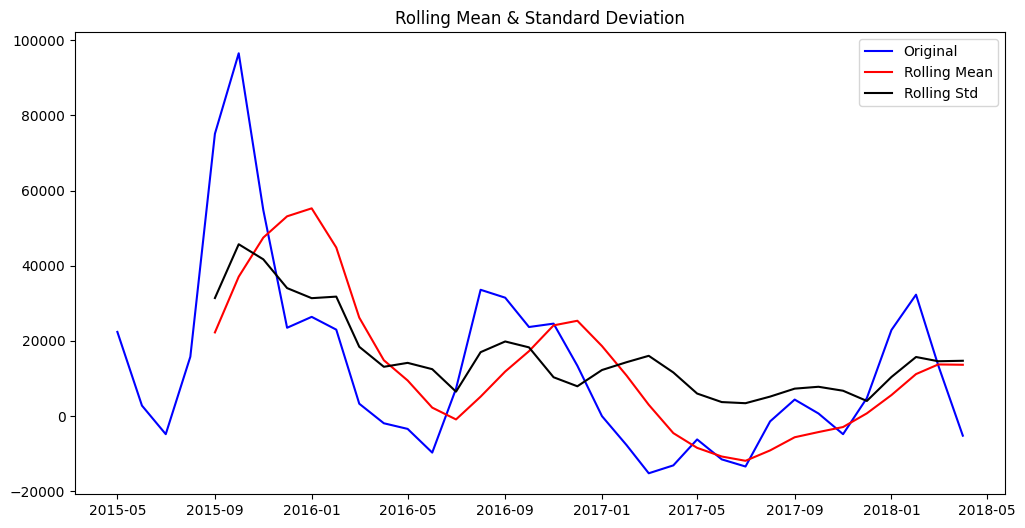

Results of Dickey-Fuller Test: 

Test Statistic                 -3.585082
p-value                         0.006053
#Lags Used                      5.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64



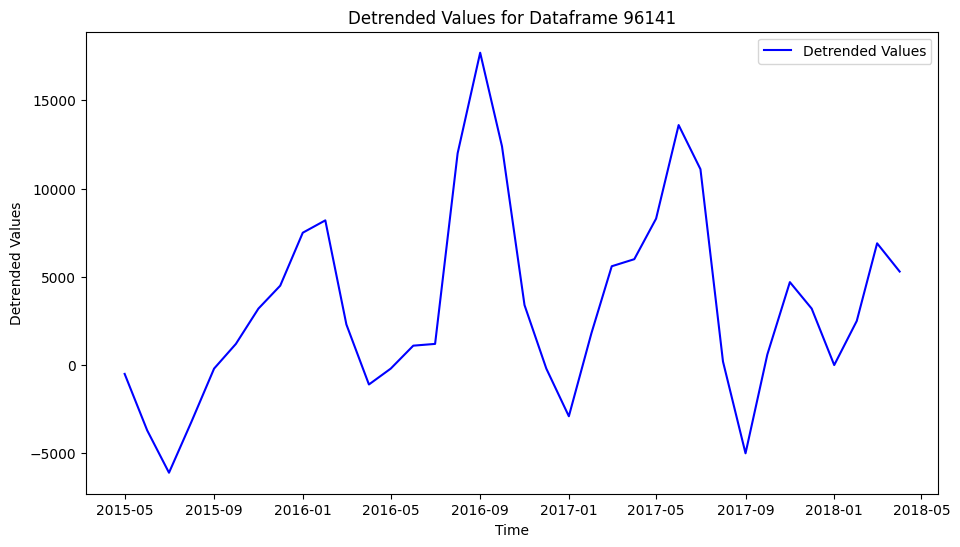

Stationarity Check for Dataframe 96141:


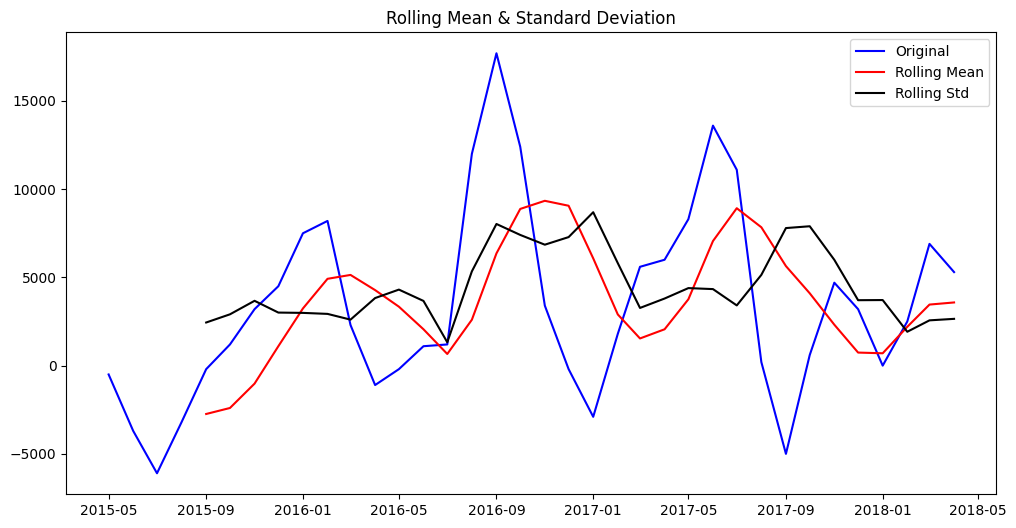

Results of Dickey-Fuller Test: 

Test Statistic                 -4.076053
p-value                         0.001061
#Lags Used                      3.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64



In [ ]:
import statsmodels.api as sm
# Detrending the specified dataframes
# List of dataframe names to detrend
dataframe_names = [10011, 10021, 31561, 81611, 34102, 11975, 81615, 89413, 96141]

# Loop over the dataframe names
for dataframe_name in dataframe_names:
    # Get the dataframe for the dataframe name
    dataframe = region_dataframes[dataframe_name]

    # Calculate the difference between each observation and its value 12 months ago
    data_diff = dataframe.diff(periods=1)

    # Drop the missing values
    data_diff.dropna(inplace=True)

    ## Plot the detrended data
    fig = plt.figure(figsize=(11, 6))
    plt.plot(data_diff, color='blue', label='Detrended Values')
    plt.title(f"Detrended Values for Dataframe {dataframe_name}")
    plt.xlabel('Time')
    plt.ylabel('Detrended Values')
    plt.legend()
    plt.show()

    # Perform the stationarity check
    print(f"Stationarity Check for Dataframe {dataframe_name}:")
    stationarity_check(data_diff)
    #adf_result = sm.tsa.stattools.adfuller(data_diff)
    #p_value = adf_result[1]
    #print('P_value:',p_value)
    print()


### Performing Detrending of our dataset and storing in a new dictionary

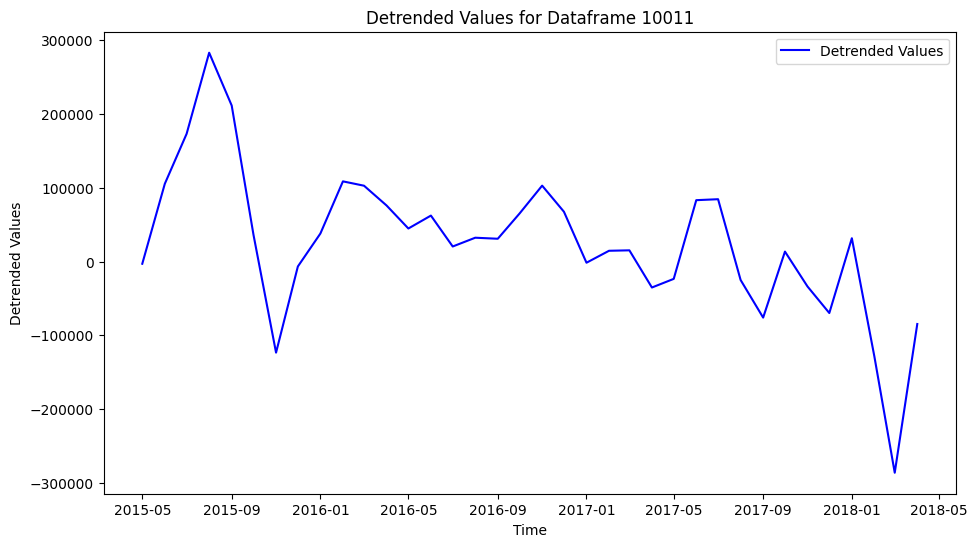

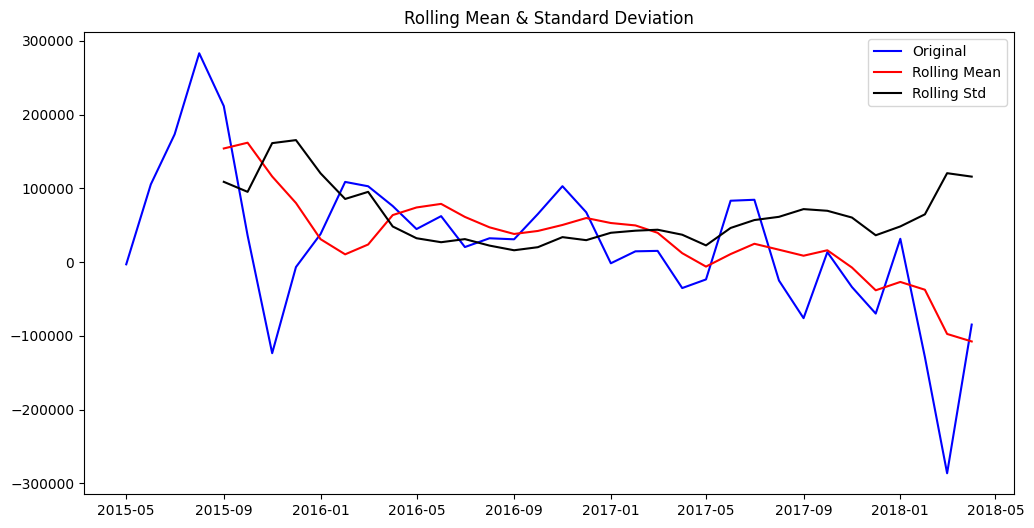

Results of Dickey-Fuller Test: 

Test Statistic                  2.625870
p-value                         0.999079
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


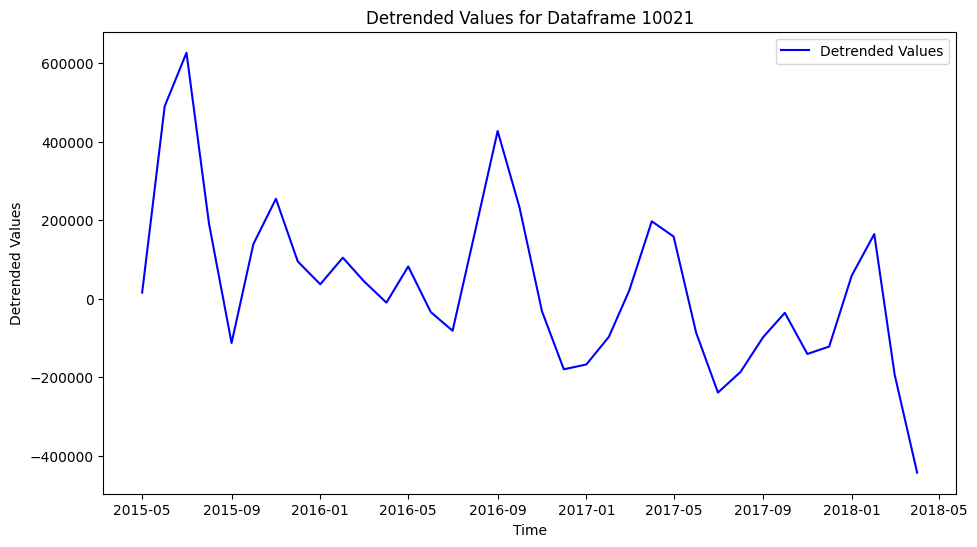

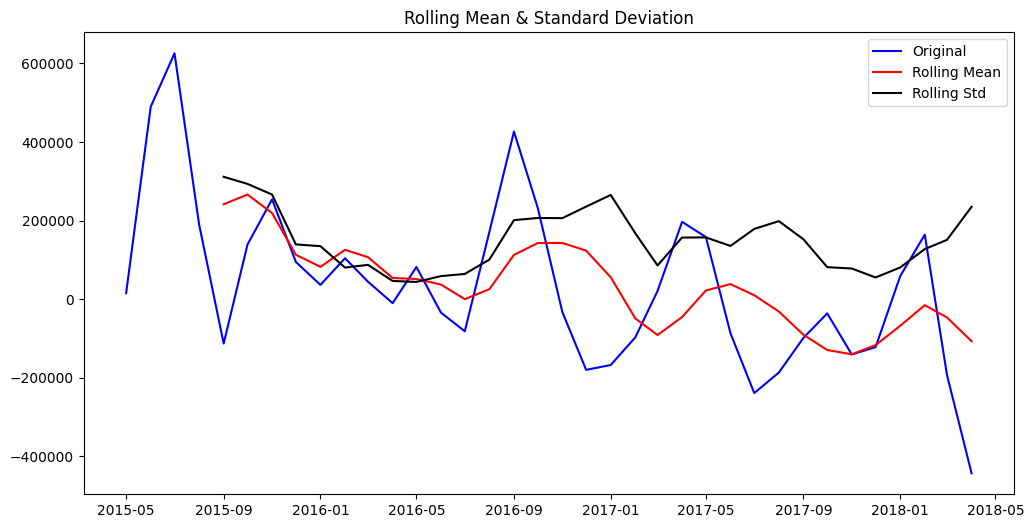

Results of Dickey-Fuller Test: 

Test Statistic                 -1.093233
p-value                         0.717763
#Lags Used                      7.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64


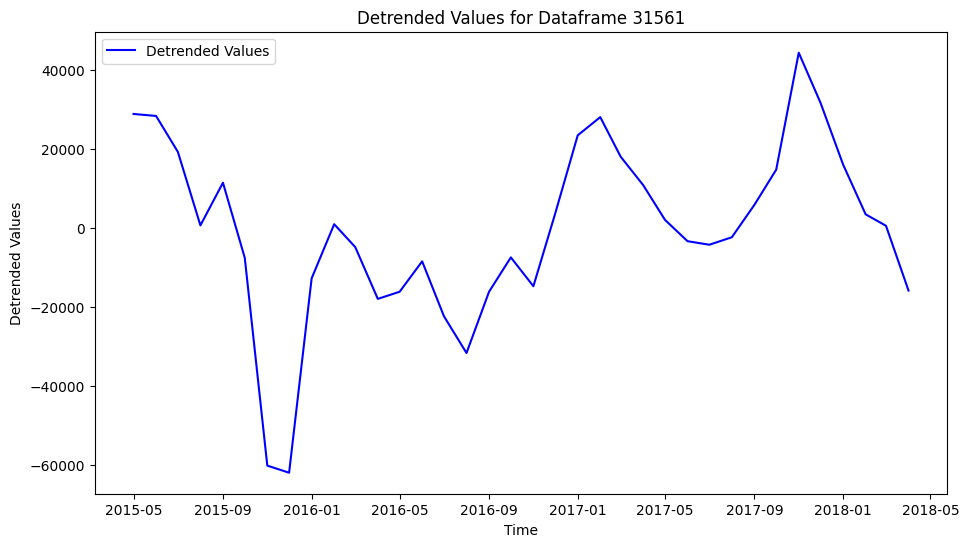

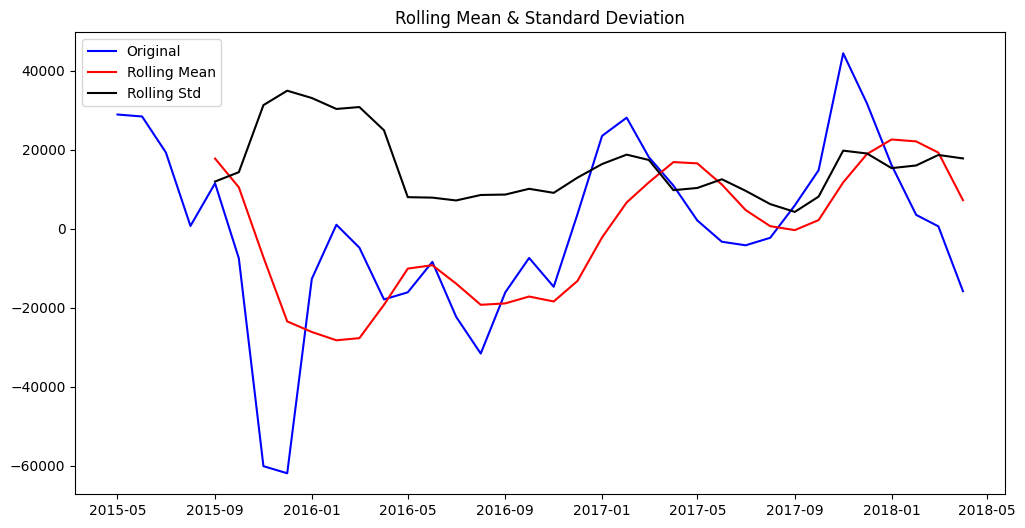

Results of Dickey-Fuller Test: 

Test Statistic                 -3.532639
p-value                         0.007187
#Lags Used                      1.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


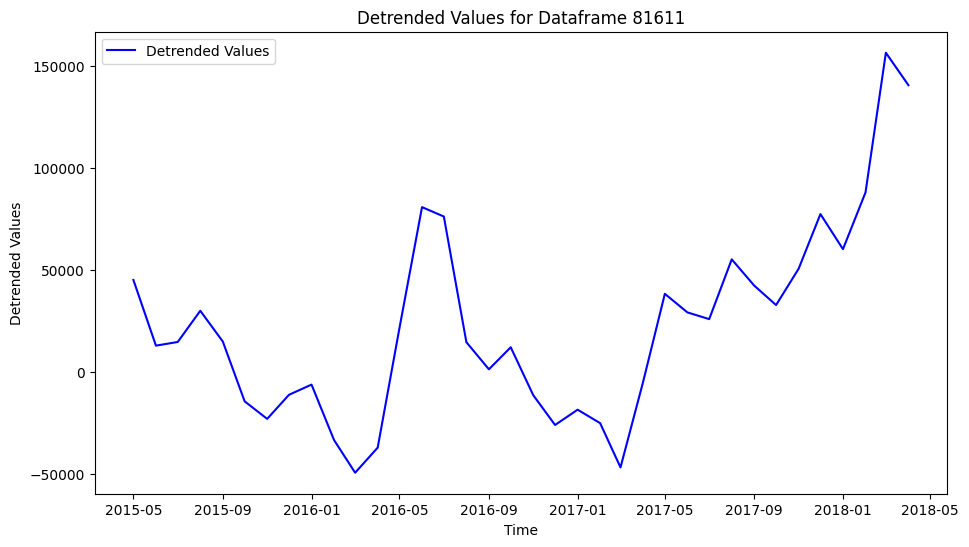

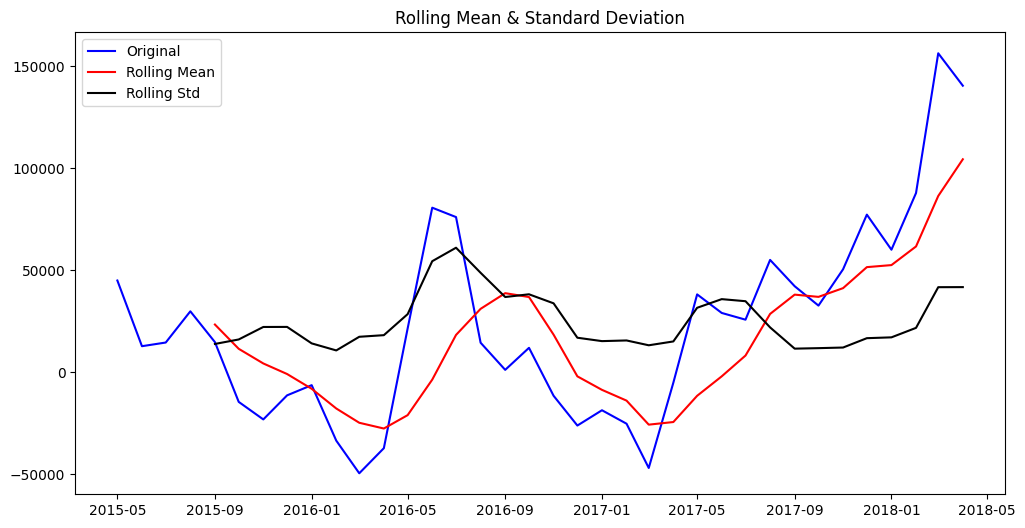

Results of Dickey-Fuller Test: 

Test Statistic                  0.235991
p-value                         0.974209
#Lags Used                      8.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


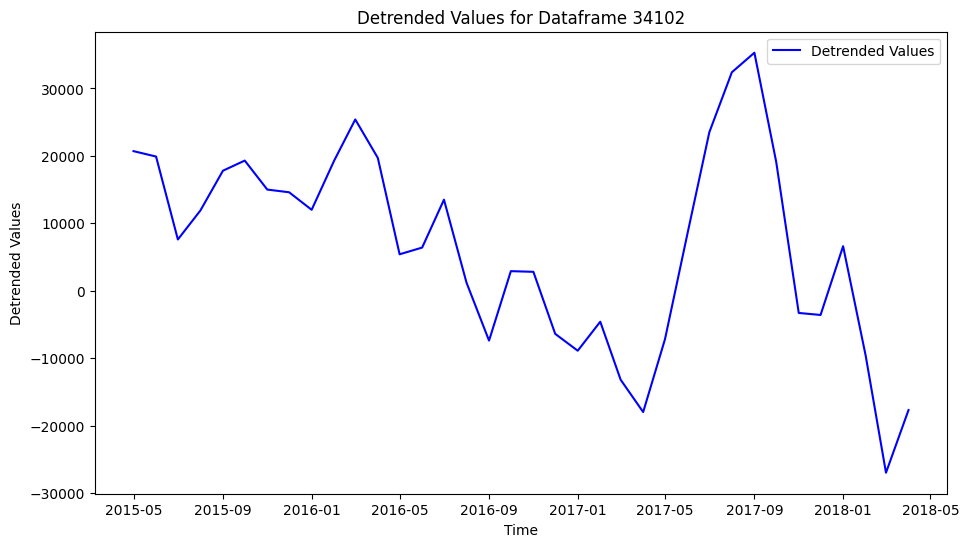

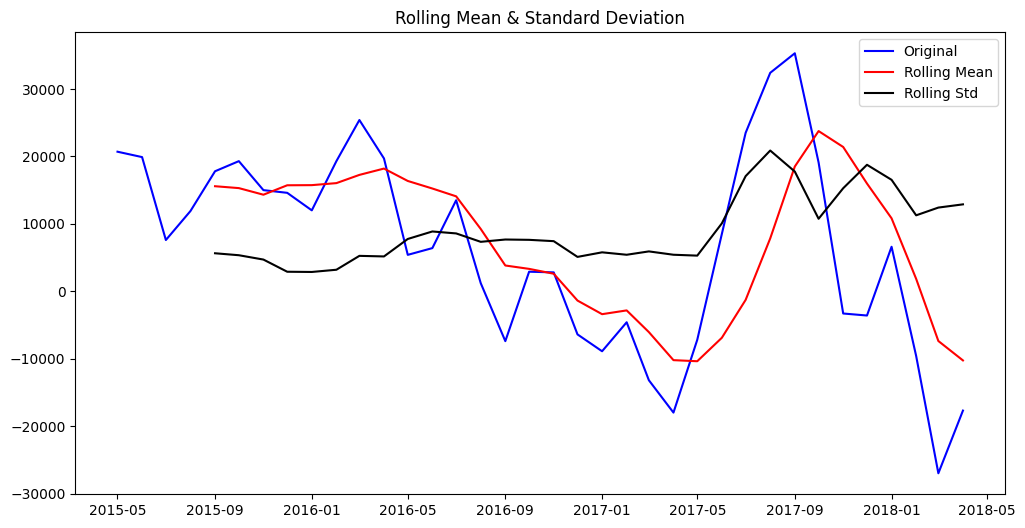

Results of Dickey-Fuller Test: 

Test Statistic                 -2.949263
p-value                         0.039912
#Lags Used                      3.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


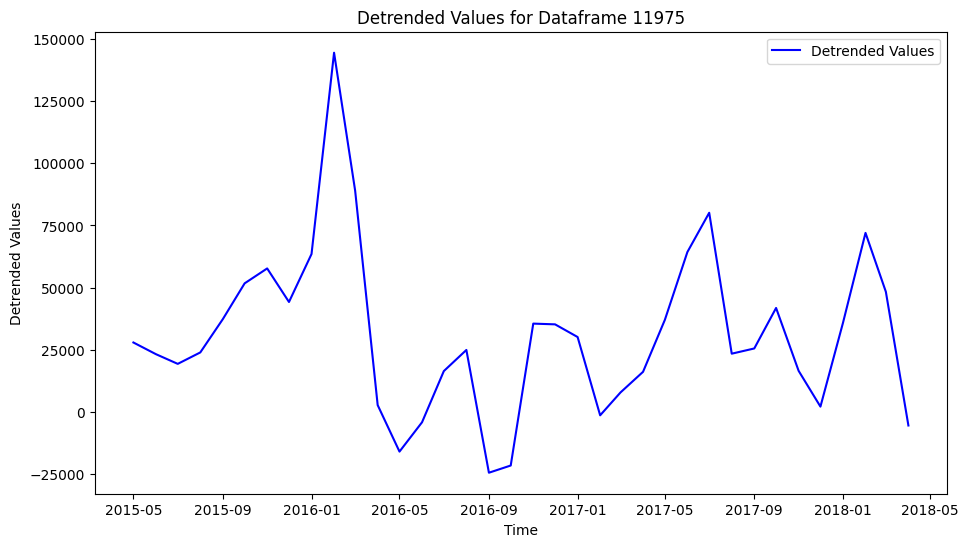

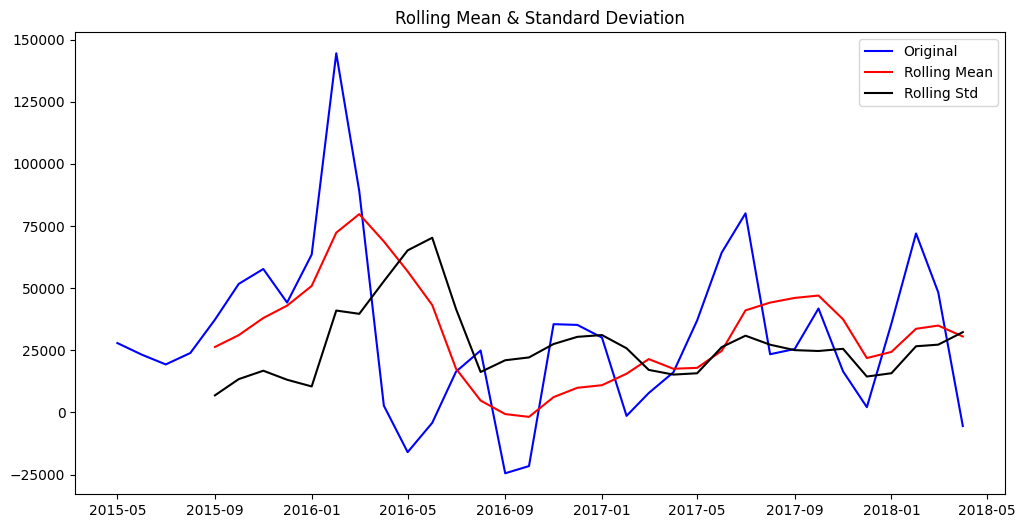

Results of Dickey-Fuller Test: 

Test Statistic                 -4.431406
p-value                         0.000261
#Lags Used                      1.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


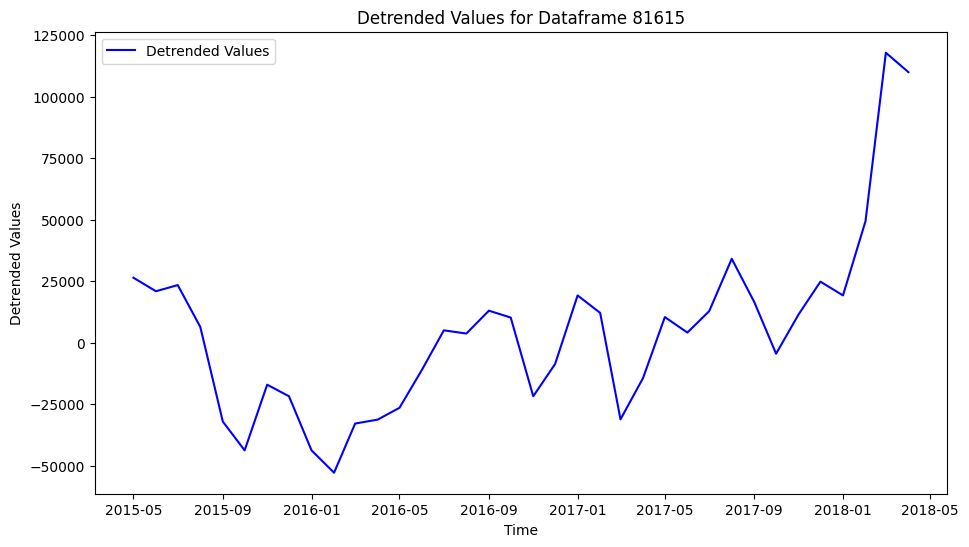

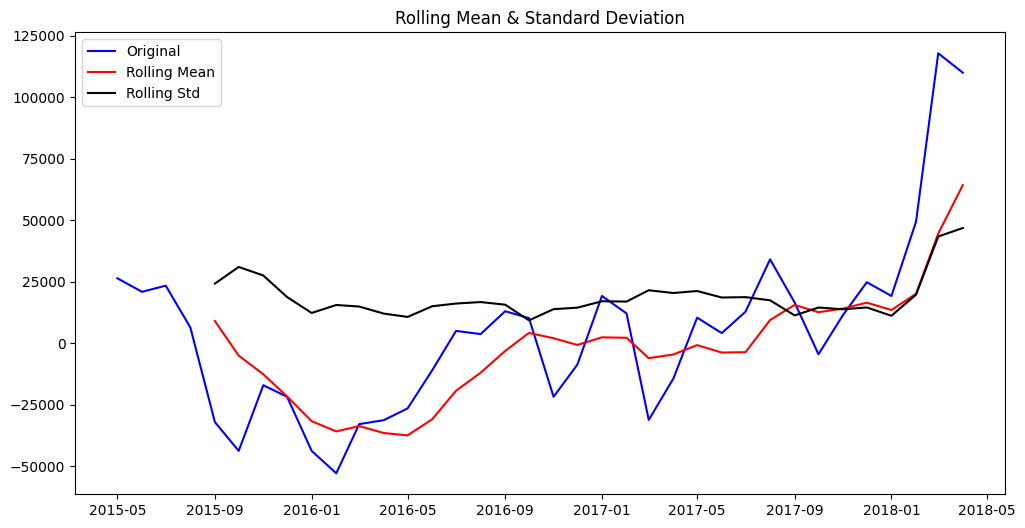

Results of Dickey-Fuller Test: 

Test Statistic                  0.605864
p-value                         0.987759
#Lags Used                      5.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


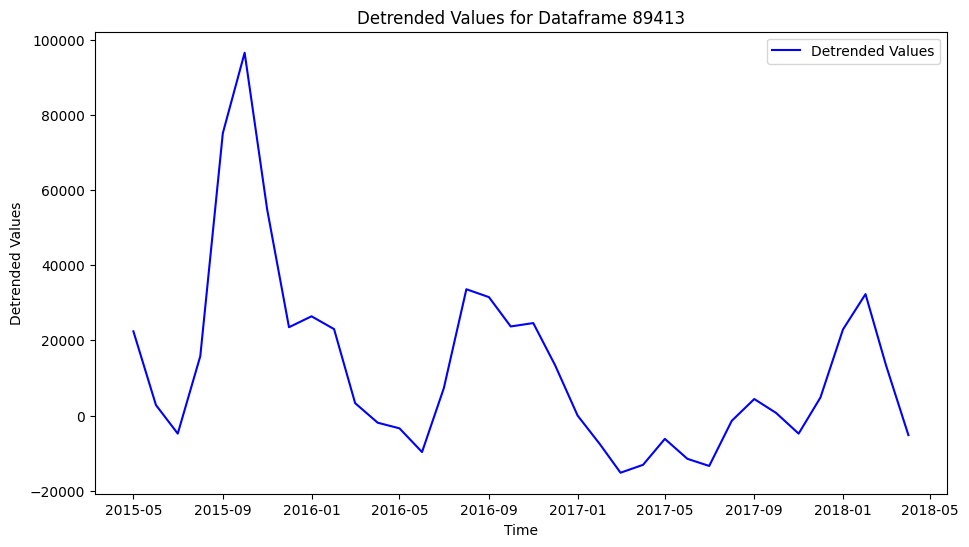

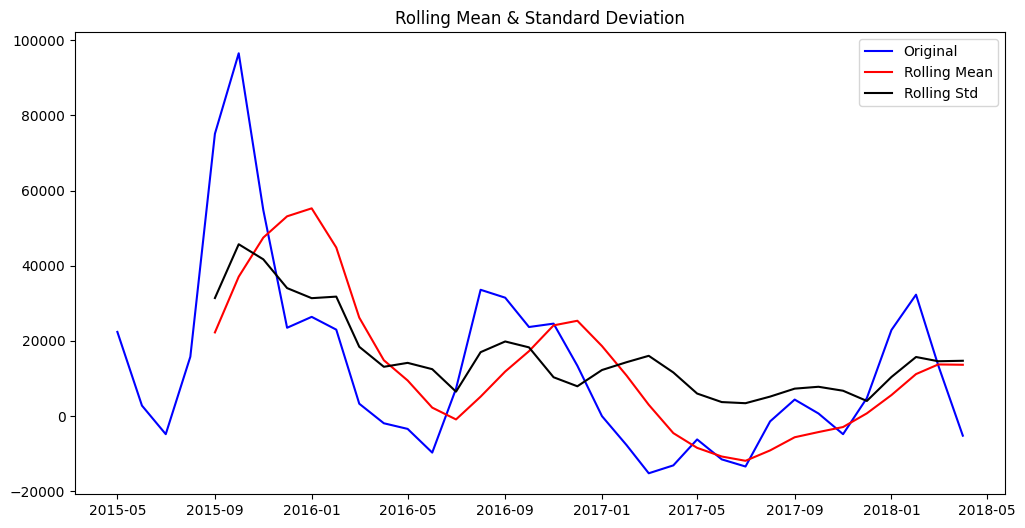

Results of Dickey-Fuller Test: 

Test Statistic                 -3.585082
p-value                         0.006053
#Lags Used                      5.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


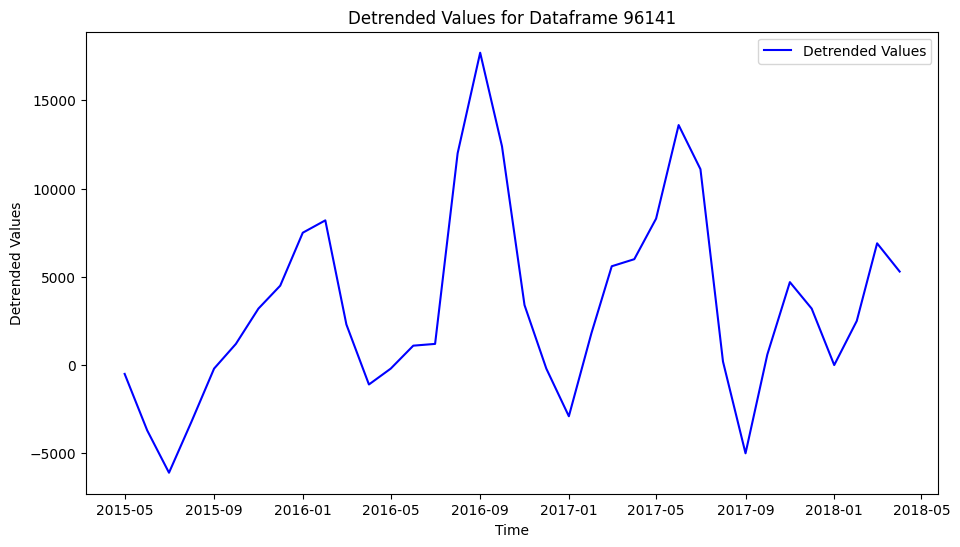

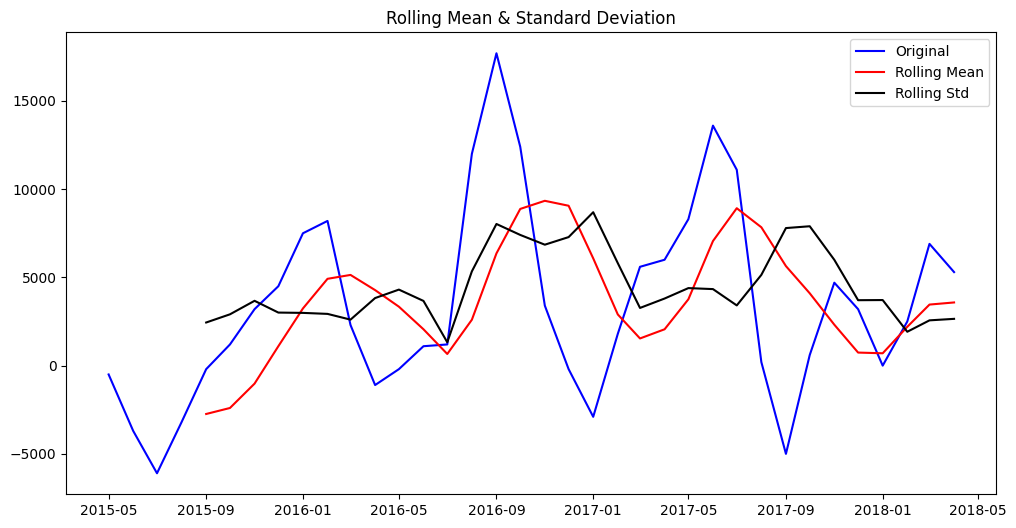

Results of Dickey-Fuller Test: 

Test Statistic                 -4.076053
p-value                         0.001061
#Lags Used                      3.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


In [ ]:

# Import adfuller
from statsmodels.tsa.stattools import adfuller

## Create a dictionary to store the detrended dataframes
detrended_dataframes = {}

dataframe_names = [10011, 10021, 31561, 81611, 34102, 11975, 81615, 89413, 96141]

# Loop over the dataframe names
for dataframe_name in dataframe_names:
    # Get the dataframe for the dataframe name
    dataframe = region_dataframes[dataframe_name]

    # Calculate the difference between each observation and its value 12 months ago
    data_diff = dataframe.diff(periods=1)

    # Drop the missing values
    data_diff.dropna(inplace=True)

    ## Plot the detrended data
    fig = plt.figure(figsize=(11, 6))
    plt.plot(data_diff, color='blue', label='Detrended Values')
    plt.title(f"Detrended Values for Dataframe {dataframe_name}")
    plt.xlabel('Time')
    plt.ylabel('Detrended Values')
    plt.legend()
    plt.show()

    # Perform the stationarity check
    def stationarity_check(TS):
        # Calculate rolling statistics
        roll_mean = TS.rolling(window=5, center=False).mean()
        roll_std = TS.rolling(window=5, center=False).std()

        # Perform the Dickey Fuller test
        dftest = adfuller(TS)

        # Plot rolling statistics:
        fig = plt.figure(figsize=(12, 6))
        orig = plt.plot(TS, color='blue', label='Original')
        mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
        std = plt.plot(roll_std, color='black', label='Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
        plt.show(block=False)

        # Print Dickey-Fuller test results
        print('Results of Dickey-Fuller Test: \n')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
        for key, value in dftest[4].items():
            dfoutput['Critical Value (%s)' % key] = value
        print(dfoutput)

        return None

    # Call the stationarity_check function
    stationarity_check(data_diff)

    # Store the detrended dataframe in the detrended_dataframes dictionary
    detrended_dataframes[dataframe_name] = data_diff

In [ ]:
#Displaying the detrended dataframe keys
detrended_dataframes.keys()

dict_keys([10011, 10021, 31561, 81611, 34102, 11975, 81615, 89413, 96141])

In [ ]:
# Iterating over the items in the detrended_dataframes dictionary
for dataframe_name, detrended_dataframe in detrended_dataframes.items():
    print(f"Dataframe Name: {dataframe_name}")
    print(detrended_dataframe.head())  # Print the head of the detrended dataframe
print()

Dataframe Name: 10011
               value
time                
2015-05-01   -3000.0
2015-06-01  105400.0
2015-07-01  173200.0
2015-08-01  283100.0
2015-09-01  211500.0
Dataframe Name: 10021
               value
time                
2015-05-01   15500.0
2015-06-01  489700.0
2015-07-01  626000.0
2015-08-01  190600.0
2015-09-01 -112700.0
Dataframe Name: 31561
              value
time               
2015-05-01  28900.0
2015-06-01  28400.0
2015-07-01  19300.0
2015-08-01    700.0
2015-09-01  11500.0
Dataframe Name: 81611
              value
time               
2015-05-01  45000.0
2015-06-01  12800.0
2015-07-01  14600.0
2015-08-01  29900.0
2015-09-01  14800.0
Dataframe Name: 34102
              value
time               
2015-05-01  20700.0
2015-06-01  19900.0
2015-07-01   7600.0
2015-08-01  11900.0
2015-09-01  17800.0
Dataframe Name: 11975
              value
time               
2015-05-01  27900.0
2015-06-01  23200.0
2015-07-01  19300.0
2015-08-01  23900.0
2015-09-01  37300.0
Dataframe Name

In [ ]:
# Accessing the separate dataframes for each region name
for region_name, region_df in region_dataframes.items():
    print(f"Dataframe name: {region_name}")
    print(region_df.head())
    print()

Dataframe name: 10011
                 value
time                  
2015-04-01  10572500.0
2015-05-01  10569500.0
2015-06-01  10674900.0
2015-07-01  10848100.0
2015-08-01  11131200.0

Dataframe name: 10014
                value
time                 
2015-04-01  9938600.0
2015-05-01  9827500.0
2015-06-01  9571200.0
2015-07-01  9278700.0
2015-08-01  9252000.0

Dataframe name: 10021
                 value
time                  
2015-04-01  16644000.0
2015-05-01  16659500.0
2015-06-01  17149200.0
2015-07-01  17775200.0
2015-08-01  17965800.0

Dataframe name: 11975
                value
time                 
2015-04-01  2343300.0
2015-05-01  2371200.0
2015-06-01  2394400.0
2015-07-01  2413700.0
2015-08-01  2437600.0

Dataframe name: 31561
                value
time                 
2015-04-01  2453900.0
2015-05-01  2482800.0
2015-06-01  2511200.0
2015-07-01  2530500.0
2015-08-01  2531200.0

Dataframe name: 34102
                value
time                 
2015-04-01  2481500.0
2015-05-01  2

### Performing Deseasonalizing of our dataset and storing in a new dictionary

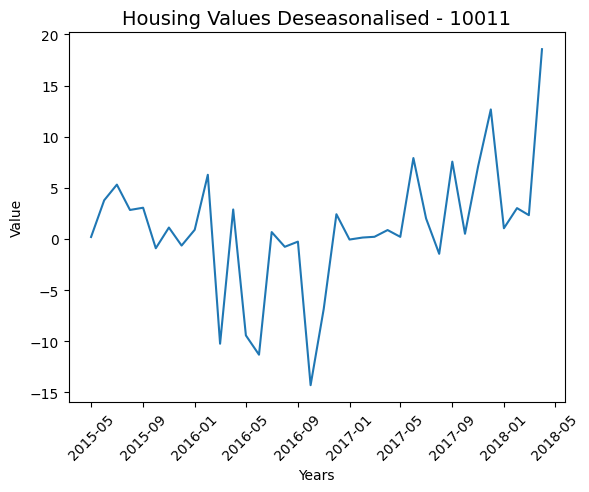

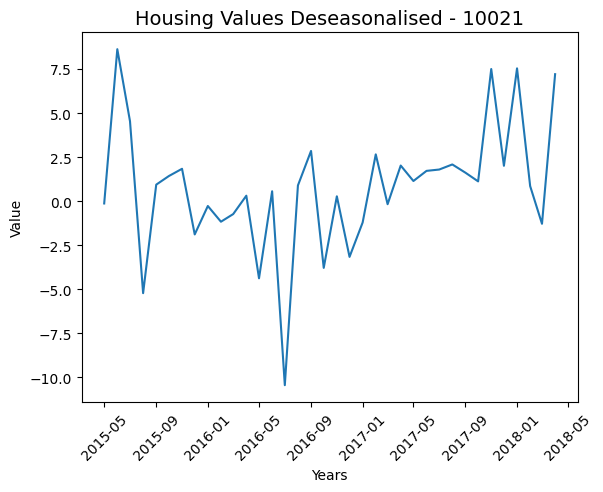

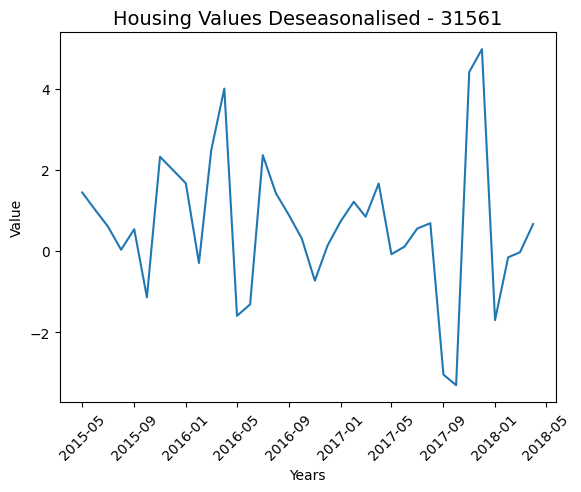

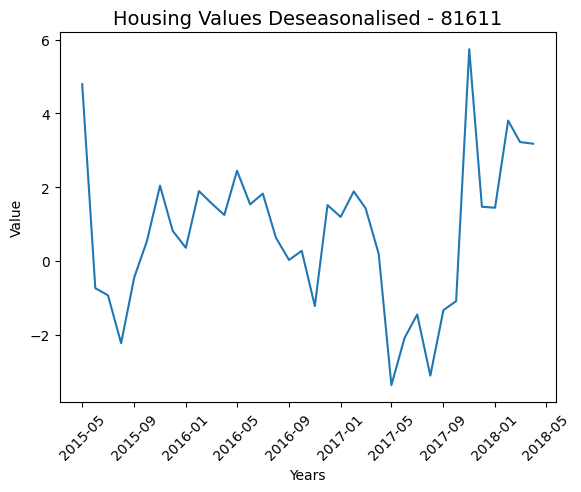

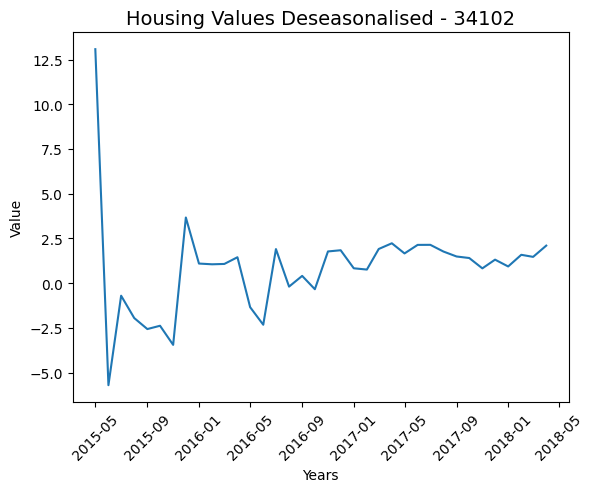

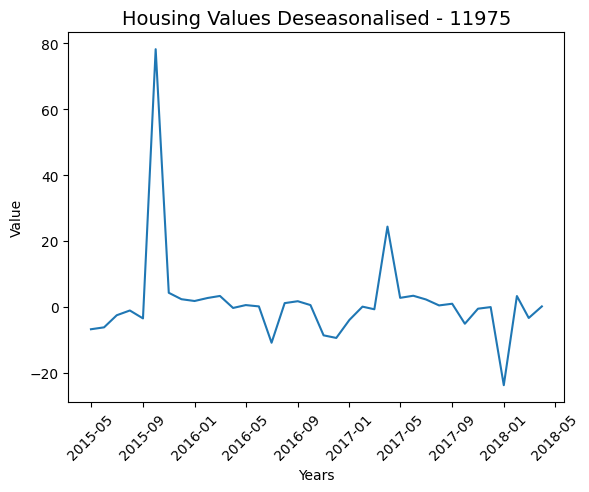

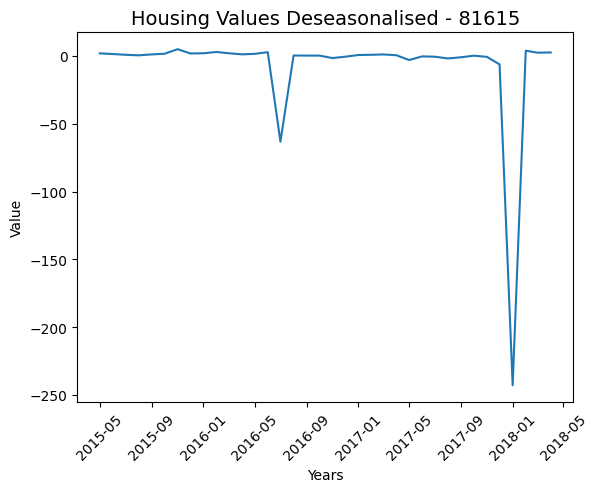

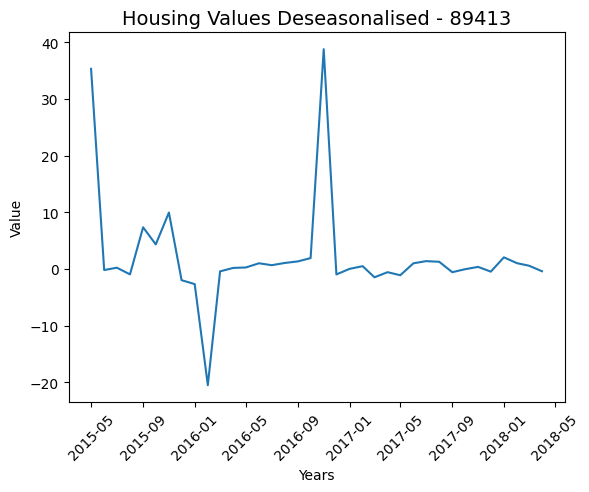

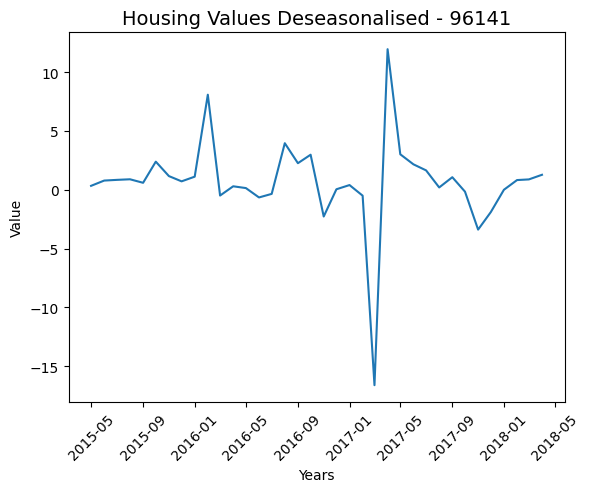

In [ ]:
#Deseasonalizing the dataset

deseasonalized_data = {}

# Iterate over each key (region) in the region_dataframes dictionary
for region_name, data_diff in detrended_dataframes.items():
    # Time Series Decomposition
    result_mul = seasonal_decompose(data_diff['value'], model='additive', extrapolate_trend='freq', period=int(len(data_diff) / 2))

    # Deseasonalize
    deseasonalized = data_diff['value'].values / result_mul.seasonal

    # Plot
    plt.figure()
    plt.plot(deseasonalized)
    plt.title(f'Housing Values Deseasonalised - {region_name}', fontsize=14)
    plt.xlabel('Years')
    plt.ylabel('Value')
    plt.xticks(rotation = 45)
    plt.show()

    # Store the deseasonalized values in the dictionary
    deseasonalized_data[region_name] = deseasonalized

In [ ]:
#Printing the deseasonalized data keys
deseasonalized_data.keys()

dict_keys([10011, 10021, 31561, 81611, 34102, 11975, 81615, 89413, 96141])

Performing Seasonal decomposition on the dictionary

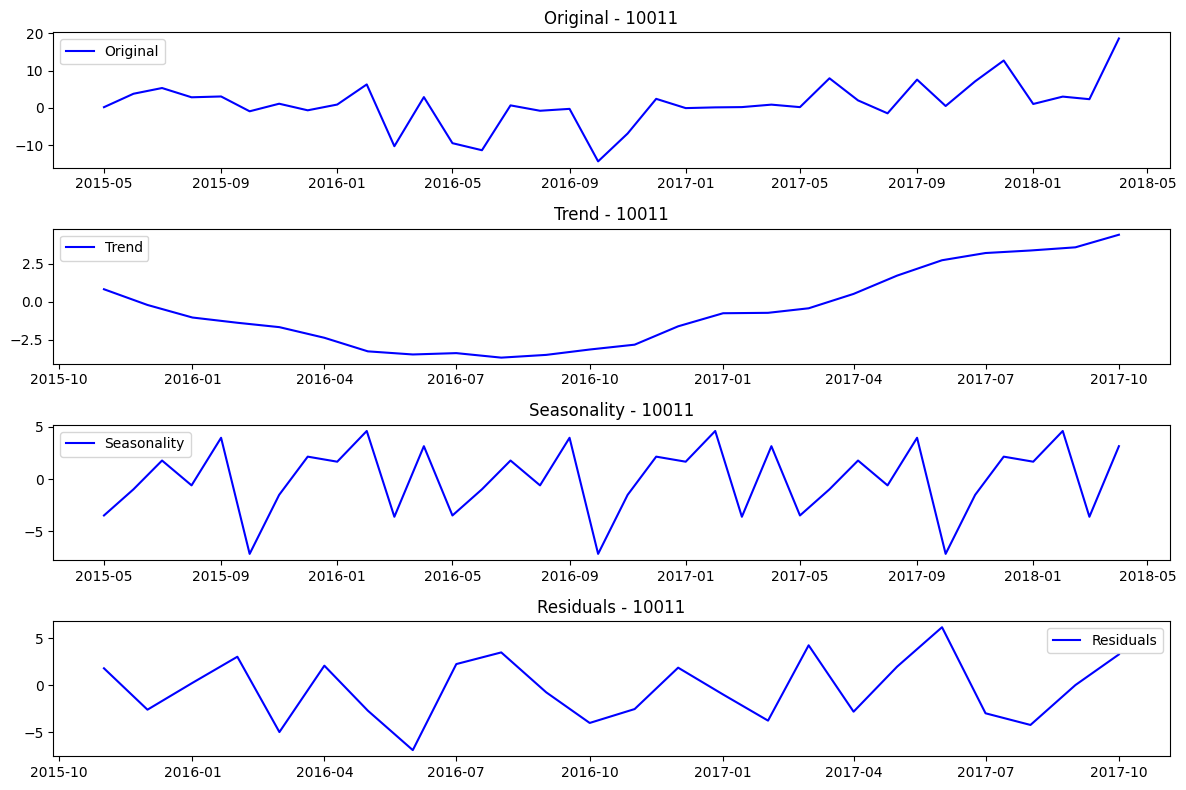

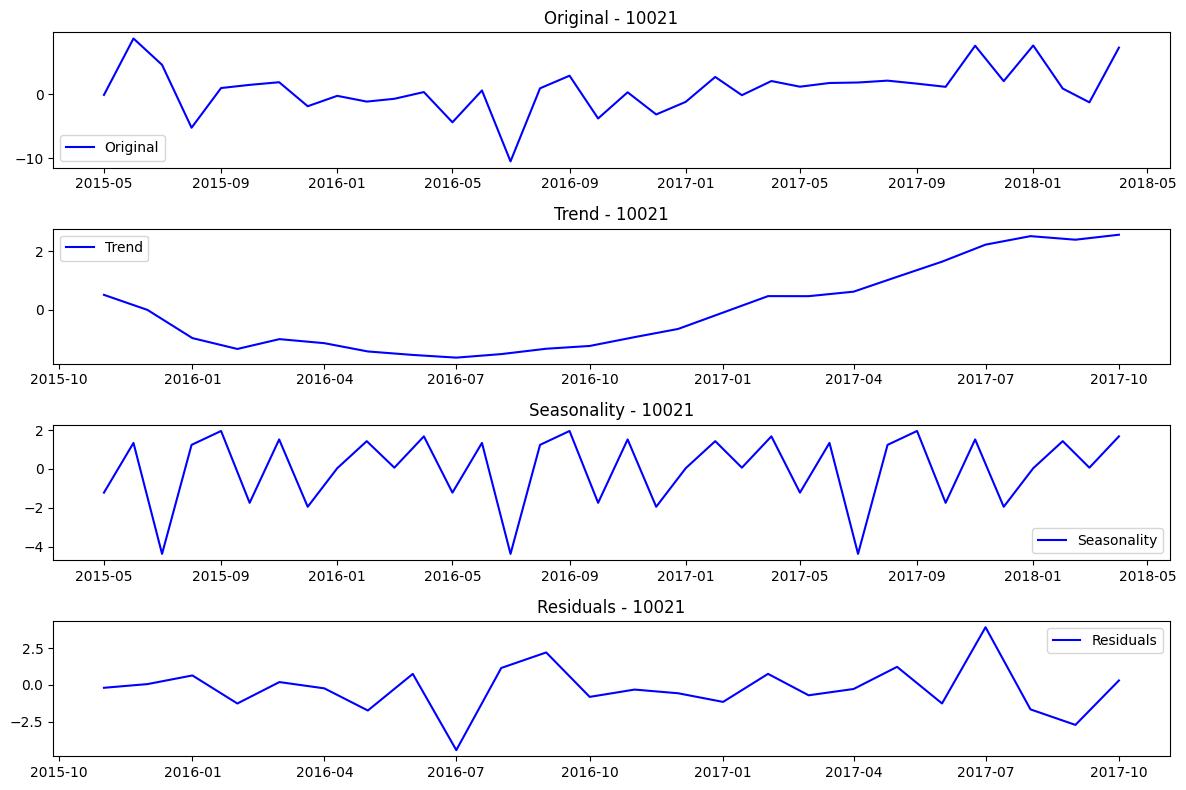

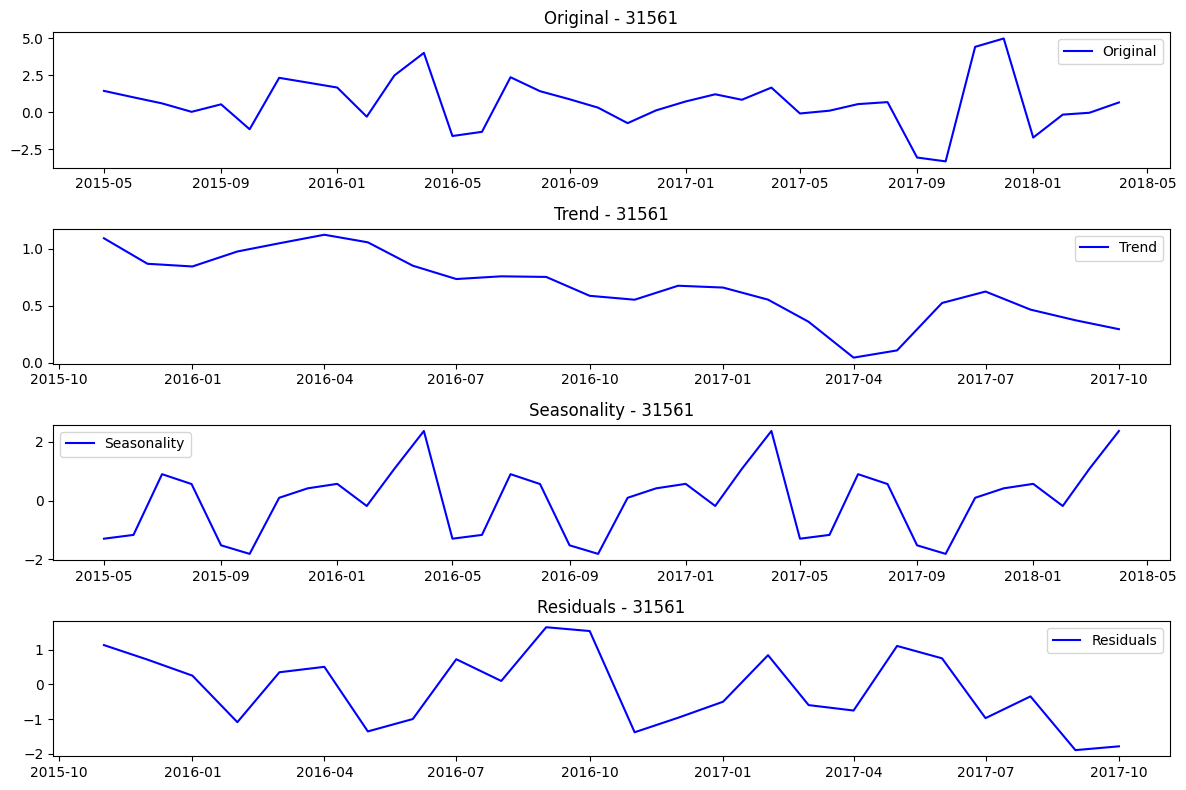

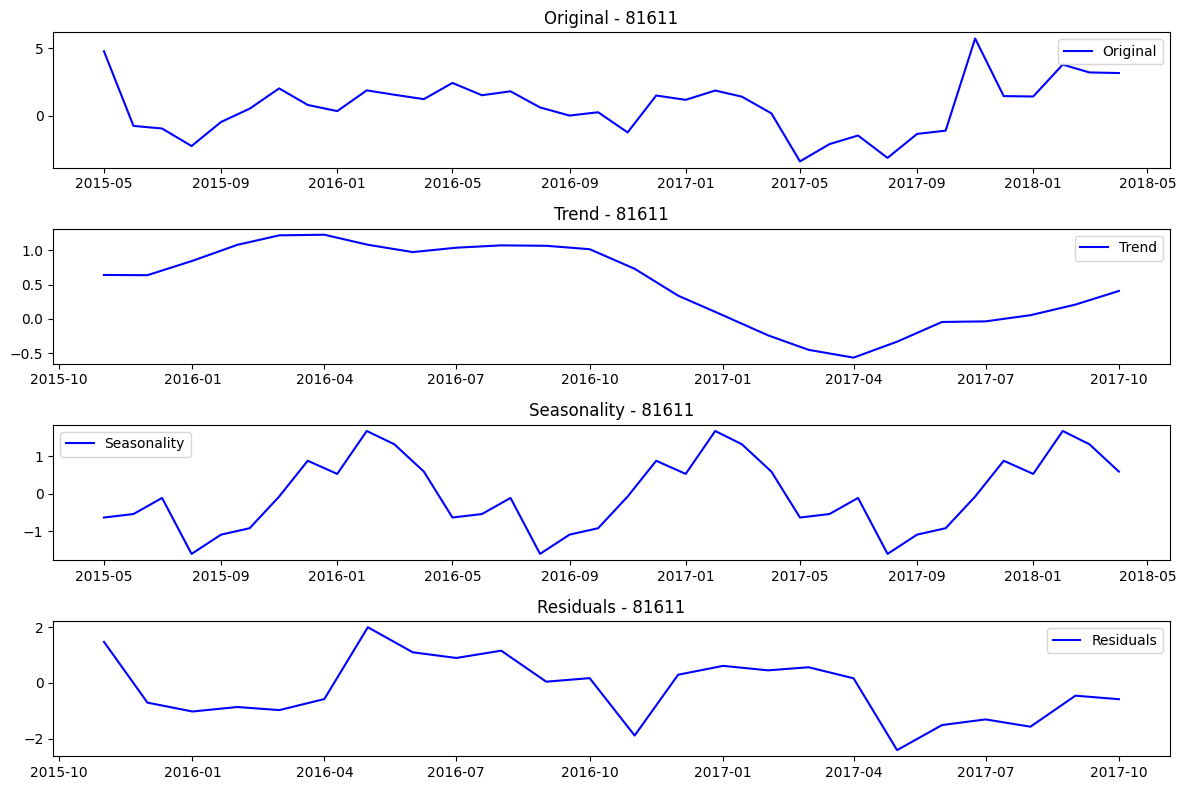

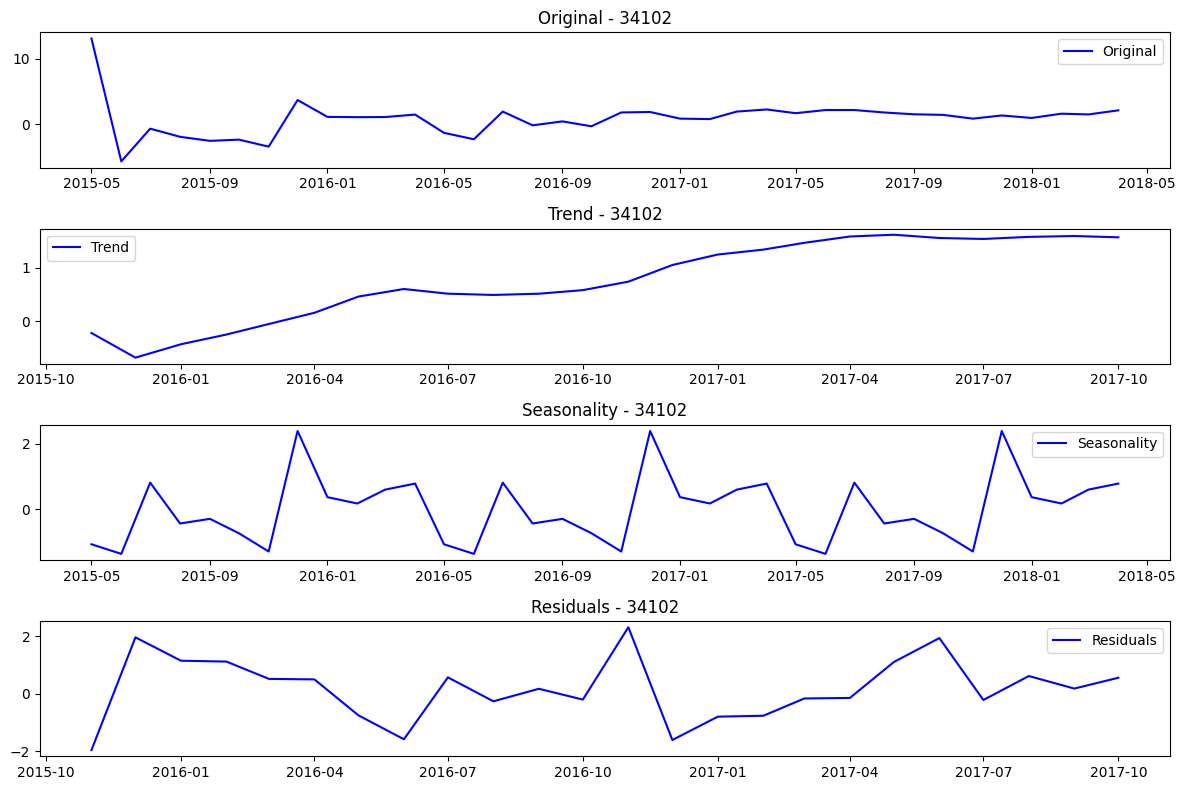

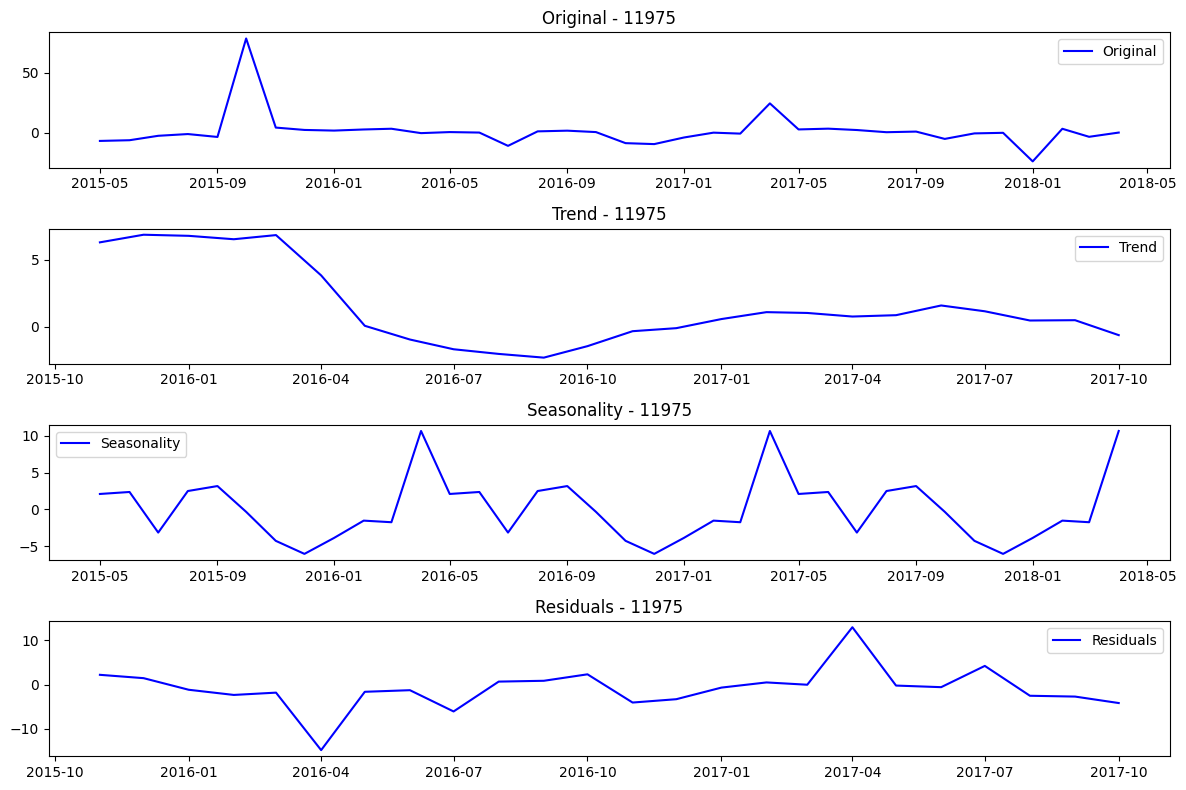

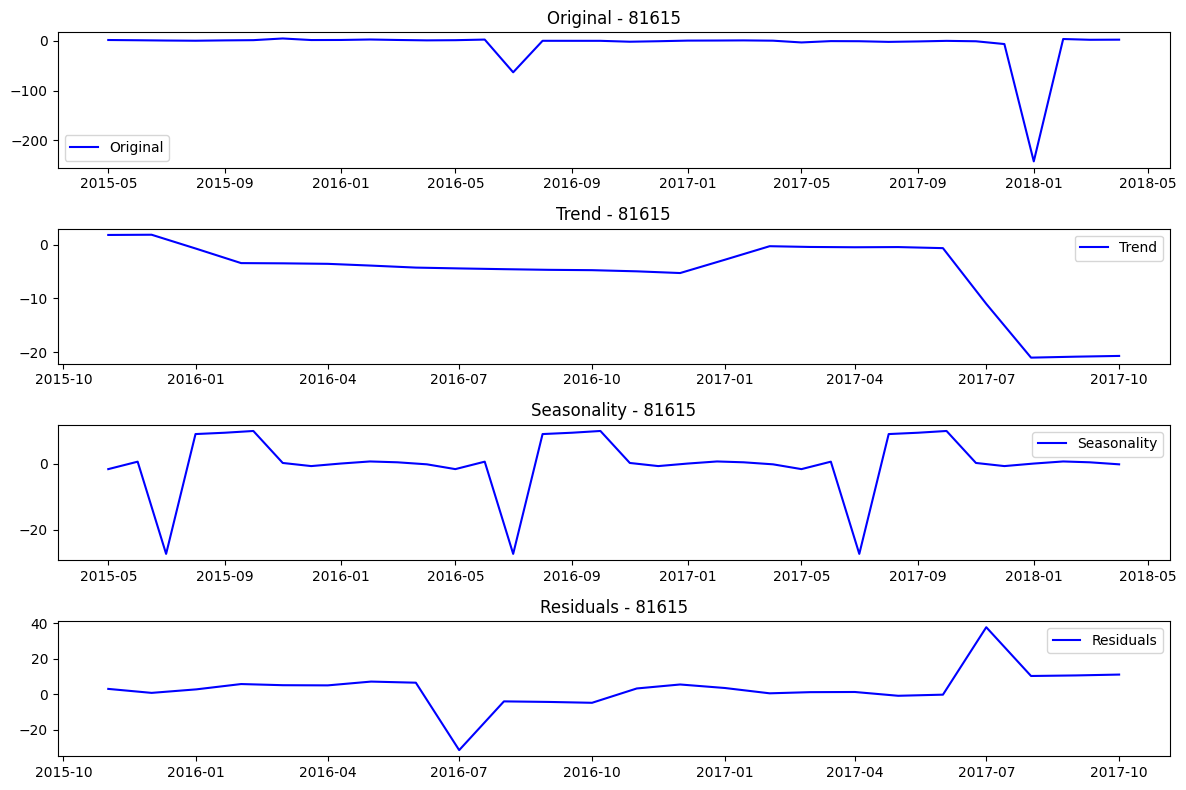

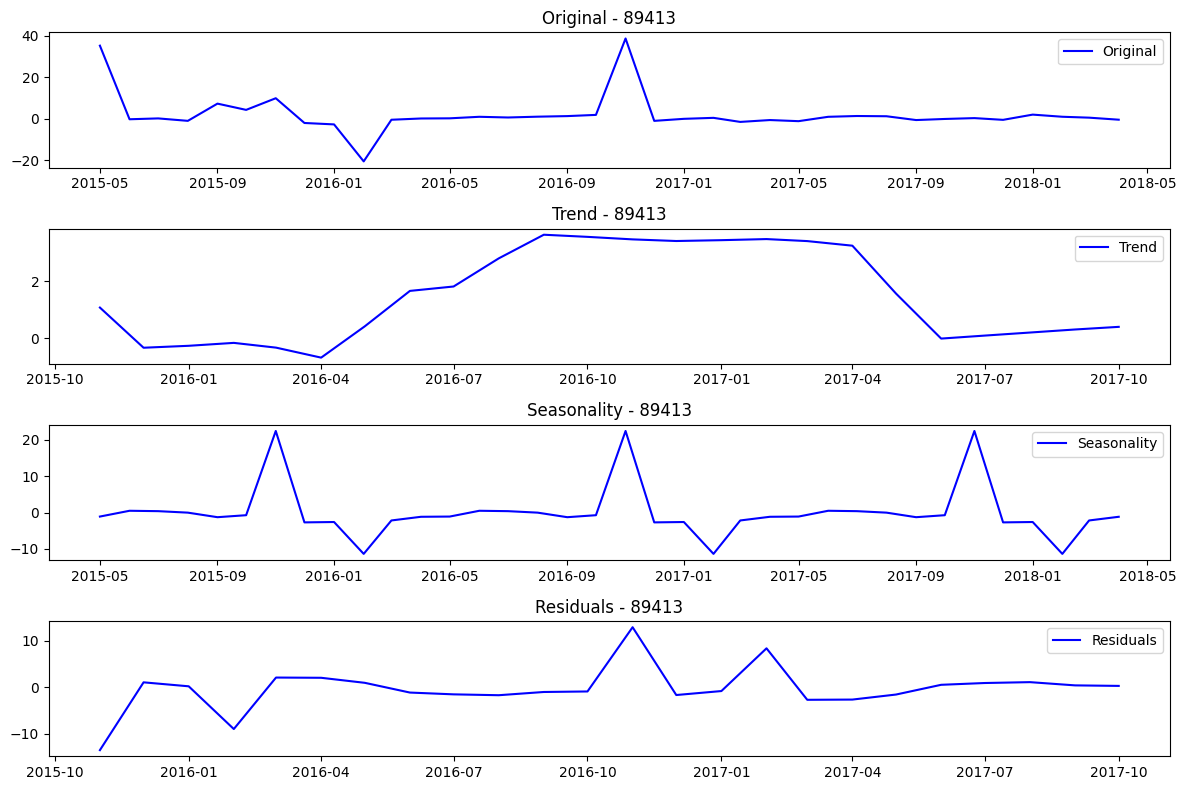

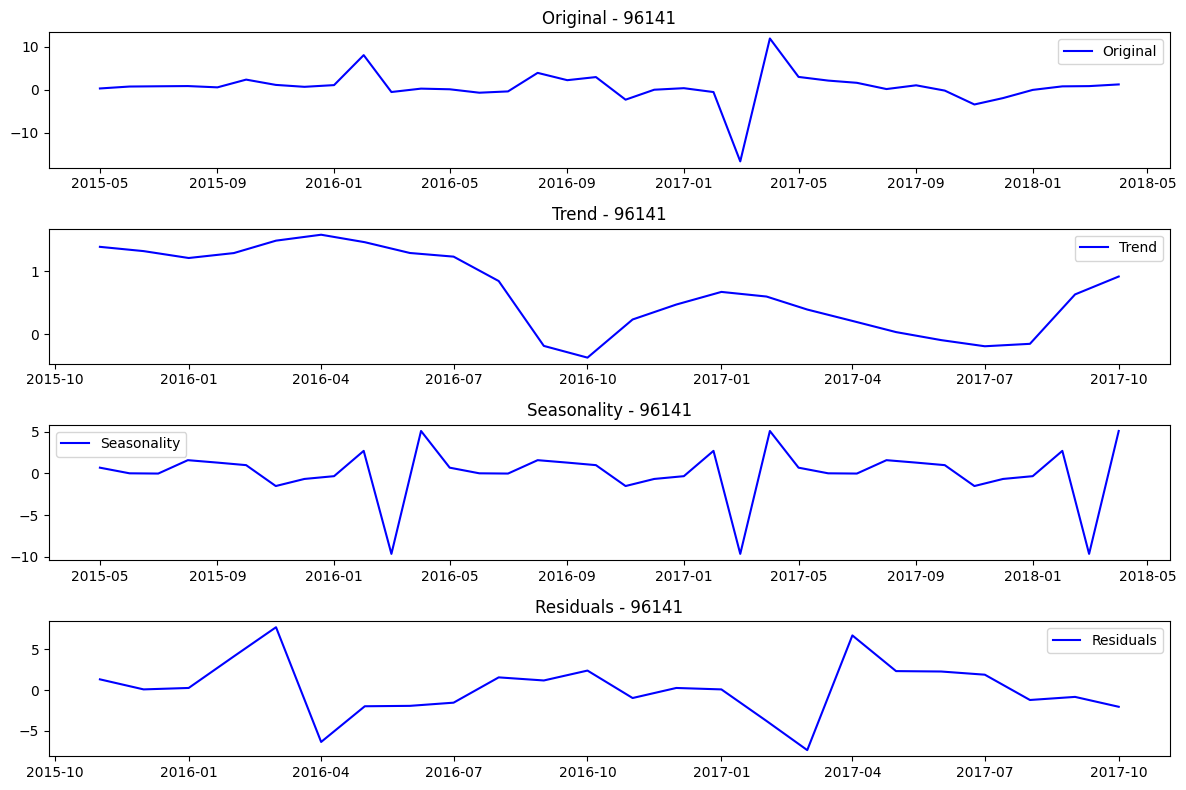

In [ ]:
# Iterate over each dataframe in the region_dataframes dictionary
for region_name, region_df in deseasonalized_data.items():
    # Perform seasonal decomposition
    decomposition = seasonal_decompose(region_df)

    # Gather the trend, seasonality, and residuals
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plot the gathered statistics
    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(region_df, label='Original', color='blue')
    plt.legend(loc='best')
    plt.title(f"Original - {region_name}")

    plt.subplot(412)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.title(f"Trend - {region_name}")

    plt.subplot(413)
    plt.plot(seasonal, label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.title(f"Seasonality - {region_name}")

    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.title(f"Residuals - {region_name}")

    plt.tight_layout()
    plt.show()



Checking for stationarity of residuals using Seasonal Decompose

Stationarity Check for 10011:


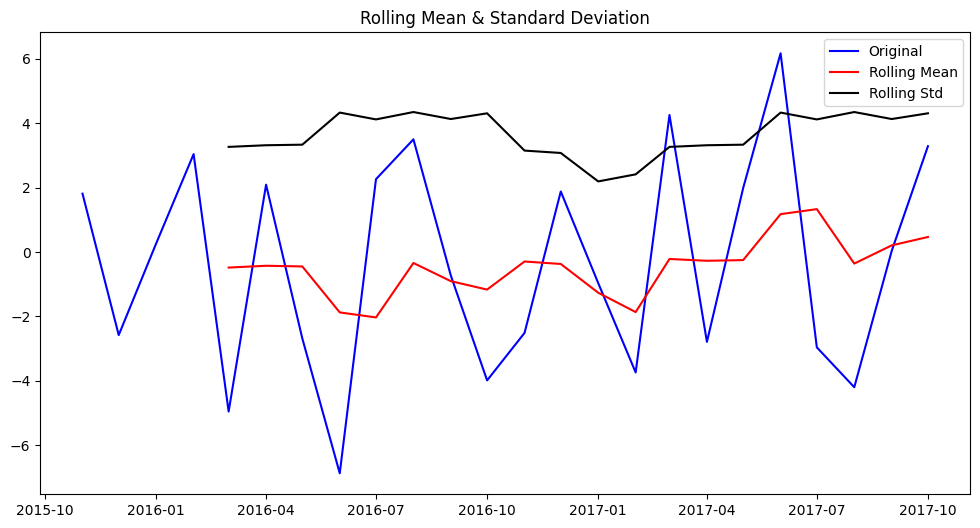

Results of Dickey-Fuller Test: 

Test Statistic                -5.694907e+00
p-value                        7.915019e-07
#Lags Used                     1.000000e+00
Number of Observations Used    2.200000e+01
Critical Value (1%)           -3.769733e+00
Critical Value (5%)           -3.005426e+00
Critical Value (10%)          -2.642501e+00
dtype: float64

Stationarity Check for 10021:


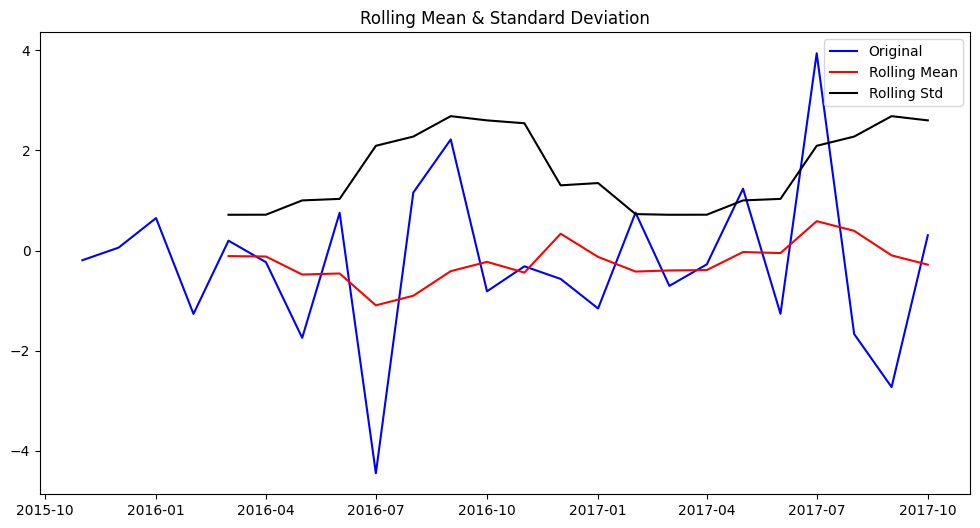

Results of Dickey-Fuller Test: 

Test Statistic                 -3.402018
p-value                         0.010890
#Lags Used                      3.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64

Stationarity Check for 31561:


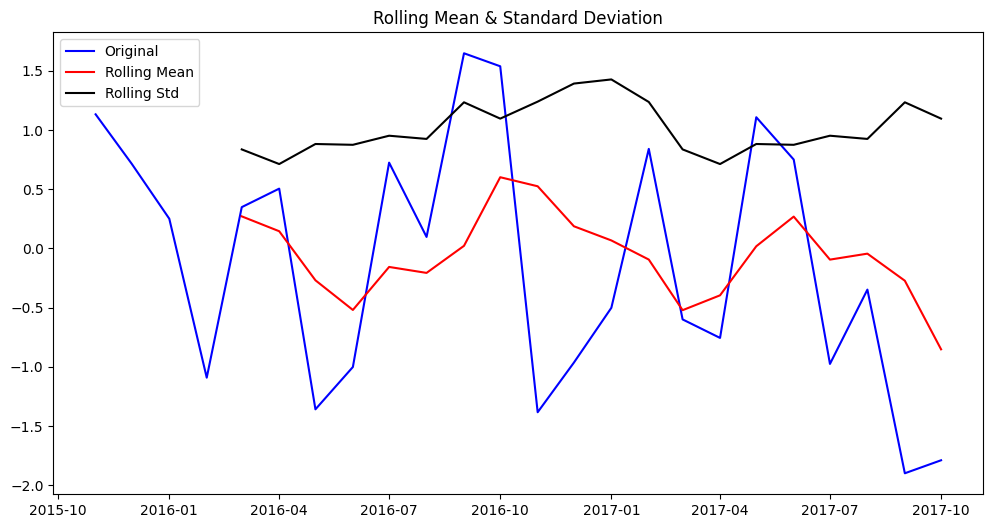

Results of Dickey-Fuller Test: 

Test Statistic                 -3.432282
p-value                         0.009906
#Lags Used                      0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64

Stationarity Check for 81611:


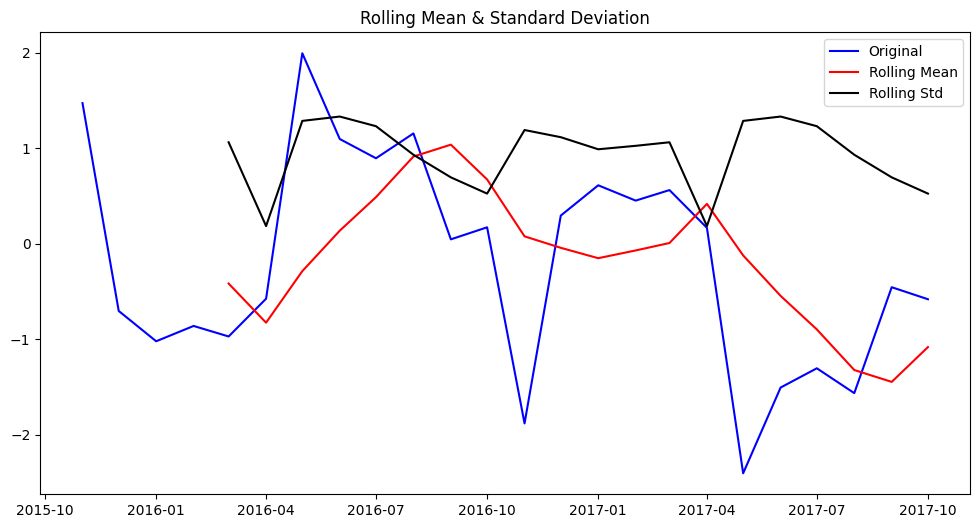

Results of Dickey-Fuller Test: 

Test Statistic                 -3.147614
p-value                         0.023224
#Lags Used                      0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64

Stationarity Check for 34102:


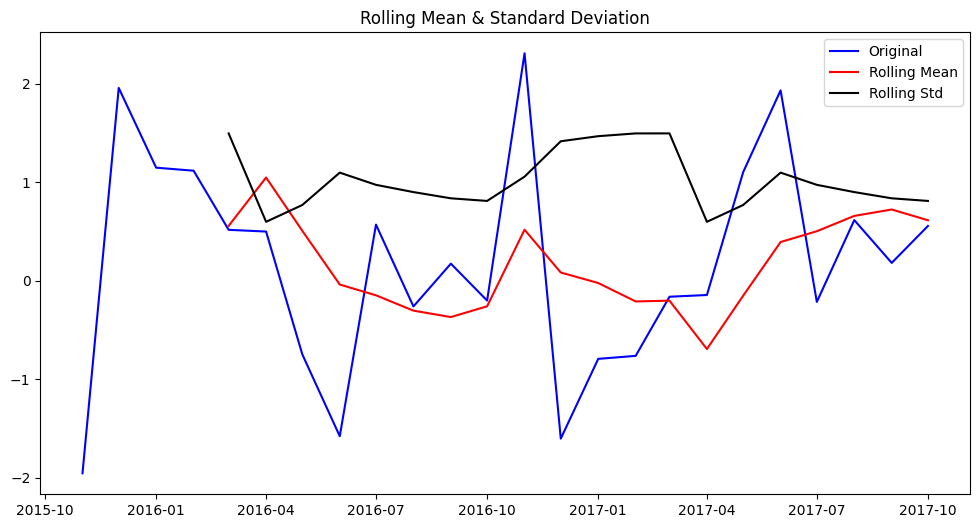

Results of Dickey-Fuller Test: 

Test Statistic                 -0.457580
p-value                         0.900032
#Lags Used                      6.000000
Number of Observations Used    17.000000
Critical Value (1%)            -3.889266
Critical Value (5%)            -3.054358
Critical Value (10%)           -2.666984
dtype: float64

Stationarity Check for 11975:


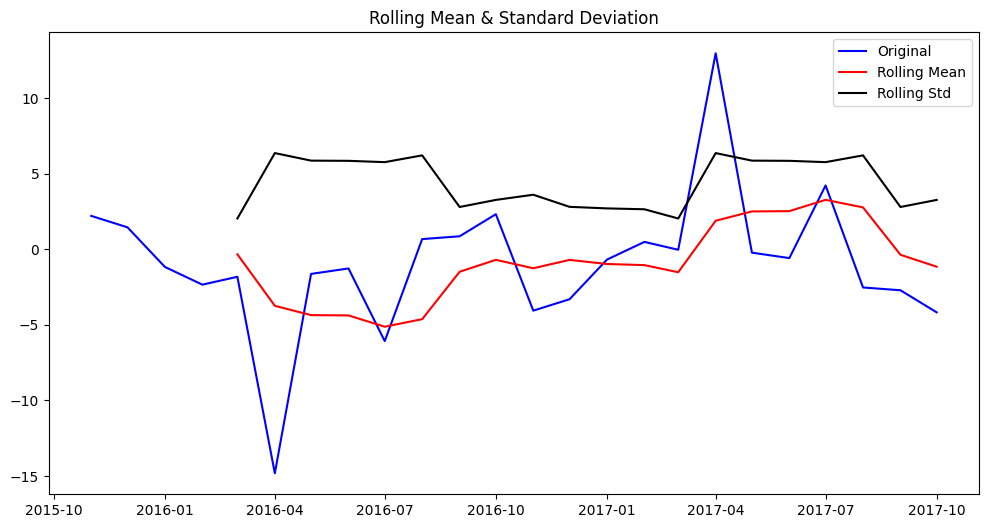

Results of Dickey-Fuller Test: 

Test Statistic                 -4.086851
p-value                         0.001018
#Lags Used                      0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64

Stationarity Check for 81615:


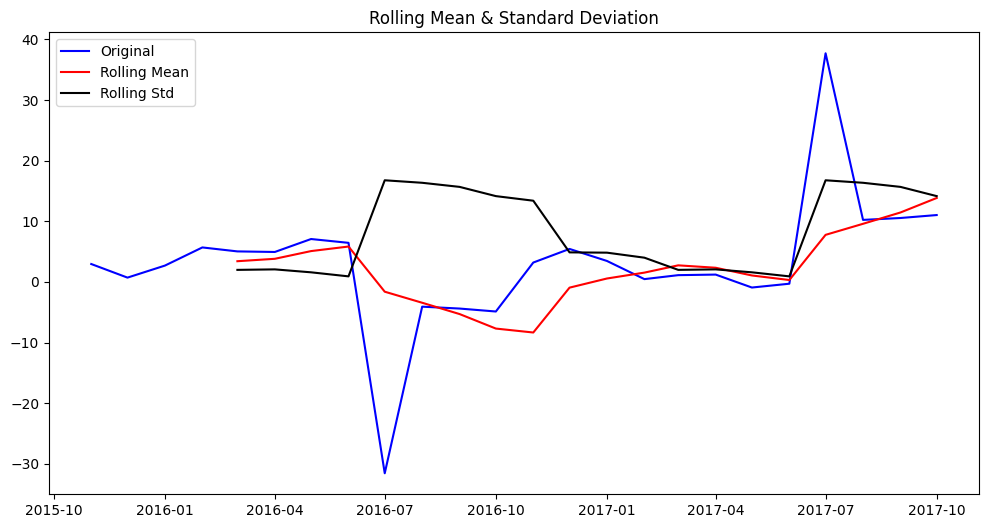

Results of Dickey-Fuller Test: 

Test Statistic                 -3.705696
p-value                         0.004034
#Lags Used                      0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64

Stationarity Check for 89413:


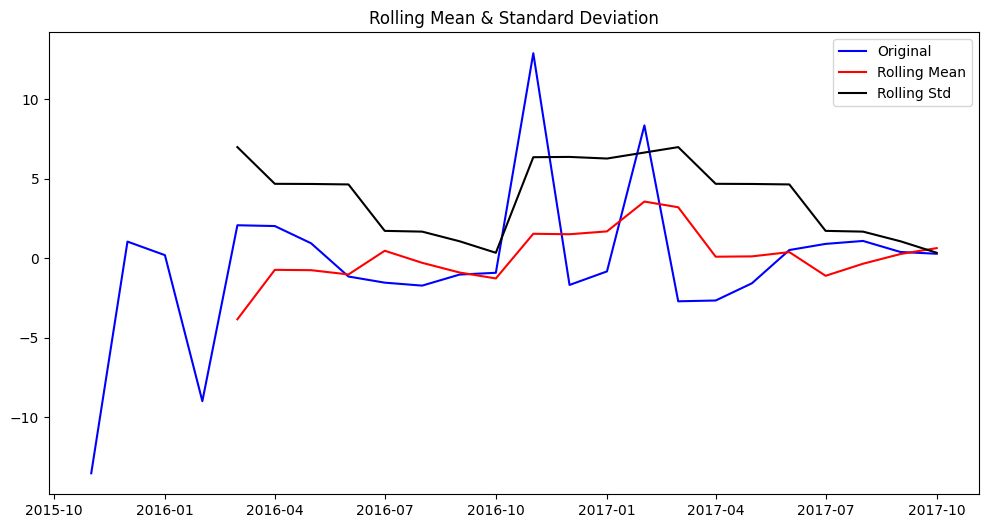

Results of Dickey-Fuller Test: 

Test Statistic                -6.432335e+00
p-value                        1.685343e-08
#Lags Used                     0.000000e+00
Number of Observations Used    2.300000e+01
Critical Value (1%)           -3.752928e+00
Critical Value (5%)           -2.998500e+00
Critical Value (10%)          -2.638967e+00
dtype: float64

Stationarity Check for 96141:


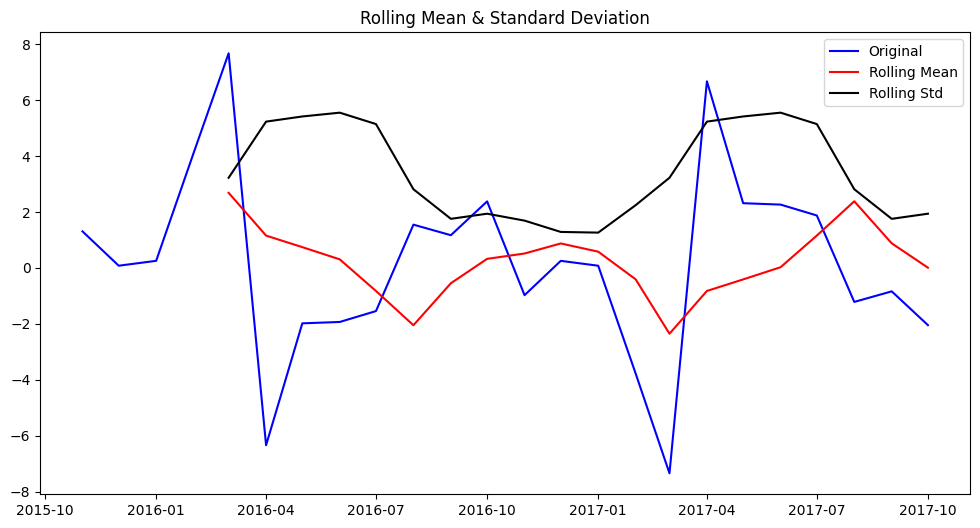

Results of Dickey-Fuller Test: 

Test Statistic                 -4.445586
p-value                         0.000246
#Lags Used                      0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64



In [ ]:
# Iterate over each dataframe in the region_dataframes dictionary
for region_name, region_df in deseasonalized_data.items():
    # Perform seasonal decomposition
    decomposition = seasonal_decompose(region_df)

    # Gather the residuals
    residual = decomposition.resid

    # Drop missing values from residuals
    ts_log_decompose = residual
    ts_log_decompose.dropna(inplace=True)

    # Perform the stationarity check
    print(f"Stationarity Check for {region_name}:")
    stationarity_check(ts_log_decompose)
    print()


In [ ]:
#Creating separate dictionaries for the individual zipnames
ts_10011 = deseasonalized_data[10011]
ts_10014 = region_dataframes[10014]
ts_10021 = deseasonalized_data[10021]
ts_81611 = deseasonalized_data[81611]
ts_31561 = deseasonalized_data[31561]
ts_34102 = deseasonalized_data[34102]
ts_81611 = deseasonalized_data[81611]
ts_81615 = deseasonalized_data[81615]
ts_89413 = deseasonalized_data[89413]
ts_96141 = deseasonalized_data[96141]

PLotting for the seasonal decomposition of the stationary Region Name 10014

Stationarity Check for ts_10014:


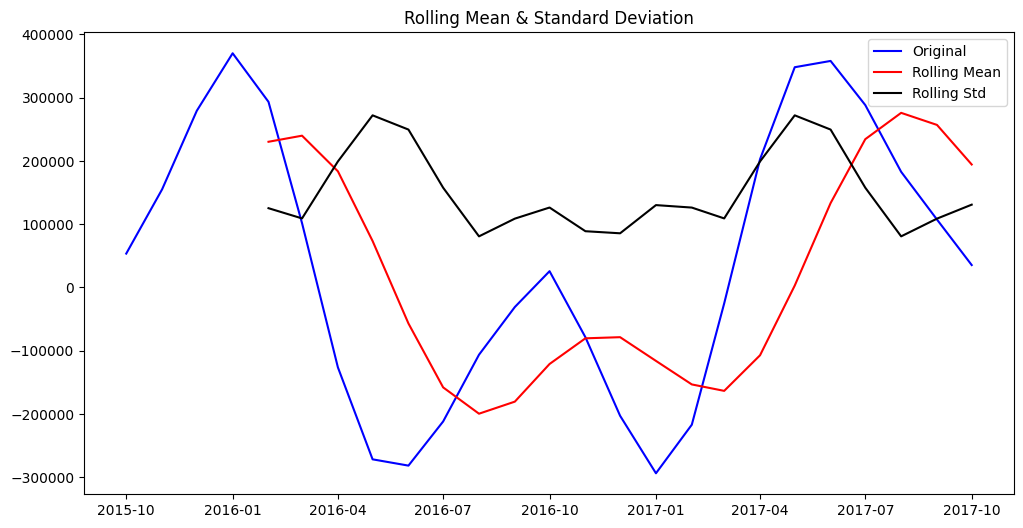

Results of Dickey-Fuller Test: 

Test Statistic                 -4.253111
p-value                         0.000535
#Lags Used                      9.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64



In [ ]:
    # Perform seasonal decomposition
    decomposition = seasonal_decompose(ts_10014)

    # Gather the residuals
    residual = decomposition.resid

    # Drop missing values from residuals
    ts_log_decompose = residual
    ts_log_decompose.dropna(inplace=True)

    # Perform the stationarity check
    print(f"Stationarity Check for ts_10014:")
    stationarity_check(ts_log_decompose)
    print()

## **5). Modelling**

Performing ACF and PACF

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

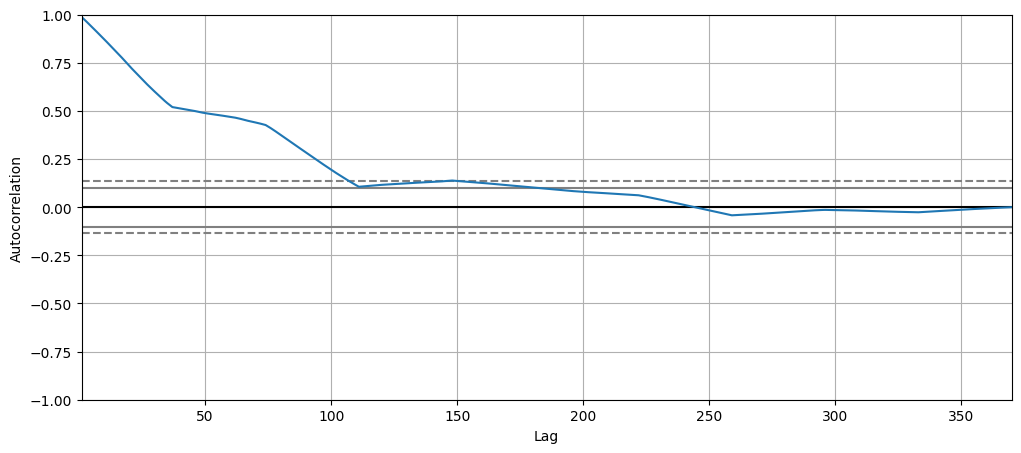

In [ ]:
#Plotting the autocorrelation plot
plt.figure(figsize =(12,5))
pd.plotting.autocorrelation_plot(new_df)

Plotting the Autocorrelation Function Plots

<Figure size 1400x500 with 0 Axes>

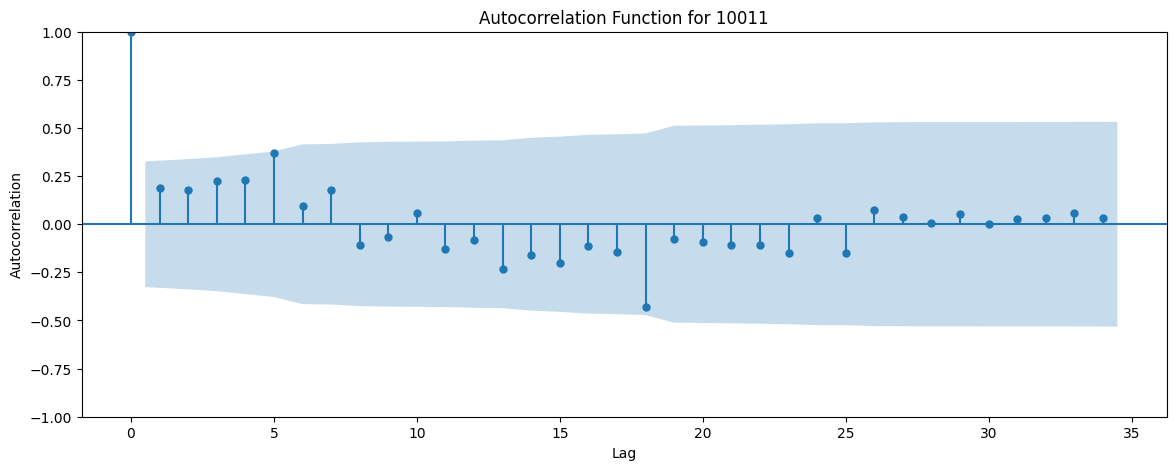

<Figure size 1400x500 with 0 Axes>

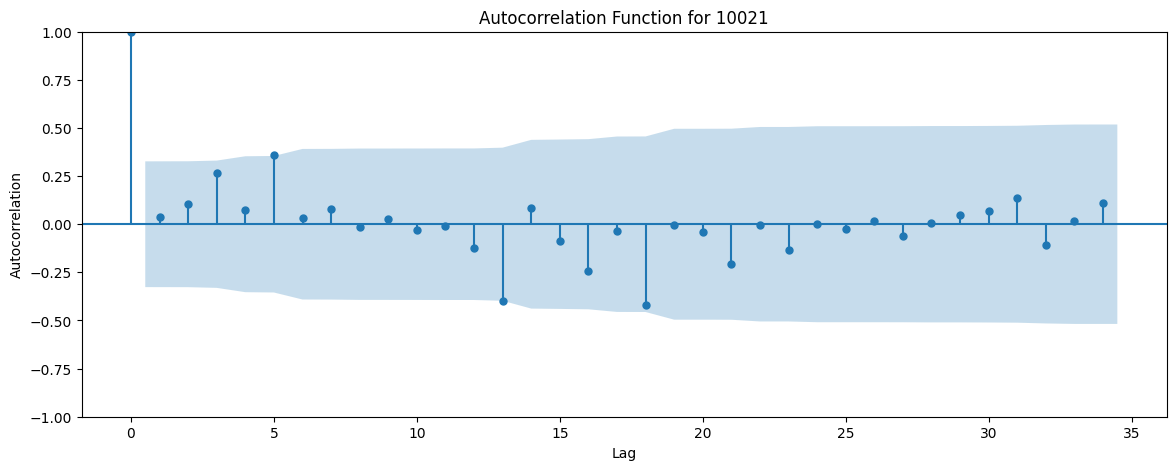

<Figure size 1400x500 with 0 Axes>

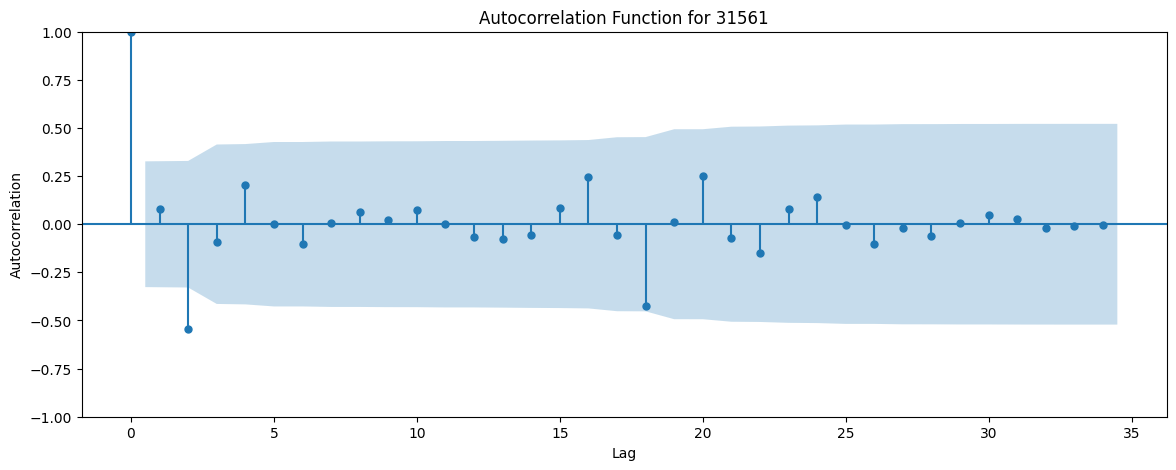

<Figure size 1400x500 with 0 Axes>

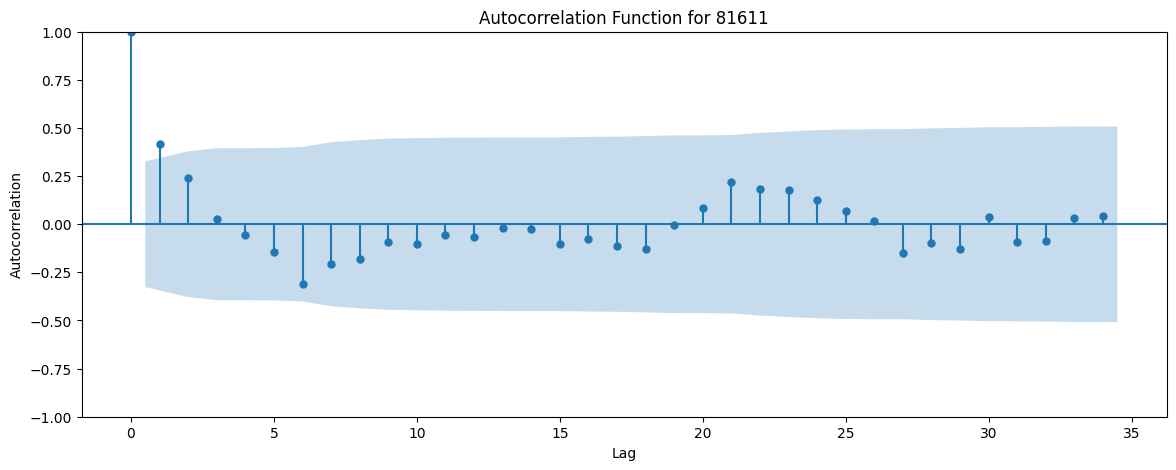

<Figure size 1400x500 with 0 Axes>

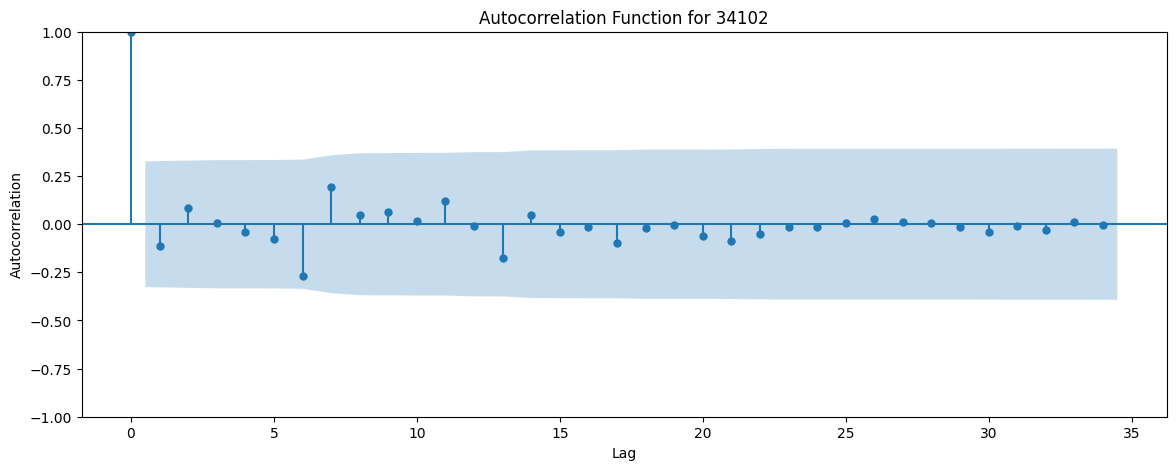

<Figure size 1400x500 with 0 Axes>

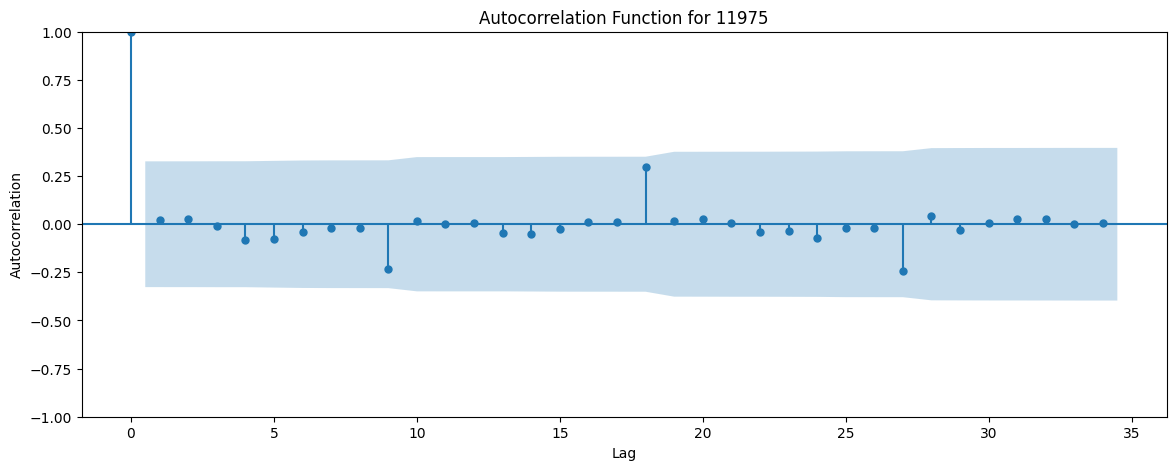

<Figure size 1400x500 with 0 Axes>

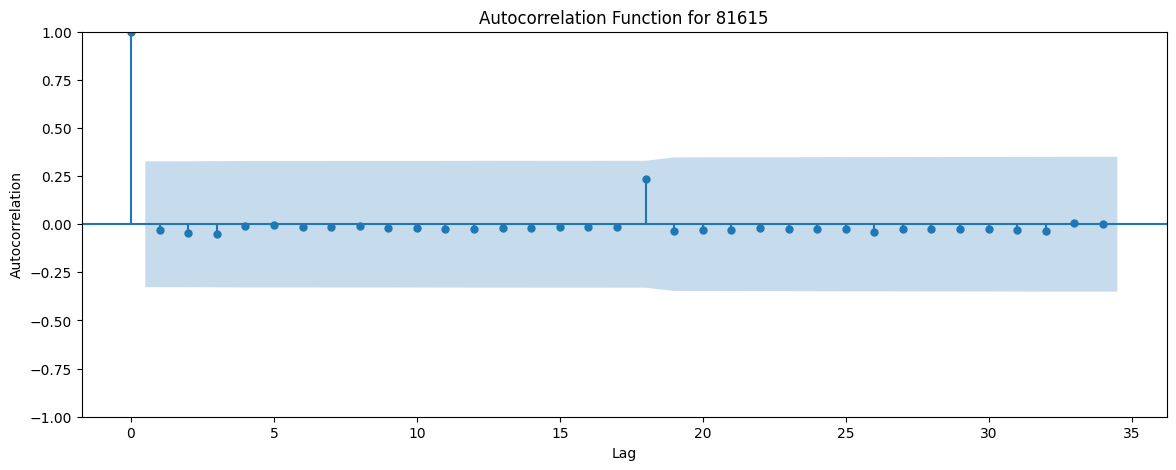

<Figure size 1400x500 with 0 Axes>

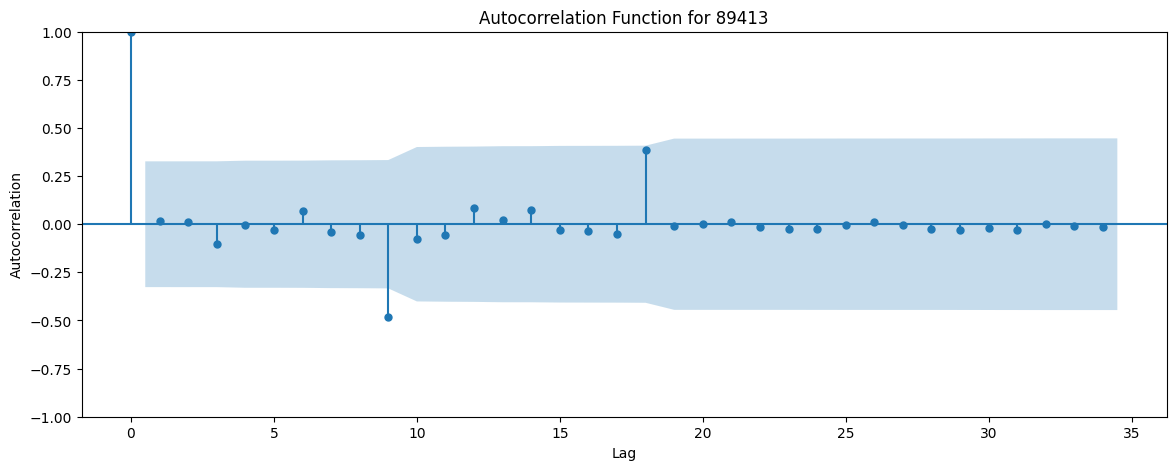

<Figure size 1400x500 with 0 Axes>

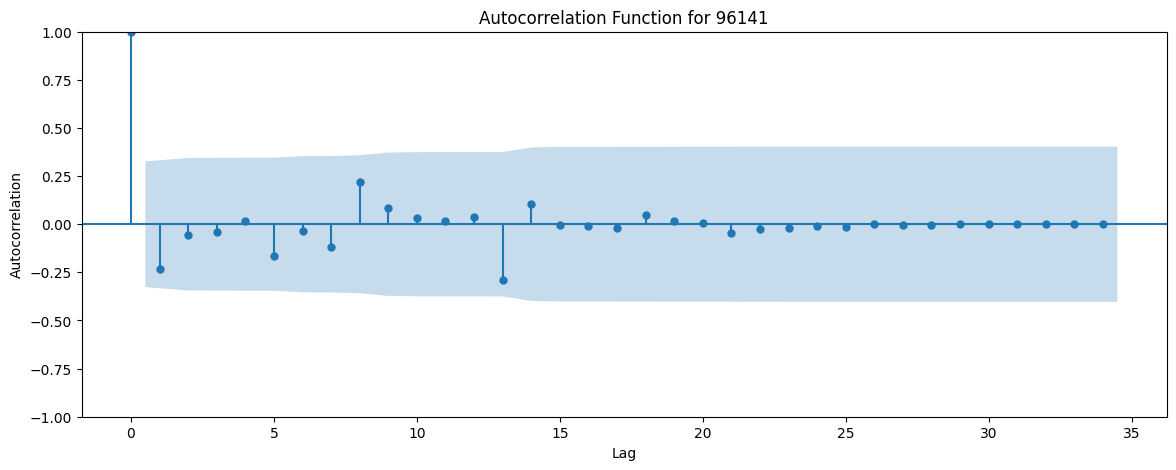

In [ ]:
rcParams['figure.figsize'] = 14, 5

# Iterate over each key (region) in the region_dataframes dictionary
for region_name, region_df in deseasonalized_data.items():
    # Plot ACF for the current region
    plt.figure()
    plot_acf(region_df, lags=34)
    plt.title(f'Autocorrelation Function for {region_name}')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.show()

Plotting the Partial Autocorrelation Function

<Figure size 1400x500 with 0 Axes>

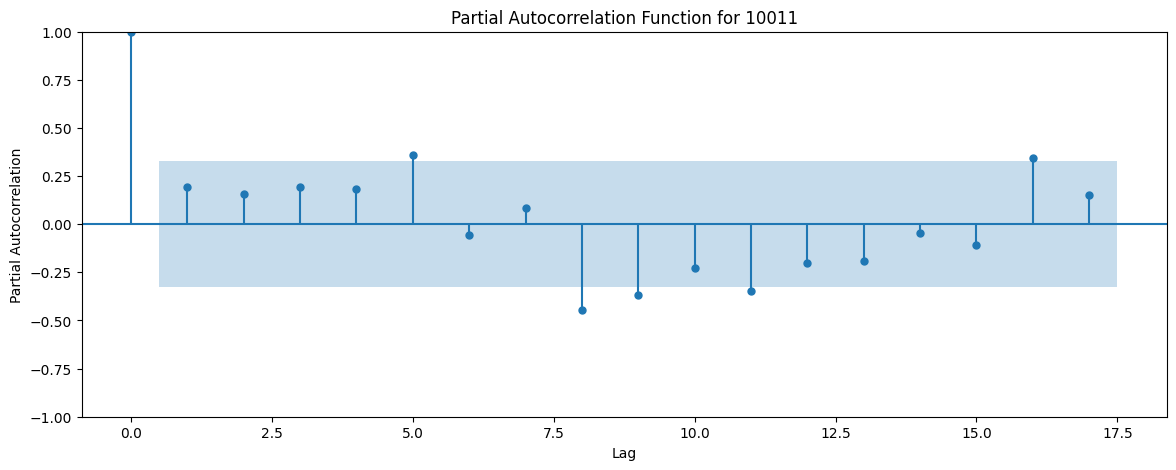

<Figure size 1400x500 with 0 Axes>

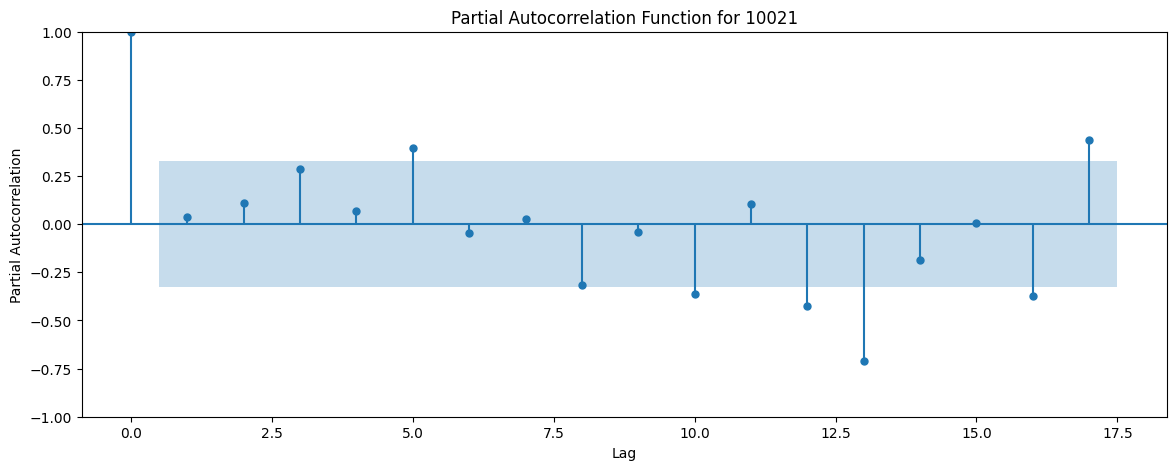

<Figure size 1400x500 with 0 Axes>

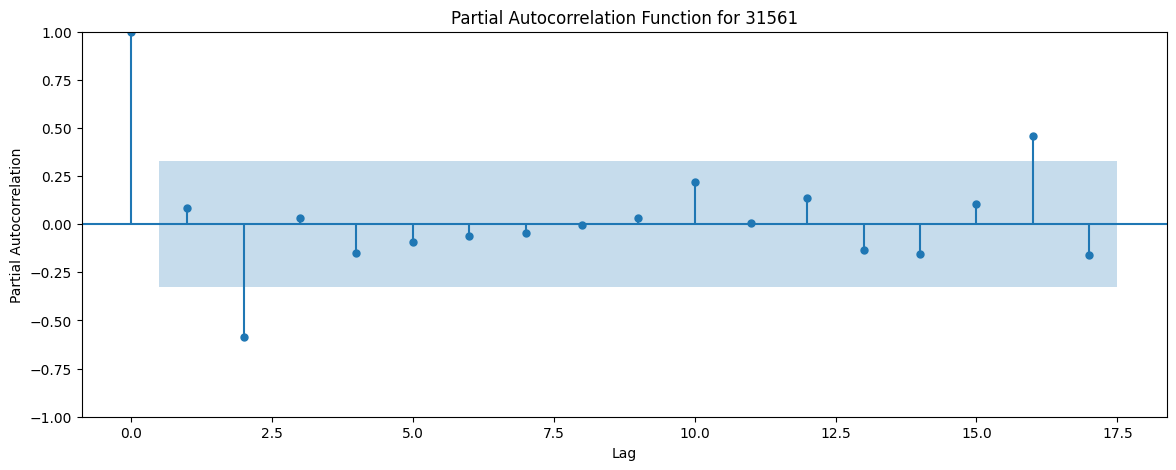

<Figure size 1400x500 with 0 Axes>

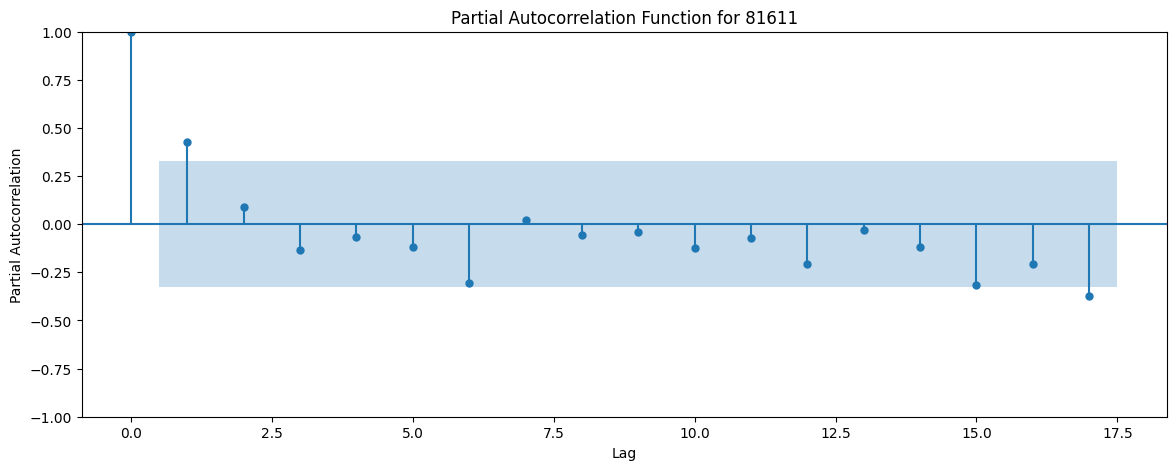

<Figure size 1400x500 with 0 Axes>

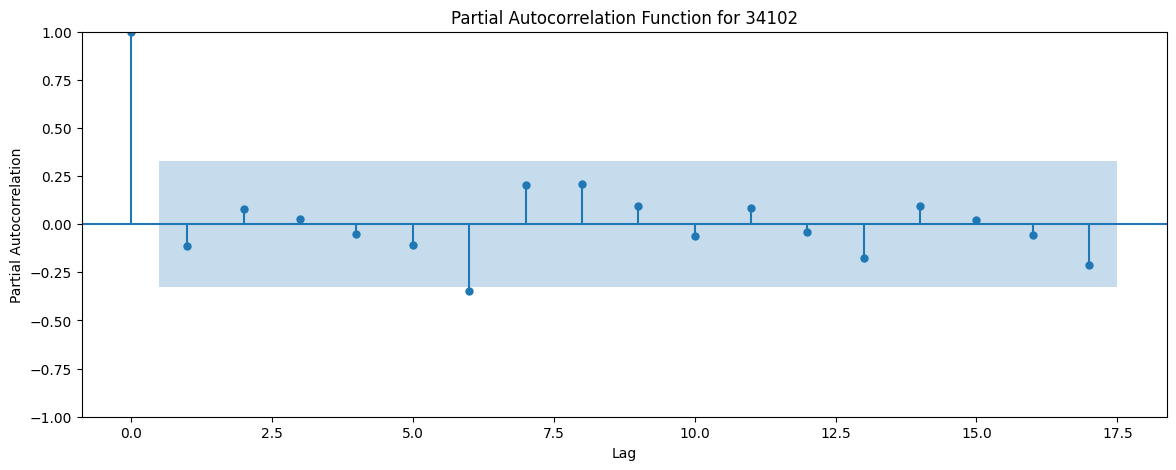

<Figure size 1400x500 with 0 Axes>

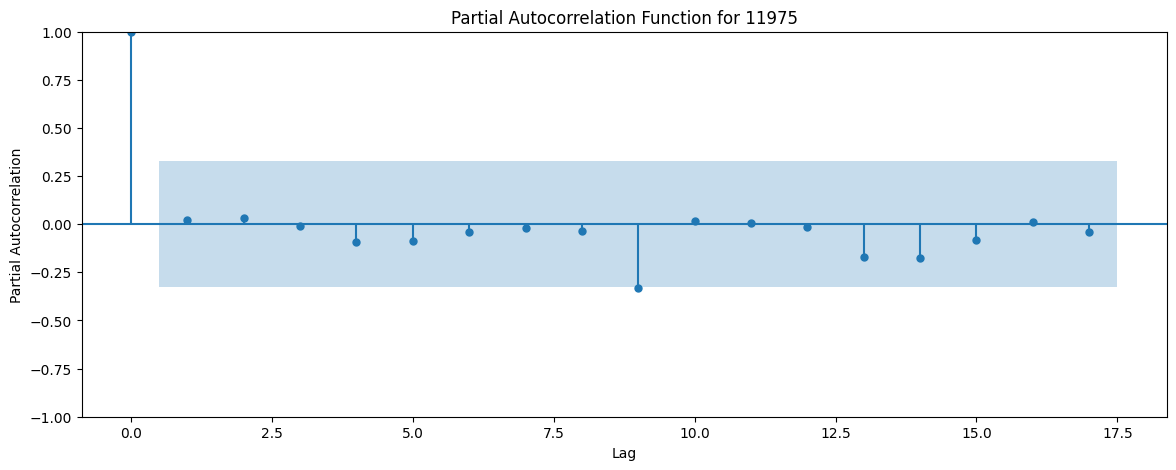

<Figure size 1400x500 with 0 Axes>

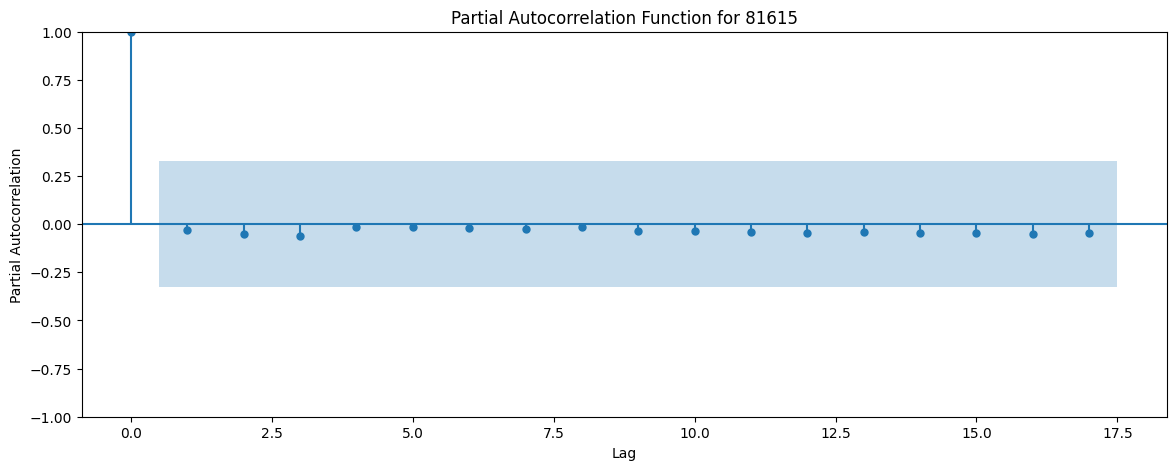

<Figure size 1400x500 with 0 Axes>

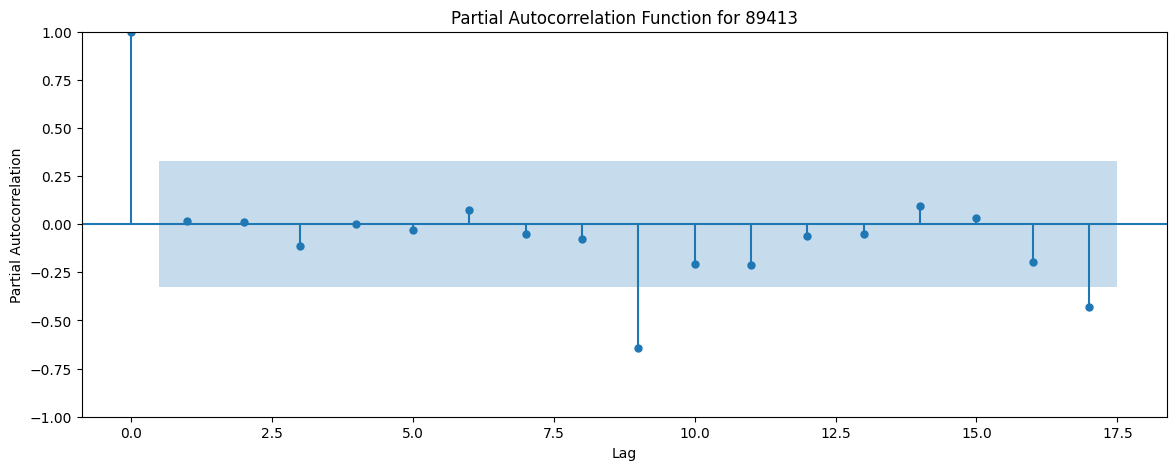

<Figure size 1400x500 with 0 Axes>

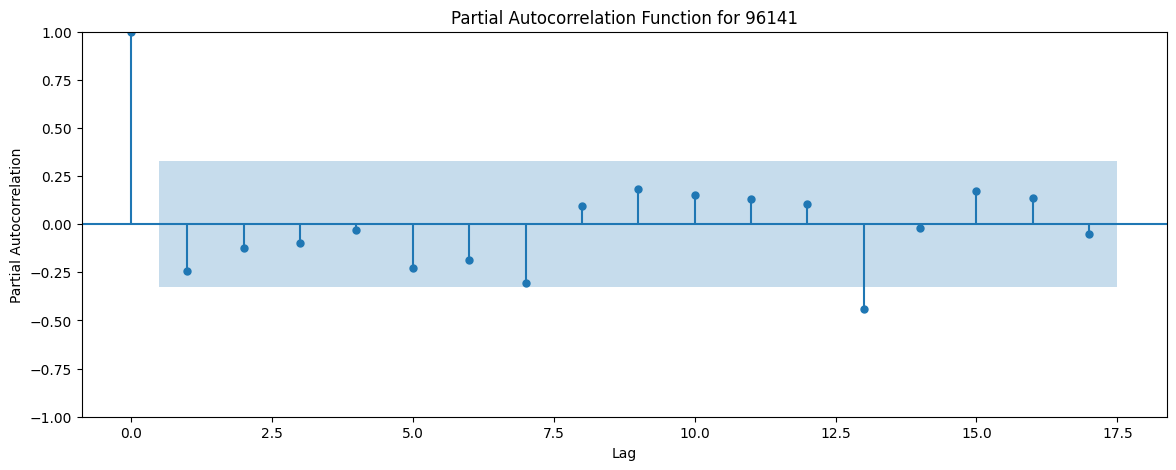

In [ ]:

rcParams['figure.figsize'] = 14, 5

# Iterate over each key (region) in the region_dataframes dictionary
for region_name, region_df in deseasonalized_data.items():
    # Plot ACF for the current region
    plt.figure()
    plot_pacf(region_df, lags=17)
    plt.title(f'Partial Autocorrelation Function for {region_name}')
    plt.xlabel('Lag')
    plt.ylabel('Partial Autocorrelation')
    plt.show()

Plotting the ACF and PACF for the zipcode 10014

<Figure size 1400x500 with 0 Axes>

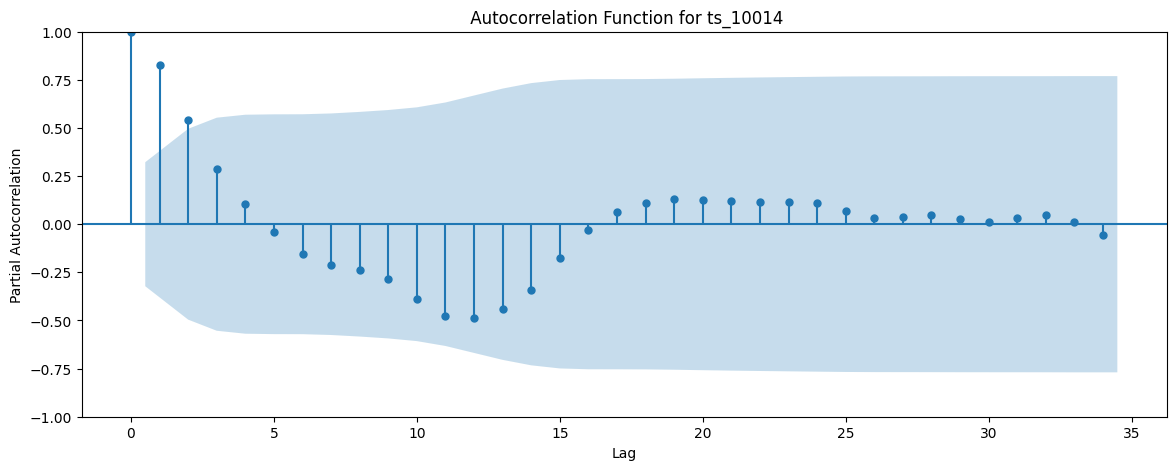

In [ ]:
    rcParams['figure.figsize'] = 14, 5
    # Plot ACF for the 10014
    plt.figure()
    plot_acf(ts_10014, lags=34)
    plt.title(f' Autocorrelation Function for ts_10014')
    plt.xlabel('Lag')
    plt.ylabel('Partial Autocorrelation')
    plt.show()

<Figure size 1400x500 with 0 Axes>

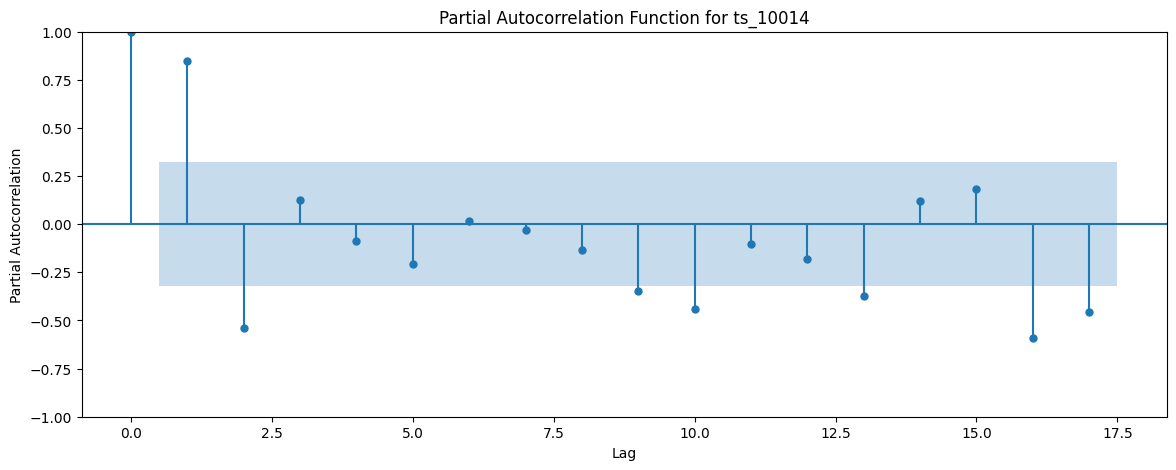

In [ ]:
    rcParams['figure.figsize'] = 14, 5
    # Plot PACF for the 10014
    plt.figure()
    plot_pacf(ts_10014, lags=17)
    plt.title(f'Partial Autocorrelation Function for ts_10014')
    plt.xlabel('Lag')
    plt.ylabel('Partial Autocorrelation')
    plt.show()

### Investigating for best parameters for AIC and BIC

ARIMA model

In [ ]:
#Manually Selecting  the order of the ARIMA model
p = 1  # Order of the autoregressive component
d = 1  # Order of differencing
q = 1  # Order of the moving average component
order = (p, d, q)

# fit the ARIMA model for ts_10011
model_arima = ARIMA(ts_10011, order=order)
model_fit = model_arima.fit()

# Obtain the model summary and diagnostics
print(model_fit.summary())

# Make predictions using the trained ARIMA model
#Choosing a forecast_step of 20
forecast_steps = 20
forecast = model_fit.get_forecast(steps=forecast_steps)
predicted_values = forecast.predicted_mean

                               SARIMAX Results                                
Dep. Variable:               seasonal   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -111.620
Date:                Mon, 26 Jun 2023   AIC                            229.239
Time:                        09:22:45   BIC                            233.905
Sample:                    05-01-2015   HQIC                           230.850
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1313      0.297     -0.441      0.659      -0.714       0.452
ma.L1         -0.6924      0.213     -3.245      0.001      -1.111      -0.274
sigma2        33.6579      8.259      4.075      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting the residuals for the ARIMA model

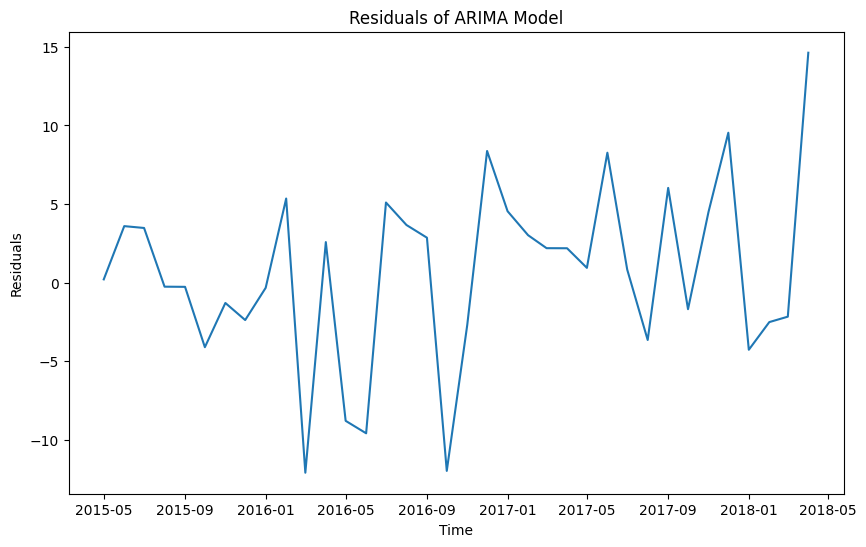

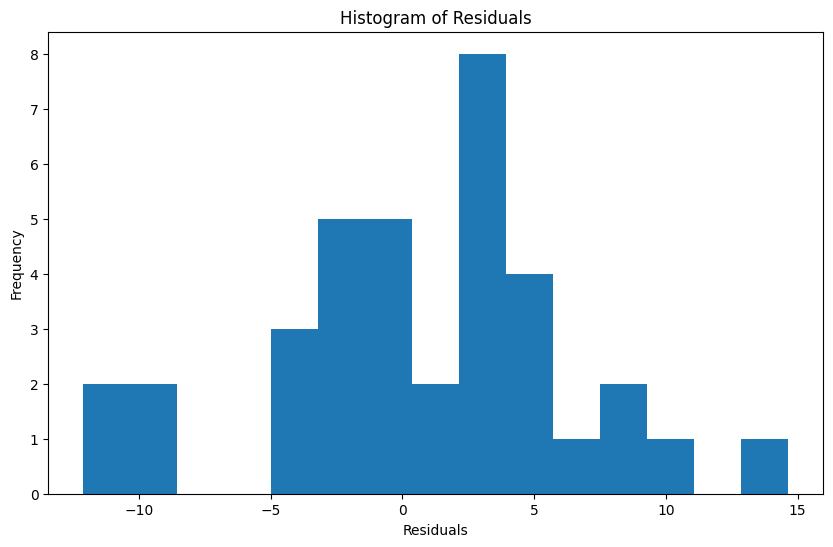

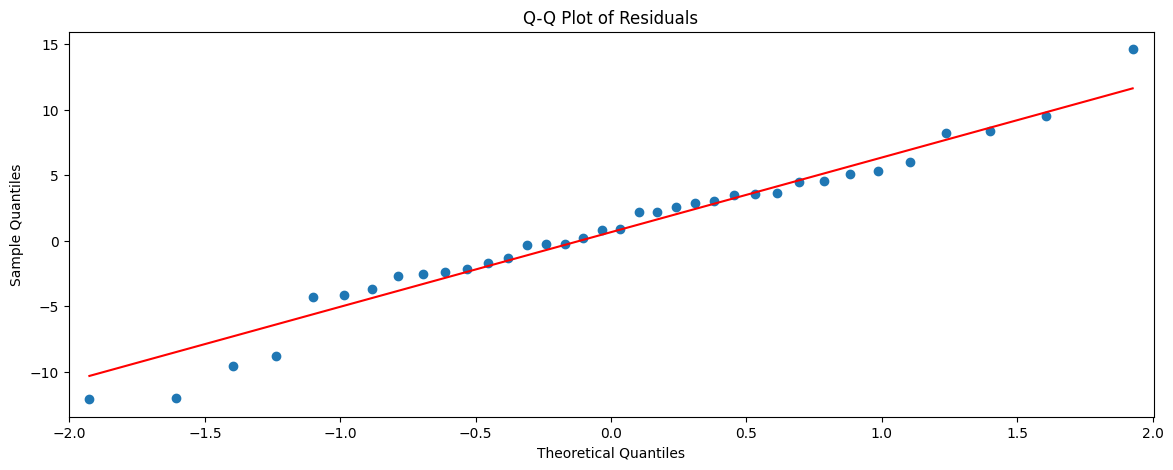

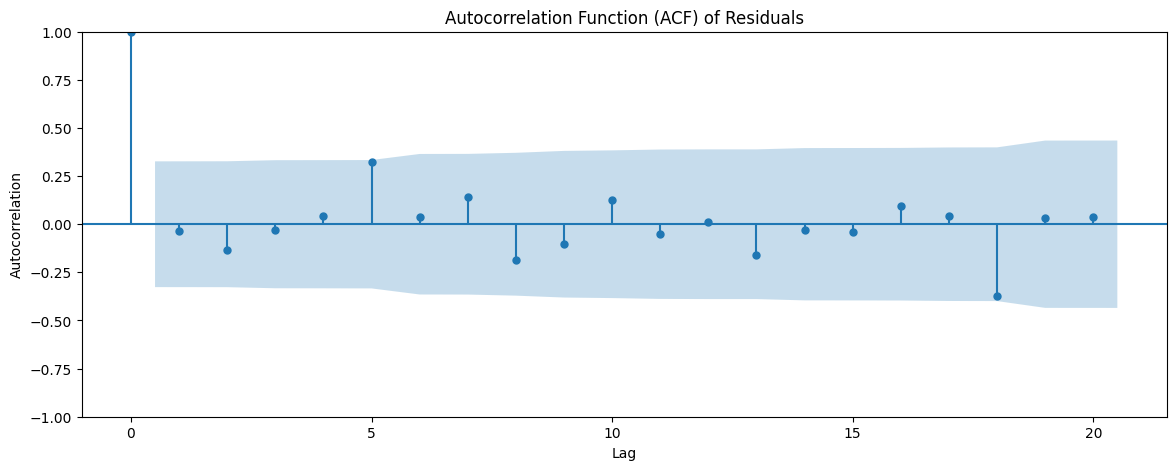

In [ ]:
residuals = model_fit.resid

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

# Plot the histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=15)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
# Plot the Q-Q plot of residuals
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Plot the autocorrelation function (ACF) of residuals
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, lags=20)
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

Searching for the optimal values for p,d,q using the aic criterion




In [ ]:
#Installing the pmdarima library
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Use auto arima function to find the best non-seasonal and seasonal parameters to fit the model.
import pmdarima as pm
results = pm.auto_arima(ts_10011,information_criterion='aic',m=12,d=0,
                        start_p=1,start_q=1, max_p=3, max_q=3,
                        stepwise=True,trace=True,error_action='ignore',suppress_warnings=True)
results

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=236.618, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=238.958, Time=0.10 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=239.344, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=235.651, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=238.265, Time=0.08 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=238.297, Time=0.18 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=236.958, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=237.368, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=235.756, Time=0.14 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12]          
Total fit time: 2.440 seconds


ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

Searching for the optimal values for p,d,q using the bic criterion


In [ ]:
import pmdarima as pm
#Use auto arima function to find the best non-seasonal and seasonal parameters to fit the model.
results = pm.auto_arima(ts_10011,information_criterion='bic',m=12,d=0,
                        start_p=1,start_q=1, max_p=3, max_q=3,
                        stepwise=True,trace=True,error_action='ignore',suppress_warnings=True)
results

Performing stepwise search to minimize bic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : BIC=inf, Time=1.13 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=239.785, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=245.292, Time=0.18 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=245.678, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=237.234, Time=0.03 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=243.016, Time=0.11 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=243.048, Time=0.13 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.70 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=241.708, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=242.119, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=242.090, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12]          
Total fit time: 2.930 seconds


ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

From the results above, we select an optimal order of (0,0,0) for the p,d,q

In [ ]:
#Displaying the top 10 zipcodes with their respective values over the period, in a dataframe
# Create an empty dataframe
region_DF = pd.DataFrame()

# Iterate over each key-value pair in the region_dataframes dictionary
for region_name, region_df in region_dataframes.items():
    # Add the region dataframe as a column to the region_DF dataframe
    region_DF[region_name] = region_df['value']

# Set 'RegionName' column as the index
region_DF.set_index(region_df.index, inplace=True)

# Display the resulting dataframe
print(region_DF.tail())

                 10011      10014       10021      11975      31561  \
time                                                                  
2017-12-01  11946500.0  9492800.0  18307100.0  3317200.0  2435600.0   
2018-01-01  11978100.0  9524900.0  18365900.0  3353000.0  2451700.0   
2018-02-01  11849300.0  9373400.0  18530400.0  3425000.0  2455200.0   
2018-03-01  11563000.0  9119600.0  18337700.0  3473300.0  2455800.0   
2018-04-01  11478300.0  8959300.0  17894900.0  3467800.0  2440000.0   

                34102      81611      81615      89413     96141  
time                                                              
2017-12-01  2763100.0  4321700.0  2607100.0  2098400.0  675000.0  
2018-01-01  2769700.0  4381800.0  2626300.0  2121300.0  675000.0  
2018-02-01  2760100.0  4469700.0  2675700.0  2153600.0  677500.0  
2018-03-01  2733100.0  4626100.0  2793600.0  2167100.0  684400.0  
2018-04-01  2715400.0  4766600.0  2903600.0  2161900.0  689700.0  


Performing Train Test Split

We split our data into train and test sets using a train size of 0.8 and a test size of 0.2

In [ ]:
# Split the dataset into train and test sets
#Using a train size of 0.8 of the data
train = df.loc[:'2017-08-01']
test = df.loc['2017-08-01':]

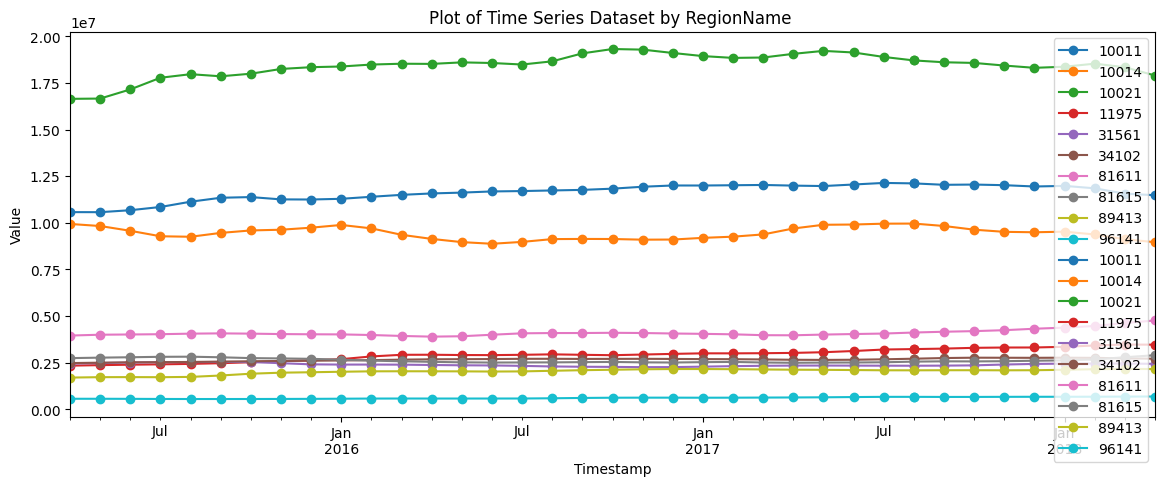

In [ ]:
#Plotting the train and test split time series for all the top 10 zipcodes
#Defining train and test for our dataset

## Split
train = region_DF.loc[:'2017-08-01']
test = region_DF.loc['2017-08-01':]

## Visualize split
fig,ax= plt.subplots()
kws = dict(ax=ax,marker='o')
train.plot(**kws)
test.plot(**kws)
ax.legend(bbox_to_anchor=[1,1])
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Plot of Time Series Dataset by RegionName ')
plt.legend()
plt.show()


In [ ]:
def train_test(df):
    #Set trainning dsata before 2016
    train = df[:'2017-08-01']
    #Set test data starting 2016
    test = df['2017-08-01':]
    return train, test

Modelling for the different Zipcodes using SARIMAX

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               seasonal   No. Observations:                   36
Model:                        SARIMAX   Log Likelihood                -116.825
Date:                Mon, 26 Jun 2023   AIC                            235.651
Time:                        09:22:57   BIC                            237.234
Sample:                    05-01-2015   HQIC                           236.203
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        38.5677      6.964      5.538      0.000      24.919      52.216
===================================================================================
Ljung-Box (L1) (Q):                   1.40   Jarque-Bera (JB):                 3.58
Prob(Q):                              0.24   Prob(JB):                         0.17
Heteroskedasticity (H):               3.23   Skew:                            -0.07
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

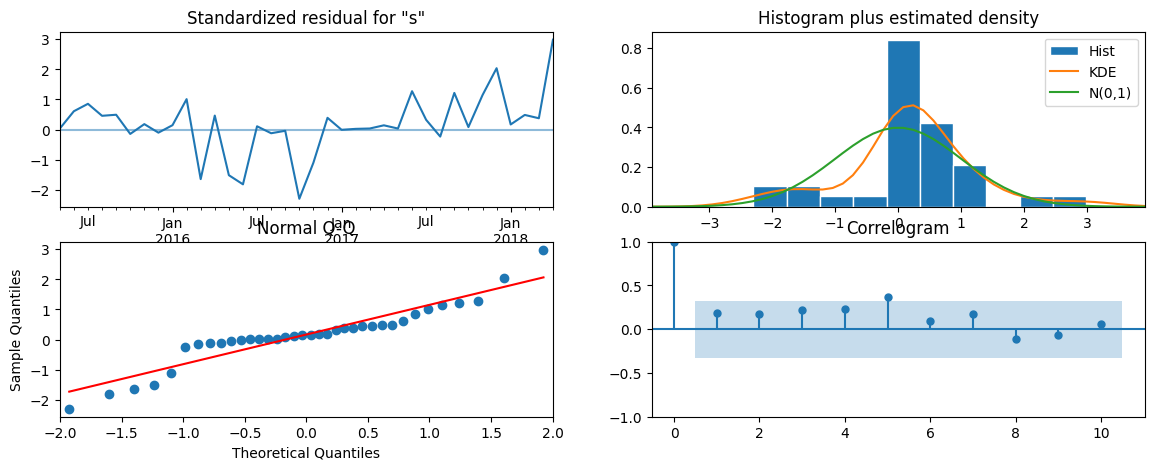

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Baseline model from eye-balled params
model = SARIMAX(ts_10011,order=(0,0,0),).fit()
display(model.summary())
model.plot_diagnostics();
plt.show()

The results were interpreted as follows:

* The heteroskedasticity statistic (H) in this case, has a statistic of 3.23, and the associated p-value (0.05) suggests some evidence of heteroskedasticity in the residuals.

* The skewness of the residuals is -0.07, indicating a slight left-skewness.

* The kurtosis of the residuals is 4.54, suggesting that the distribution has heavier tails compared to a normal distribution.

Selecting Parameters for the SARIMA model


In [ ]:
def model_fit(df,pdq=(1,0,1),pdqs=(0,0,0,12)):
    train, test = train_test(df)
    model = SARIMAX(train,order=pdq,seasonal_order=pdqs)
    results = model.fit()
    results.summary
    residuals = results.resid
    print(results.summary())
    results.plot_diagnostics(figsize=(11,8))
    plt.show();
    return train, test, results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               seasonal   No. Observations:                   28
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 -85.317
Date:                Mon, 26 Jun 2023   AIC                            176.635
Time:                        09:22:58   BIC                            180.631
Sample:                    05-01-2015   HQIC                           177.856
                         - 08-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7520      0.636      1.183      0.237      -0.494       1.998
ma.L1         -0.6145      0.726     -0.847      0.397      -2.037       0.808
sigma2        25.8880      6.345      4.080      0.0

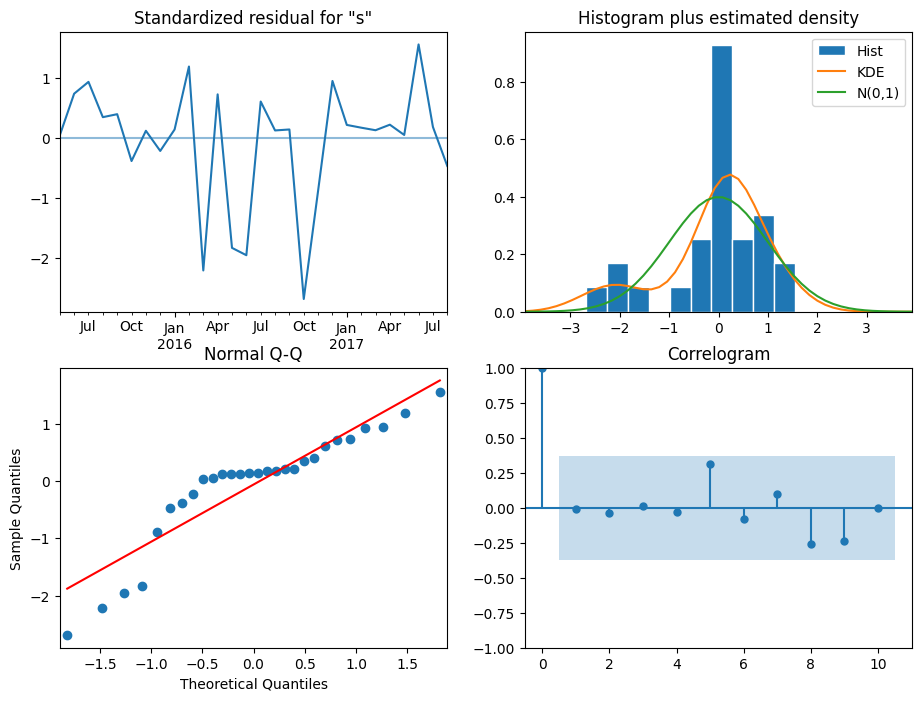

In [ ]:
pdq = (1,0,1)
pdqs = (0,0,0,12)
train,test,results = model_fit(ts_10011, pdq=pdq, pdqs=pdqs)

Calcuating the RMSE

In [ ]:
#Defining a function for the train RMSE
def train_RMSE(train, results, display = True):
    train_pred = results.predict(-23)
    rmse = sqrt(MSE(train[-23:],train_pred))
    print(f'SARIMA model RMSE on train data: %.4f' % rmse)
    if display:
        plt.figure(figsize=(13,6))
        train[-23:].plot(label='Actual',color='b')
        train_pred.plot(label='Predicted',color='r')
        plt.legend(loc='best')
        plt.title('Actual Train Data vs. Predicted Returns')
        plt.show()

SARIMA model RMSE on train data: 5.4439


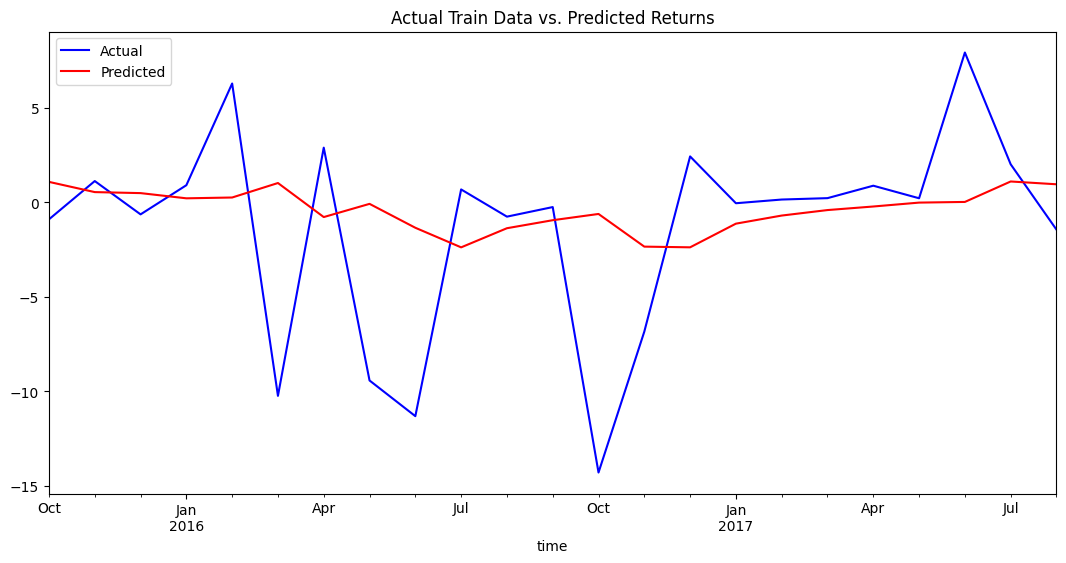

In [ ]:
train_RMSE(train, results)

Testing our model and printing the RMSE for each test data

In [ ]:
def test_RMSE(df,pdq=(1,0,1),pdqs=(0,0,0,1), display=True):
    X = df.values
    train, test = X[:-23],X[-23:]
    history = [x for x in train]
    predictions = []
    for t in range(len(test)):
        model = SARIMAX(history, order=pdq,seasonal_order=pdqs)
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        history.append(test[t])
    rmse = sqrt(MSE(test, predictions))
    print('SARIMA model RMSE on test data: %.5f' % rmse)
    if display:
        plt.figure(figsize=(13,6))
        plt.title('Actual Test Data vs. Predictions')
        plt.plot(history[-23:],label='Actual', color='b')
        plt.plot(predictions,label='Predictions',color='r')
        plt.legend(loc='best')
        plt.show()

SARIMA model RMSE on test data: 6.90419


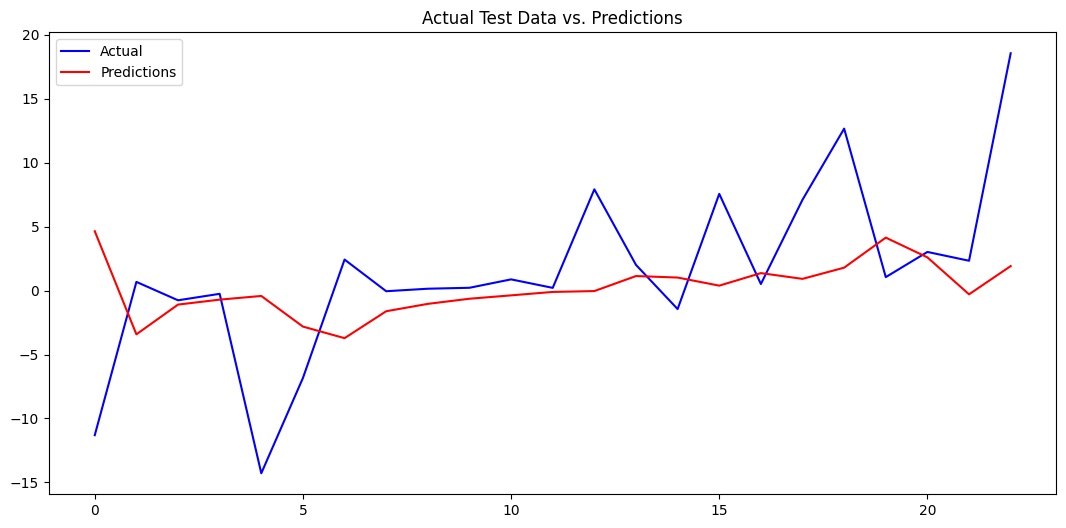

In [ ]:
test_RMSE(ts_10011,pdq=pdq,pdqs=pdqs, display=True)


SARIMA model RMSE on test data: 82179.86713


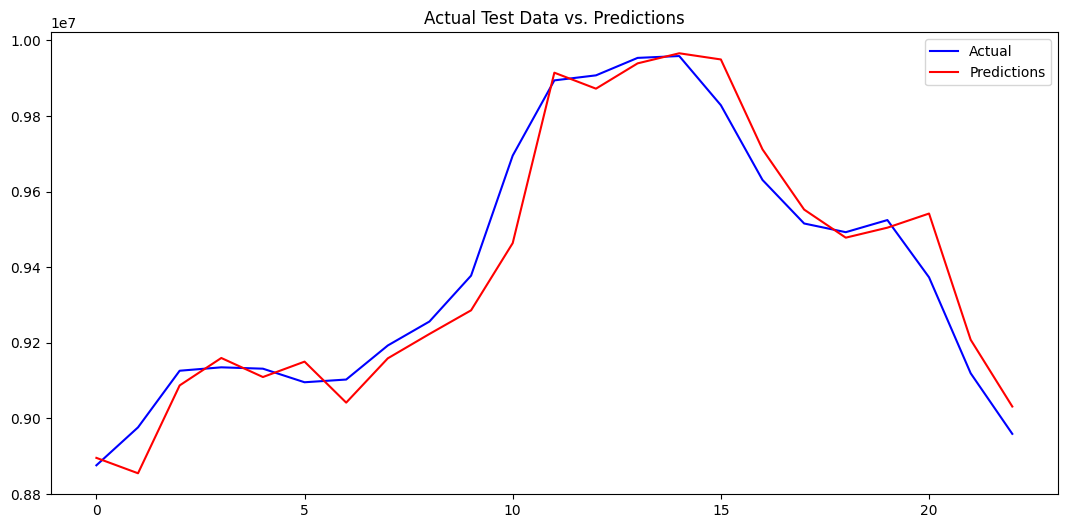

In [ ]:
test_RMSE(ts_10014,pdq=pdq,pdqs=pdqs, display=True)


SARIMA model RMSE on test data: 3.82168


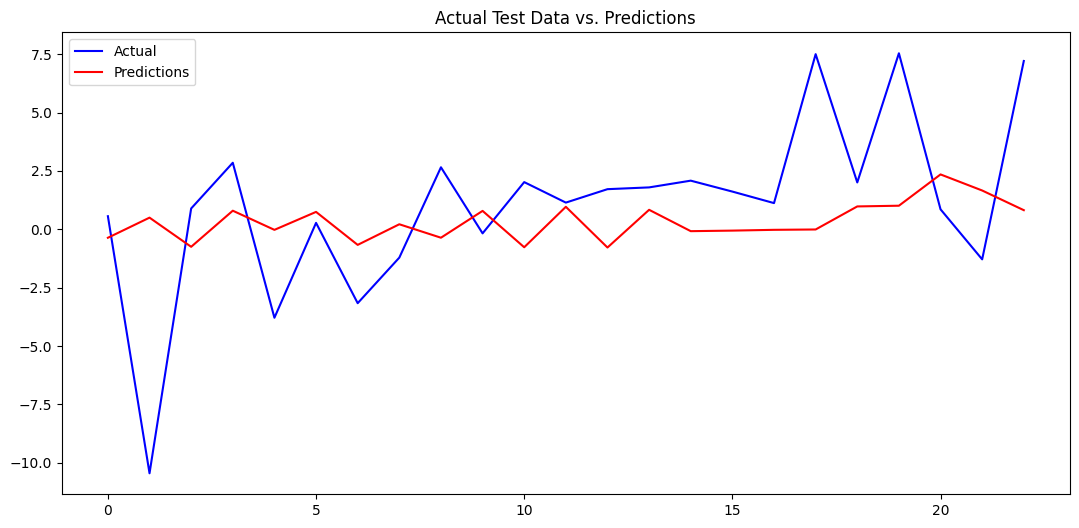

In [ ]:
test_RMSE(ts_10021,pdq=pdq,pdqs=pdqs, display=True)


SARIMA model RMSE on test data: 1.94256


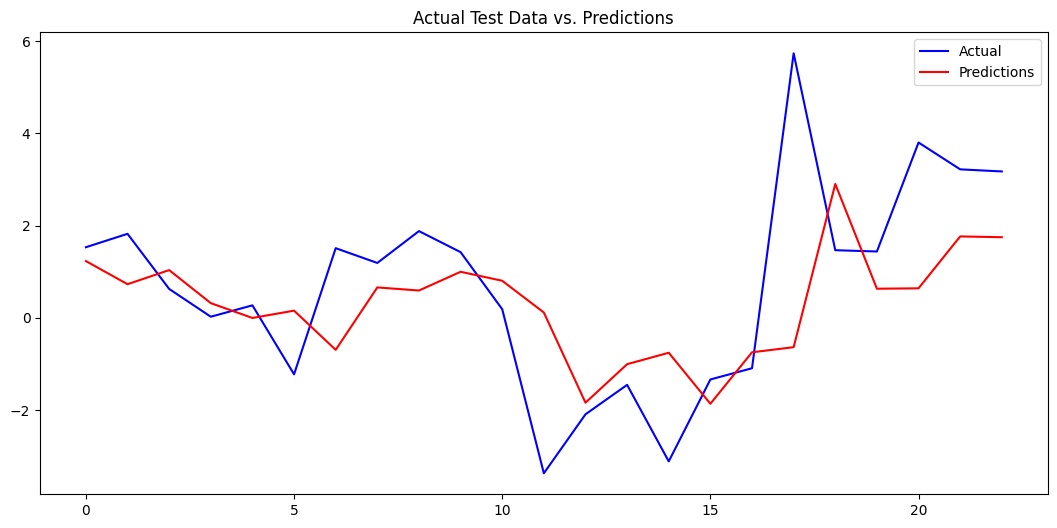

In [ ]:
test_RMSE(ts_81611,pdq=pdq,pdqs=pdqs, display=True)


SARIMA model RMSE on test data: 1.86079


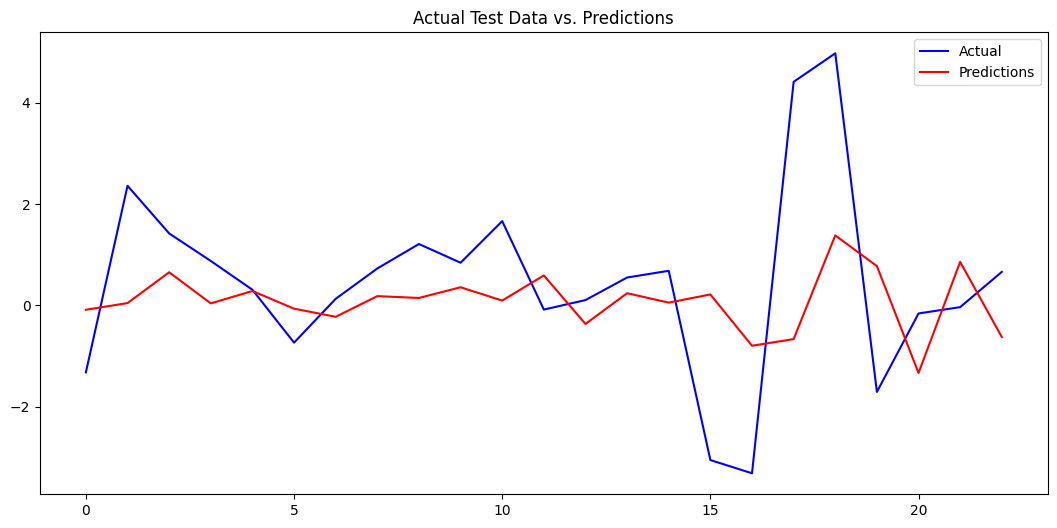

In [ ]:
test_RMSE(ts_31561,pdq=pdq,pdqs=pdqs, display=True)


## 6). Forecasting Using Prophet Technique




INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5i53l19/a4cp72f9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5i53l19/8z2ovrex.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66568', 'data', 'file=/tmp/tmpq5i53l19/a4cp72f9.json', 'init=/tmp/tmpq5i53l19/8z2ovrex.json', 'output', 'file=/tmp/tmpq5i53l19/prophet_modelzapjn25a/prophet_model-20230626092306.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:23:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:23:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonali

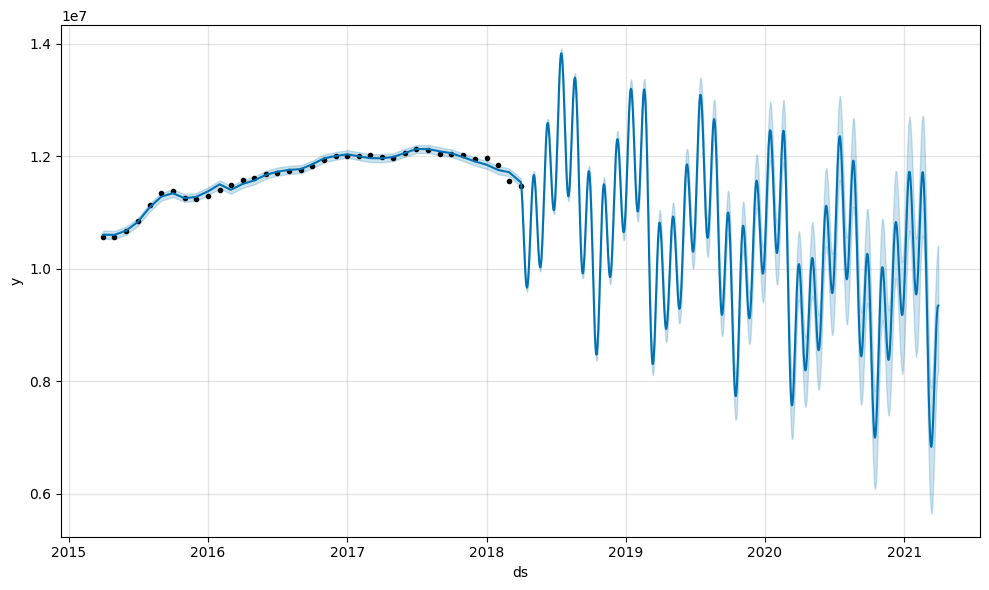

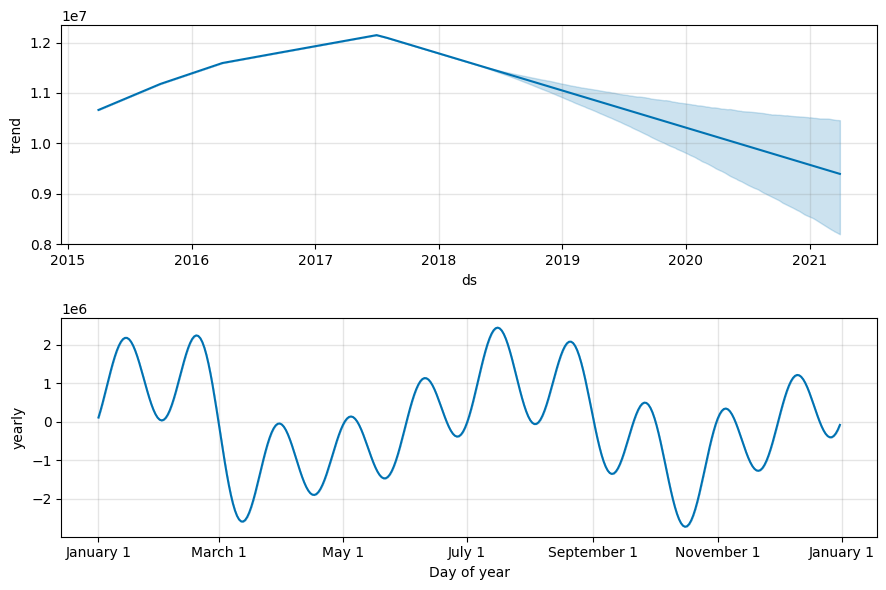

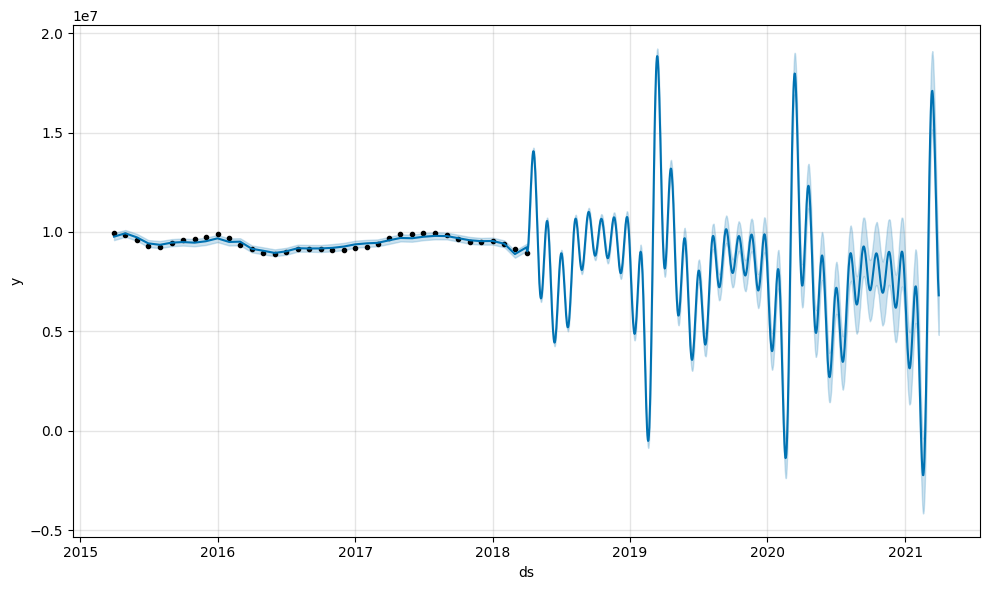

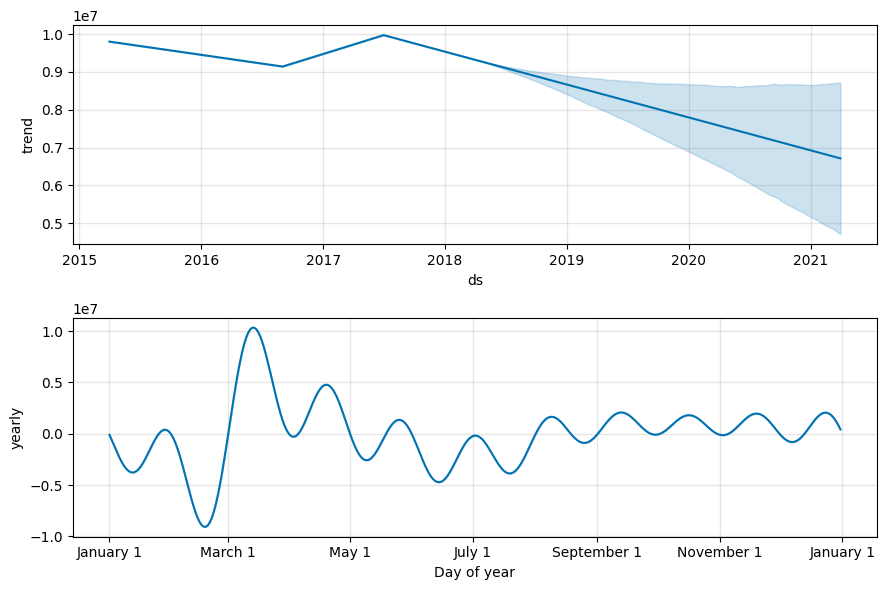

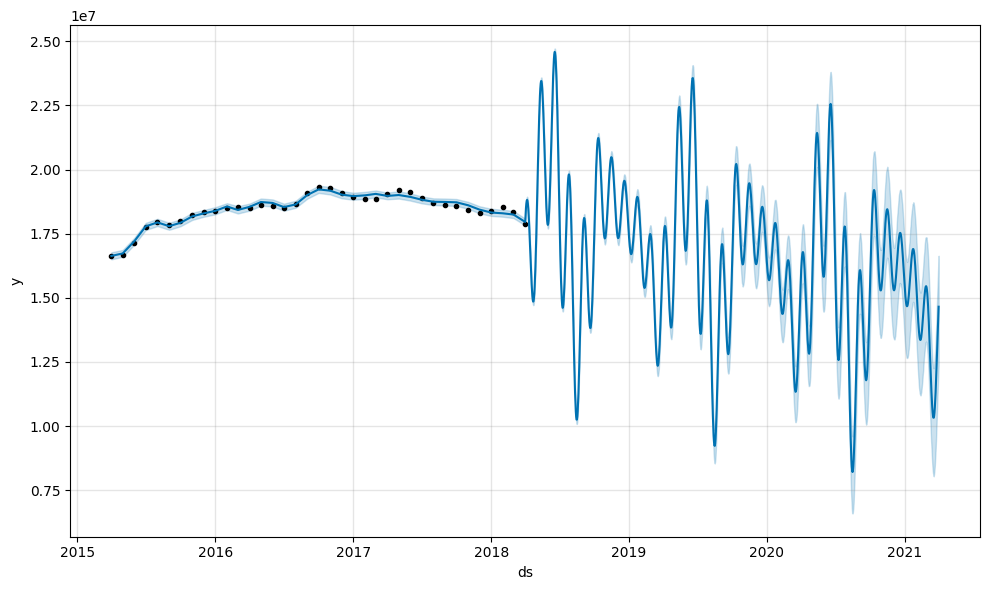

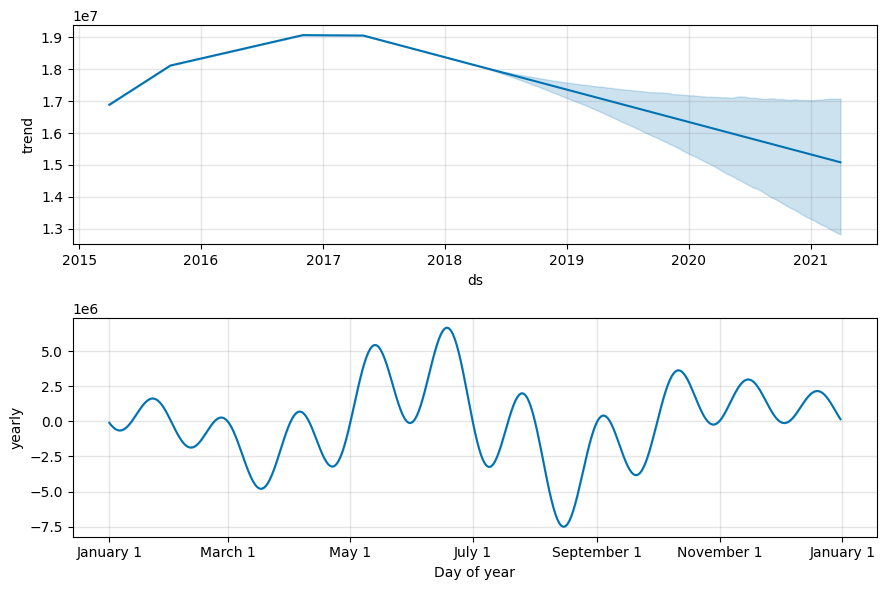

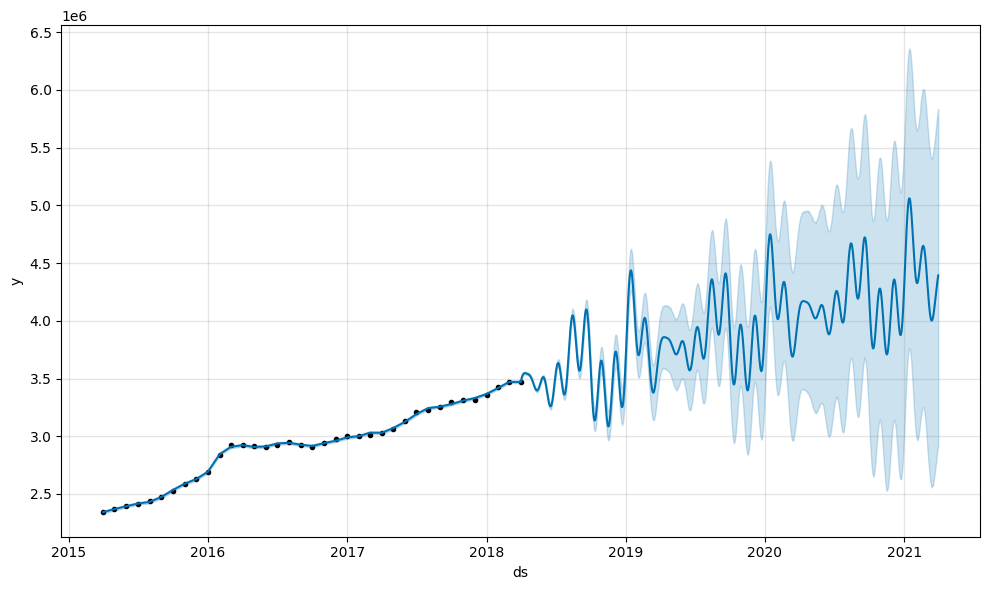

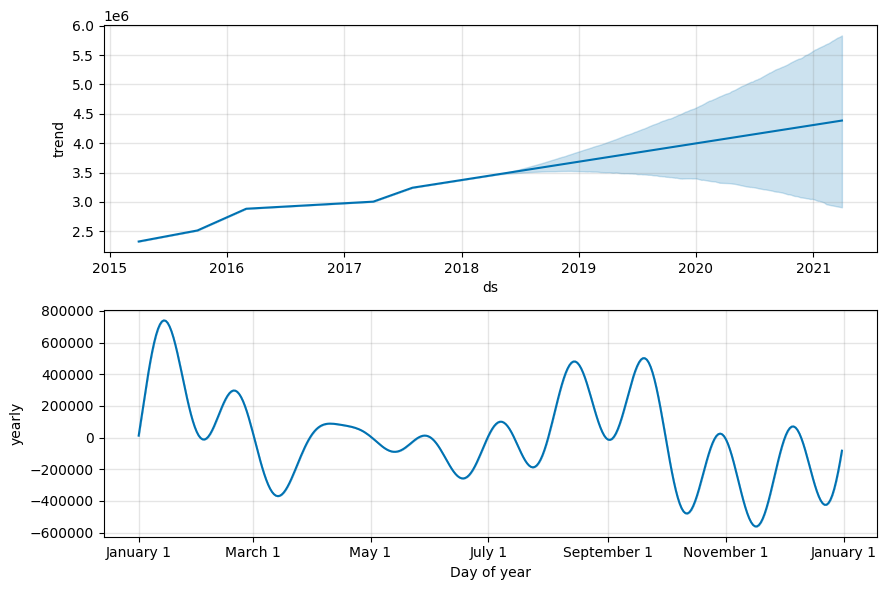

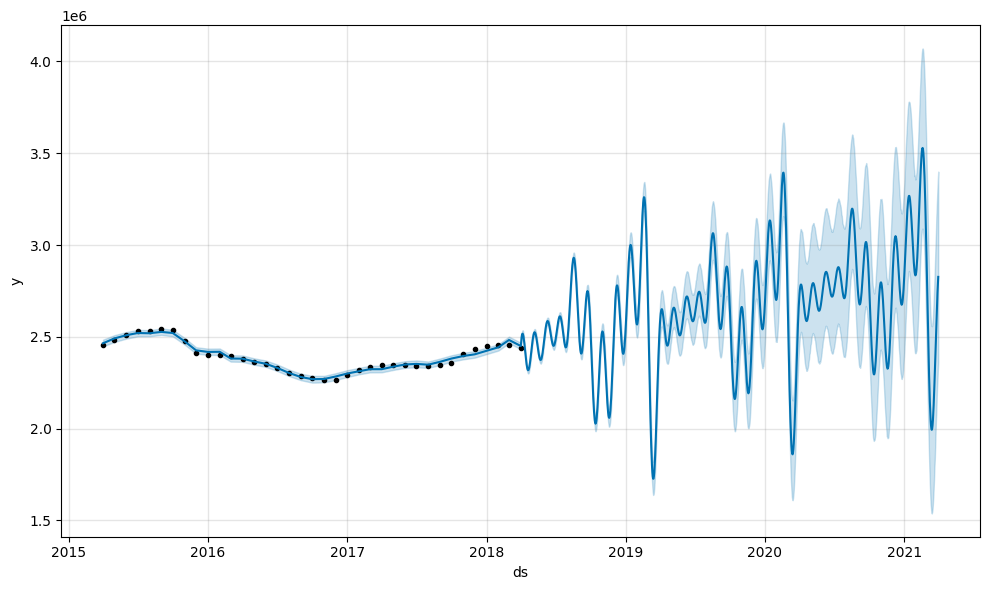

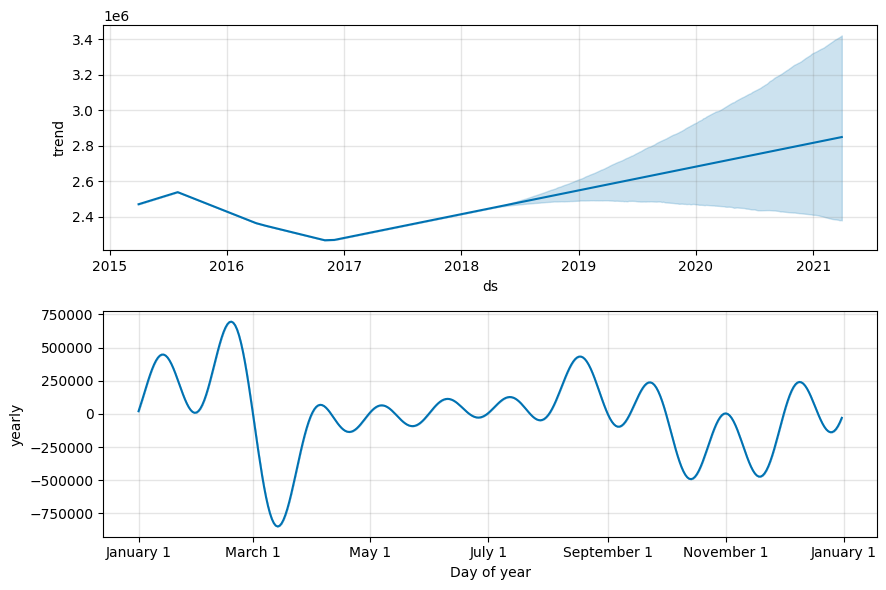

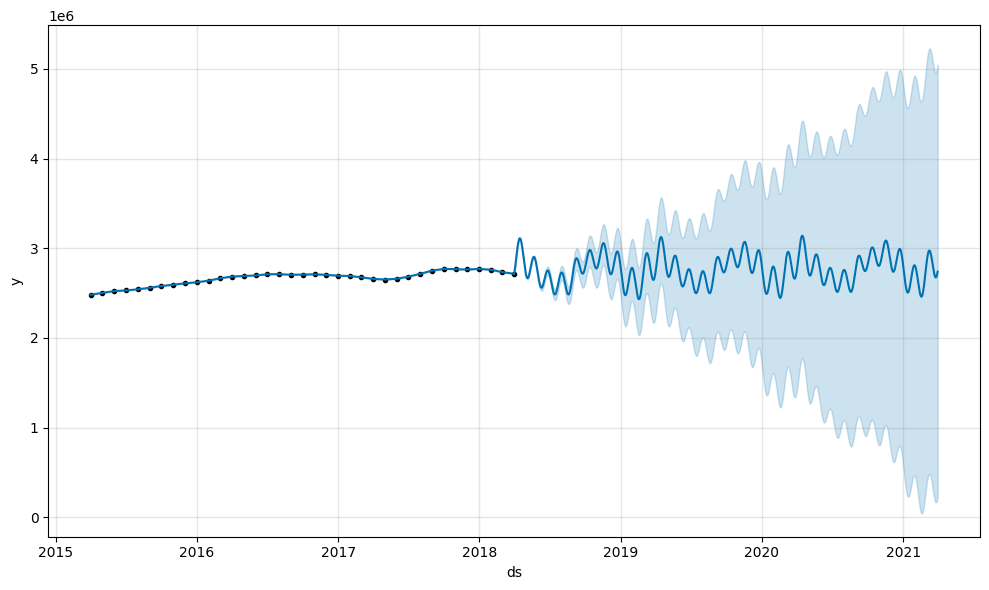

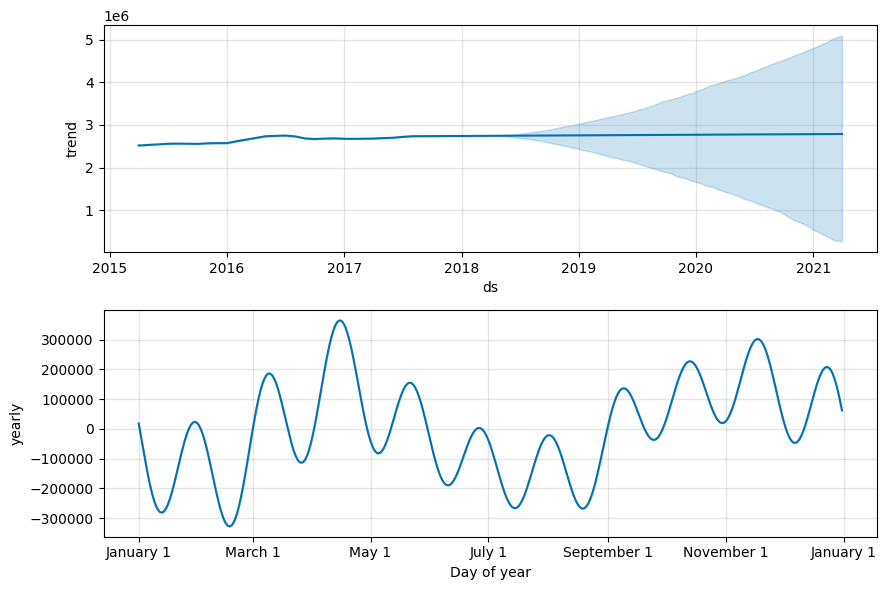

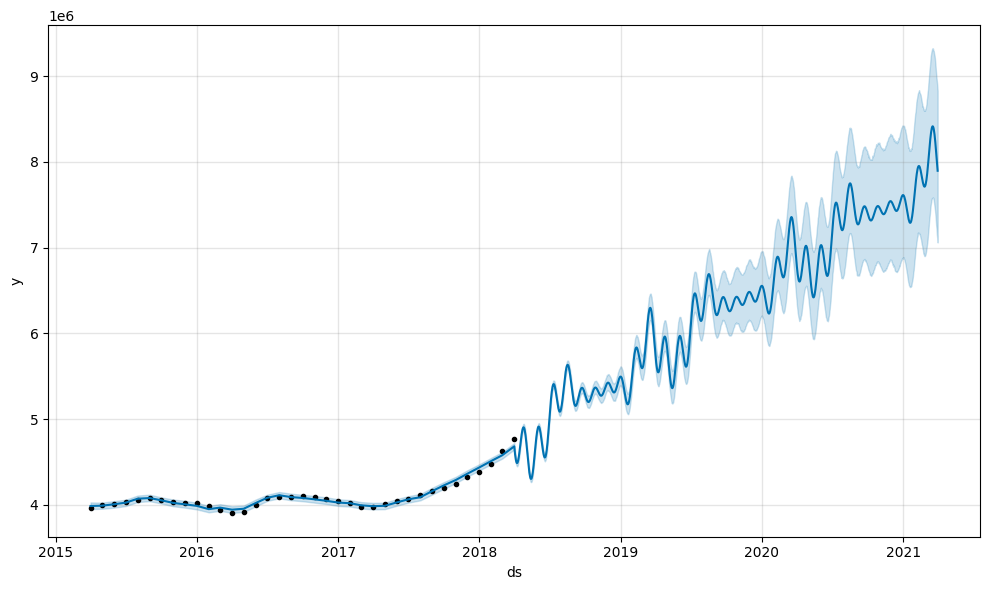

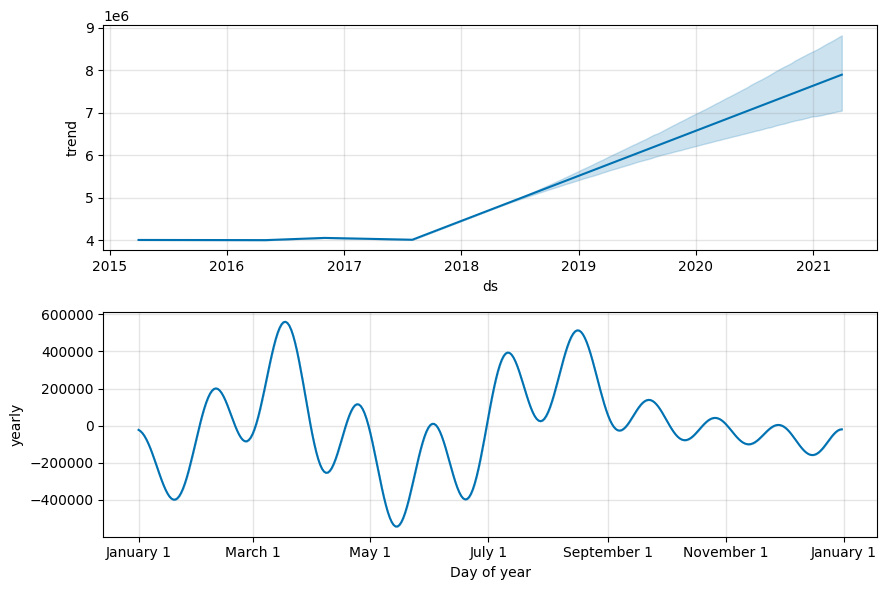

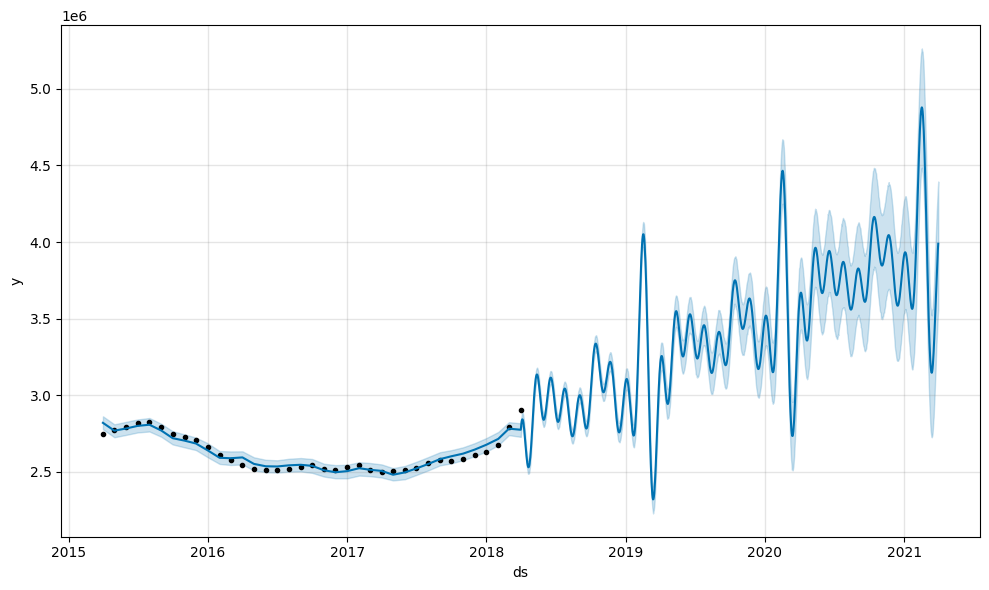

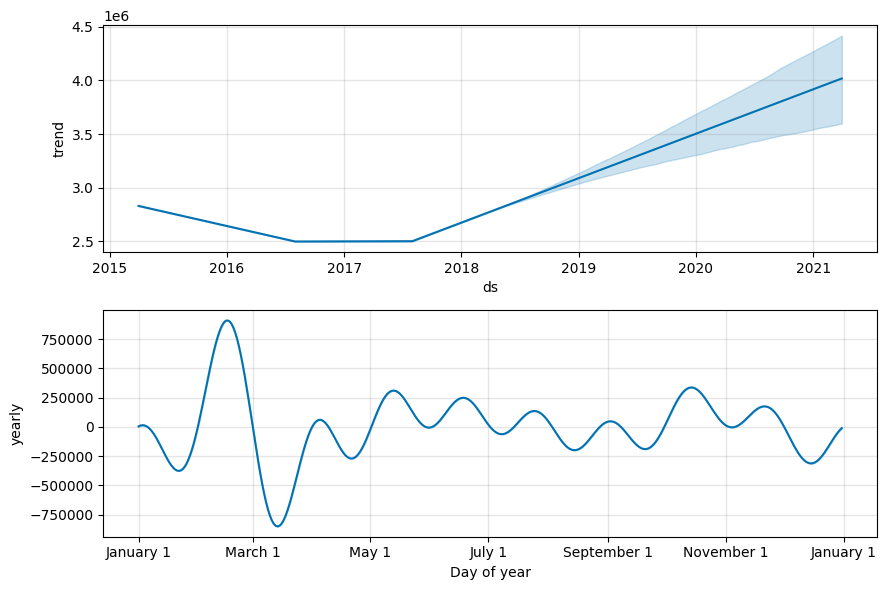

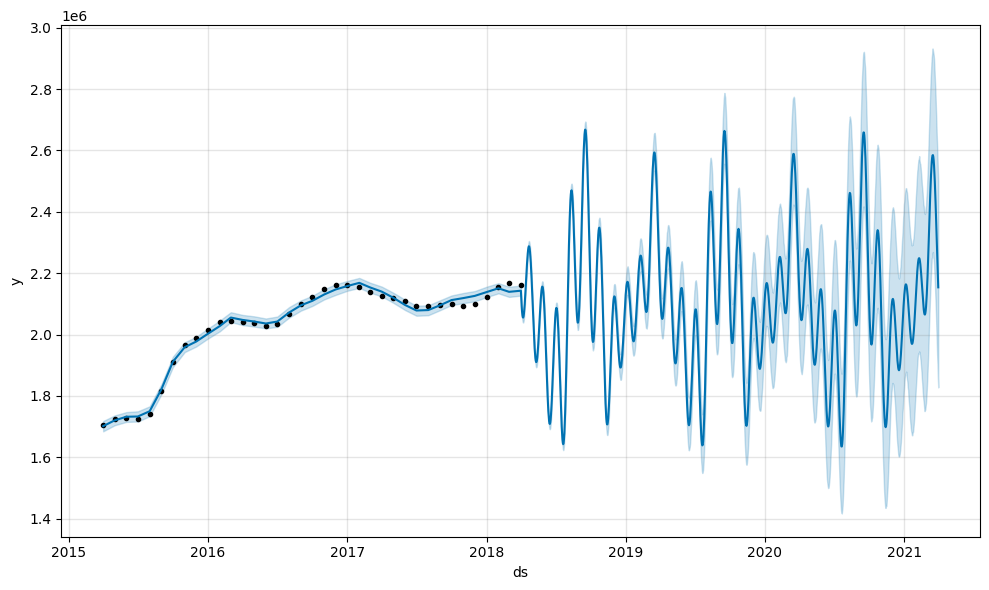

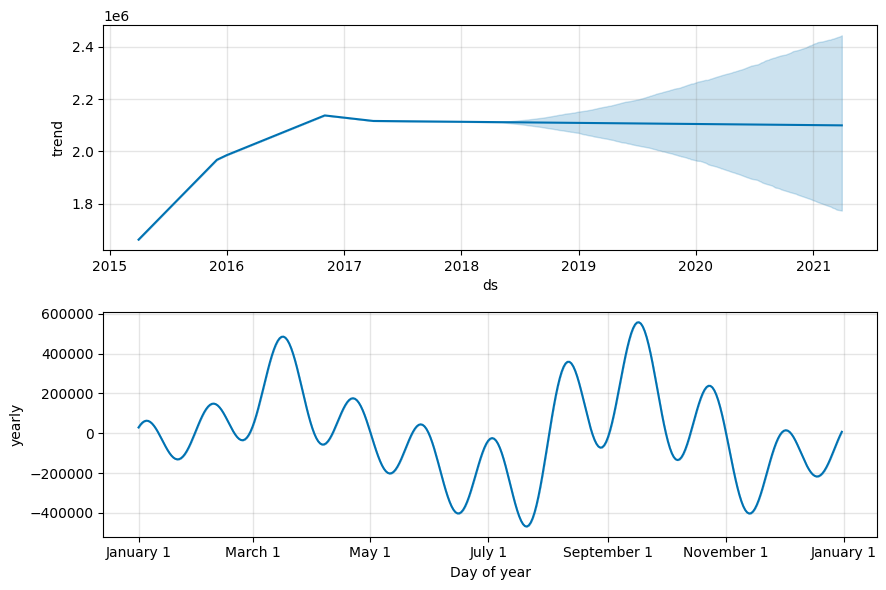

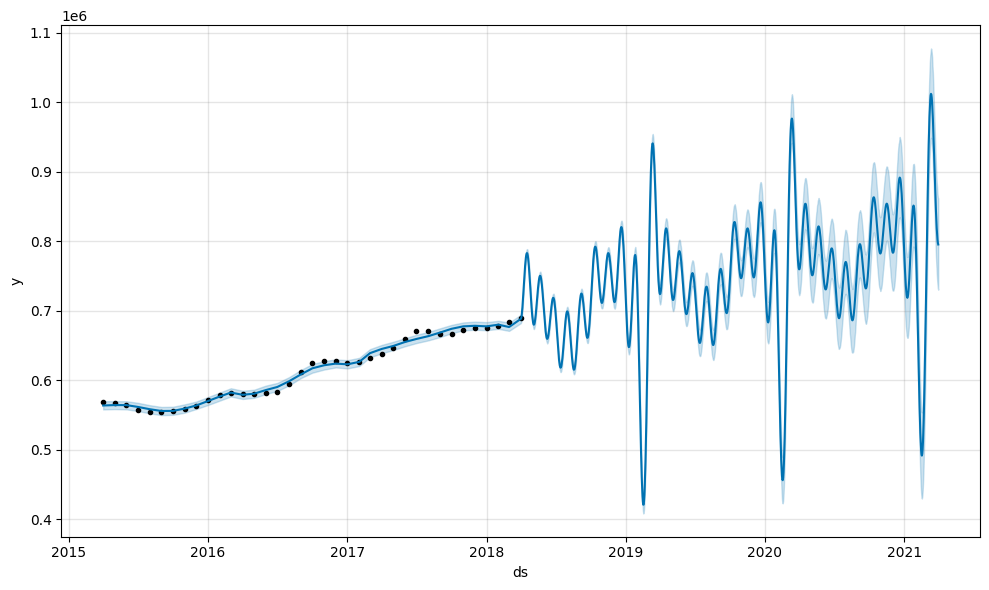

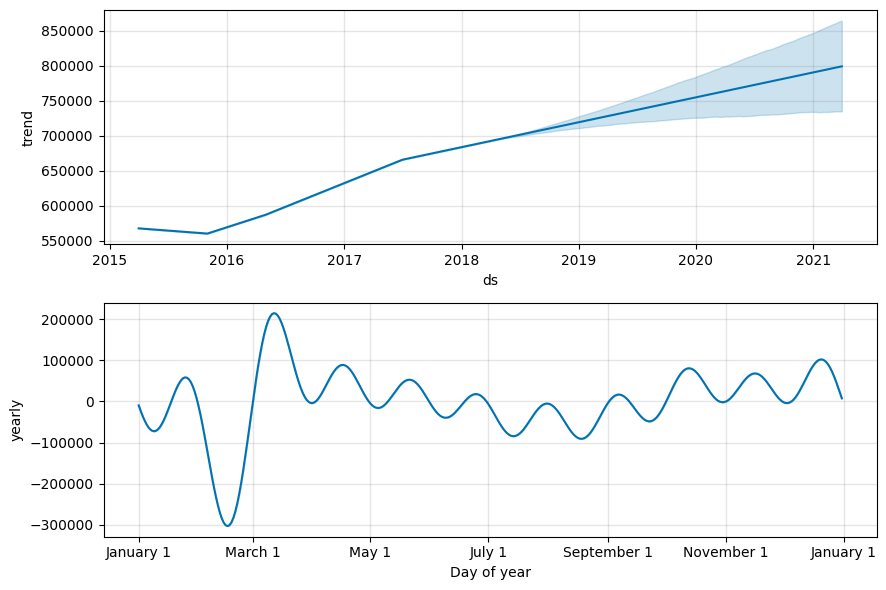

In [ ]:
from prophet import Prophet

for identifier, df in region_dataframes.items():
    # Reset index and rename columns
    df = df.reset_index()
    df = df.rename(columns={'time': 'ds', 'value': 'y'})

    # Create and fit the Prophet model
    model = Prophet()
    model.fit(df)

    # Make future predictions
    future_dates = model.make_future_dataframe(periods=1095)  # Example: forecasting for 1095 days
    forecast = model.predict(future_dates)

    # Visualize the results
    model.plot(forecast)
    model.plot_components(forecast)

    # You can also access the forecasted values and other information for each dataset
    # For example, forecast['yhat'] contains the predicted values

    # You can save the forecasted results or perform other operations specific to each dataset
    # For example, saving the forecast to a CSV file
    forecast.to_csv(f'forecast_{identifier}.csv')

From the above plots we can conclusively identify the top 5 best Zipcodes to invest in:


* 34102
* 81611
* 81615
* 89413
* 96141

Creating predictions for the different Region Names and storing in the all_predictions csv file

In [ ]:
import pandas as pd
from prophet import Prophet

# Assuming your data is stored in a dictionary called 'data_dict'
all_predictions = pd.DataFrame()

for identifier, df in region_dataframes.items():
    # Reset index and rename columns
    df = df.reset_index()
    df = df.rename(columns={'time': 'ds', 'value': 'y'})

    # Create and fit the Prophet model
    model = Prophet()
    model.fit(df)

    # Make future predictions
    future_dates = model.make_future_dataframe(periods=365 * 4)
    #Example forecasting for 4.5 years
    forecast = model.predict(future_dates)

    # Get the predicted values
    predictions = forecast[['ds', 'yhat']]
    predictions['identifier'] = identifier

        # Append predictions to the overall dataframe
    all_predictions = all_predictions.append(predictions)

# Save the predictions to a CSV file
all_predictions.to_csv('all_predictions.csv', index=False)



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5i53l19/byzii4_0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5i53l19/qzggtkzu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84258', 'data', 'file=/tmp/tmpq5i53l19/byzii4_0.json', 'init=/tmp/tmpq5i53l19/qzggtkzu.json', 'output', 'file=/tmp/tmpq5i53l19/prophet_modeldepnukwg/prophet_model-20230626092347.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:23:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:23:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonali

Creating a list ofthe different stored forecast data

In [ ]:
forecast10011 = pd.read_csv('/content/forecast_10011.csv')
forecast10014 = pd.read_csv('/content/forecast_10014.csv')
forecast10021 = pd.read_csv('/content/forecast_10021.csv')
forecast11975 = pd.read_csv('/content/forecast_11975.csv')
forecast31561 = pd.read_csv('/content/forecast_31561.csv')
forecast34102 = pd.read_csv('/content/forecast_34102.csv')
forecast81611 = pd.read_csv('/content/forecast_81611.csv')
forecast81615 = pd.read_csv('/content/forecast_81615.csv')
forecast89413 = pd.read_csv('/content/forecast_89413.csv')
forecast96141 = pd.read_csv('/content/forecast_96141.csv')

In [ ]:
forecast_list = [forecast10011, forecast10014, forecast10021, forecast11975, forecast31561,
                 forecast34102, forecast81611, forecast81615, forecast89413, forecast96141]


In [ ]:
df2 = pd.read_csv('all_predictions.csv')
df2.head()

ds          yhat  identifier
0  2015-04-01  1.060583e+07       10011
1  2015-05-01  1.060216e+07       10011
2  2015-06-01  1.067983e+07       10011
3  2015-07-01  1.083111e+07       10011
4  2015-08-01  1.108970e+07       10011

In [ ]:
#Using a for loop
for i in forecast_list:
  # Group the melted dataframe by 'RegionName' and calculate the mean value for the entire timeframe
  pred10011 = df2.groupby('ds')['yhat'].mean().reset_index()
  pred10011.columns = ['time', 'mean_value']

  # Calculate ROI by taking percent change of the mean 'value' column
  pred10011['ROI3'] = pred10011['mean_value'].pct_change(periods=1) * 100

  # Drop the first row since it will have NaN value for ROI
  pred10011 = pred10011.dropna()

  # Sort the DataFrame by ROI in descending order
  pred10011 = pred10011.sort_values('ROI3', ascending=False)

  # Print the resulting DataFrame with ROI value
  print(pred10011.head(10))

            time    mean_value      ROI3
1463  2022-02-26  5.309229e+06  1.272136
1464  2022-02-27  5.376659e+06  1.270065
1098  2021-02-26  5.391832e+06  1.258371
1099  2021-02-27  5.459233e+06  1.250050
1462  2022-02-25  5.242537e+06  1.247153
733   2020-02-27  5.474461e+06  1.243404
1465  2022-02-28  5.443462e+06  1.242455
1097  2021-02-25  5.324826e+06  1.240290
732   2020-02-26  5.407227e+06  1.231994
734   2020-02-28  5.541746e+06  1.229079
            time    mean_value      ROI3
1463  2022-02-26  5.309229e+06  1.272136
1464  2022-02-27  5.376659e+06  1.270065
1098  2021-02-26  5.391832e+06  1.258371
1099  2021-02-27  5.459233e+06  1.250050
1462  2022-02-25  5.242537e+06  1.247153
733   2020-02-27  5.474461e+06  1.243404
1465  2022-02-28  5.443462e+06  1.242455
1097  2021-02-25  5.324826e+06  1.240290
732   2020-02-26  5.407227e+06  1.231994
734   2020-02-28  5.541746e+06  1.229079
            time    mean_value      ROI3
1463  2022-02-26  5.309229e+06  1.272136
1464  2022-02-27

In [ ]:

# Create an empty DataFrame to store the results
results = pd.DataFrame()

# Loop through the forecast_list
for forecast_df in forecast_list:
    # Group the melted dataframe by 'ds' and calculate the mean value
    pred_df = forecast_df.groupby('ds')['yhat'].mean().reset_index()
    pred_df.columns = ['time', 'mean_value']

    # Calculate ROI by taking percent change of the mean 'value' column
    pred_df['ROI3'] = pred_df['mean_value'].pct_change(periods=10) * 100

    # Drop the first row since it will have NaN value for ROI
    pred_df = pred_df.dropna()

    # Sort the DataFrame by ROI in descending order
    pred_df = pred_df.sort_values('time', ascending=False)

    # Append the current DataFrame to the results DataFrame
    results = results.append(pred_df.head(10))

# Print the resulting DataFrame with ROI values for each forecast
print(results)

            time    mean_value       ROI3
1131  2021-03-31  9.345154e+06  16.862986
1130  2021-03-30  9.339129e+06  20.049006
1129  2021-03-29  9.298721e+06  22.830064
1128  2021-03-28  9.224348e+06  25.056006
1127  2021-03-27  9.117485e+06  26.576944
...          ...           ...        ...
1126  2021-03-26  8.303092e+05 -15.992751
1125  2021-03-25  8.435800e+05 -15.550069
1124  2021-03-24  8.584868e+05 -14.718938
1123  2021-03-23  8.747006e+05 -13.503028
1122  2021-03-22  8.918387e+05 -11.907956

[100 rows x 3 columns]


In [ ]:
# Group the melted dataframe by 'RegionName' and calculate the mean value for the entire timeframe
grouped_df1 = df2.groupby('identifier')['yhat'].mean().reset_index()
grouped_df1.columns = ['RegionName', 'mean_value']

# Calculate ROI by taking percent change of the mean 'value' column
grouped_df1['ROI3'] = grouped_df1['mean_value'].pct_change(periods=1) * 100

# Drop the first row since it will have NaN value for ROI
grouped_df1 = grouped_df1.dropna()

# Sort the DataFrame by ROI in descending order
grouped_df1 = grouped_df1.sort_values('ROI3', ascending=False)

# Print the resulting DataFrame with ROI value
print(grouped_df1.head(10))

   RegionName    mean_value        ROI3
6       81611  6.767917e+06  144.161070
2       10021  1.615624e+07  111.795571
5       34102  2.771907e+06    2.412698
1       10014  7.628225e+06  -24.954750
4       31561  2.706604e+06  -33.098007
8       89413  2.101986e+06  -41.289285
7       81615  3.580242e+06  -47.099795
9       96141  7.600187e+05  -63.842819
3       11975  4.045626e+06  -74.959365


# Findings
* We found out that the year 2007 ro around the year 2013, there was drop in sales value of the houses.
* From our analysis, we discovered that there was ageneral upward trend in the value od houses for sale. These were the top five regions with the highest ROI
1. 10021 : New York
2. 10011 : New York
3. 31561 : Sea Island
4. 10014 : New York
5. 81611 : Aspen


## 7). Recommendations

After performing time series analysis on the 10 zip codes and forecasting total returns for up to three years, we reccomend the company to invest in the following 3 zipcodes:

* 81611 - Location: Aspen, CO             (R.O.I - 132.378817%)

* 10021 - Location: New York, NY          (R.O.I - 111.795552%)

* 34102 - Location: Naples, FL            (R.O.I - 7.605307%)


As for the other 6 zip codes, they are not fit for investement given the negative returns.